<p align="center">
  <img src="https://raw.githubusercontent.com/shkyler/gmit-mls-project/master/img/GMITLOGO.jpg" width="750"/></p>

# GMIT, H.Dip in Data Analytics, Machine Learning and Statistics Project 2019

## 1. Introduction

This repository contains all of the files pertaining to my 2019 project submission for the Machine Learning and Statistics module of the GMIT H.Dip program in Data Analytics. All of the work contained within this repository was carried out over the course of an 8 week period in October and November 2019. This Jupyter notebook [1] contains the complete documentation for the project.

### 1.1 Project Objective 

The objective of the project concerns the well known *Boston House Prices Dataset*. This is a dataset that contains data that was collected by the U.S. census service in the 1970s[2]. The goal of this project is to analyse this dataset in order to demonstrate proficiency and understanding of many statistical and machine learning concepts. The aim is to use some Python[3] packages such as scipy[4], Jupyter, and keras[5] to gain some insight from the data. For the purpose of assessment the project is broken down into 3 sections as follows:

* **Describe:** In this part of the project, the dataset will be imported into this Jupyter notebook and analysed using descriptive statistics and plots.  
* **Infer:** In this part inferential statistics will be used to investigate the effect that proximity to the Charles river has on median house prices.  
* **Predict:** In this part of the project the dataset will be used to train a neural network that can be used for predicting house prices based on the other data in the dataset.   

<p align="center">
  <img src="img/boston-houses.png" width="750"/>
<div align='center' style='font-size:12px'> <b><i>Boston Houses</i></b></div>  
</p>
  

### 1.2 Project Plan

The plan for this project is as follows:

* In Section 2 the dataset will be loaded and analysed using descriptive statistics. The plan will be to look at the relationships between the different data features rather than each data feature on its own. Where there is a strong relationship between features this will be discussed and analysed further.
* In Section 3 the dataset is to be analysed again to see is there is a statistically significant difference between the median house price in areas along the Charles river, versus those which are not. The focus here will be on selecting an appropriate test for significance. 
* In Section 4 a neural network will be trained using the data in the dataset to try and predict a house price based on other inputs. The neural network will then be evaluated for accuracy and then refined to try and improve it. 
* In the Section 5 the project will be concluded and the relative success of the project will be discussed.

## 2. Describe the Boston Housing Dataset

### 2.1 Introduction to the Boston Housing Price Dataset

The Boston Housing dataset was collected by the US census service in the 1970s. It was first published in 1978 by David Harrison and Daniel Rubinfield in their paper *Hedonic Housing Prices and Demand for Clean Air*[6]. In their study they investigated the possibility of using housing data to see if there was a market demand to pay for clean air. By analysing data about the desirability of individual suburbs in the Boston area, they estimated how willing people were to pay for air quality improvements. They found that minor air pollution damages were found to increase with the level of air pollution and levels of household income.

Since its initial publication it has become a useful dataset in the teaching of statistical modeling and machine learning. There are many reasons for this including:
* It is a a manageable size - there are 506 data points in it - each with 14 features (columns of data measurements).
* There are some interesting relationships between the different features which are worthy of analysis and discussion
* It is a good dataset for demonstrating regression and multivariate statistics.
* It is a real dataset representing a real phenomenon and therefore it is quite interesting fro students to analyse.

### 2.2 Loading the Dataset

In this section, the required Python libraries for the project will be imported. These include:
* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`
* `scipy`
* `math`
* `sklearn`
* `tensorflow`
* `keras`

Once the libraries are imported, we will the load the dataset using the `sklearn` package. 

#### 2.2.1 Importing the libraries

In [14]:
# import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
# For whitening.
import sklearn.decomposition as dec

# keras and tensorflow for machine learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

%matplotlib inline

#### 2.2.2 Loading the dataset from sklearn

In the next block of code we will load the dataset. Note that `sklearn`[7] is a machine learning package for Python. 
In supervised machine learning it is common to divide the data set into model inputs (data) and model outputs (targets)[8]. As the Boston housing dataset is commonly used for regression problems required to predict housing prices, `sklearn` predefines the house prices feature as a target. We have to add this back into data set.

In [15]:
# load the dataset using the sklearn package - https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
boston_house_prices = load_boston()

# create a dataframe with the data from the dataset
df = pd.DataFrame(boston_house_prices.data, columns=boston_house_prices.feature_names)

# add the median value to the dataframe
df["MEDV"] = boston_house_prices.target

# show the head of the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset has 14 different columns of data as can be seen above. We can determine the number of rows using the `shape` function

In [16]:
# check the shape of the dataset
df.shape

(506, 14)

This confirms that the dataset has 506 different data points each with 14 columns of data points. The next step is to try and understand what the different columns such as **CRIM**, **ZN**, **INDUS** etc. mean. Luckily there is a handy function in sklearn for this (DESCR). The output of this function contains much detail on the dataset including the following information on the columns names:

* __CRIM__     per capita crime rate by town
* __ZN__       proportion of residential land zoned for lots over 25,000 sq.ft.
* __INDUS__    proportion of non-retail business acres per town
* __CHAS__     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* __NOX__      nitric oxides concentration (parts per 10 million)
* __RM__       average number of rooms per dwelling
* __AGE__      proportion of owner-occupied units built prior to 1940
* __DIS__      weighted distances to five Boston employment centres
* __RAD__      index of accessibility to radial highways
* __TAX__      full-value property-tax rate per \$10,000
* __PTRATIO__  pupil-teacher ratio by town
* __B__        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* __LSTAT__    % lower status of the population
* __MEDV__     Median value of owner-occupied homes in $1000's

So, it can be seen that the dataset contains a good mix of variables covering socioeconomic factors (such as house prices, property tax rates, pupil teacher ratio in the schools, crime rates) as well as locational factors (such as proximity to Charles river, accessibility to highways) ans environmental factors (such as NOX levels). In the next section we will begin to anaylse the data to see what it tells us.

### 2.3 Analysis of the Dataset 

A good place to start when carrying out exploratory data analysis is to use the pandas `describe()` function to get a feel for the columns in the data set.

In [17]:
# describe the dataset
df.describe(include='all').round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


The output of this is a grid of data summarising the data and it will be useful to refer back to later. There are many options available to us when it comes to analysing this data - we could plot histograms of every column in the set and discuss each feature in turn, but a much more interesting approach is for us to explore the relationships between the features in the dataset to determine if there is any correlation between them.  

One way looking at the relationships between the data would be to plot scatterplots of some of the features against each other to see if there is any obvious relationship between them. The methodology works like this:
* Choose 2 features that you believe to be related
* Plot them against each other using a scatterplot
* Draw the best fit line
* Calculate the correlation co-efficient to determine how well the best-fit line fits the data
an example of this is shown below:

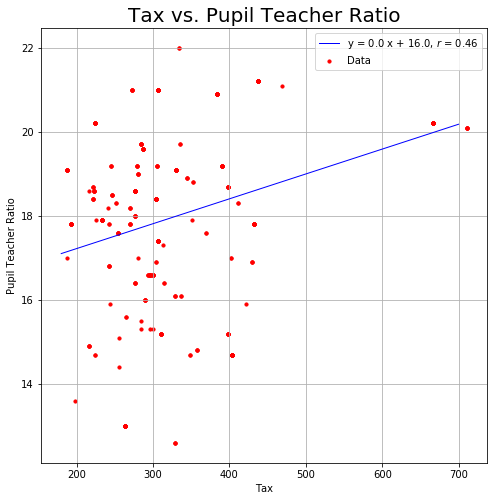

In [18]:
# Resize the plots
plt.rcParams['figure.figsize'] = [8, 8]
# Plot Crime Rate vs. Pupil Teacher Ratio
plt.scatter(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'],c='red', label='Data', s=10)

# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(df.loc[:, 'TAX'], df.loc[:, 'PTRATIO'])
line_x = np.arange(180, 700, 0.1)
line_y = slope*line_x + intercept

# Plot the best fit line
plt.plot(line_x, line_y, 'b-',linewidth=1, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
plt.title("Tax vs. Pupil Teacher Ratio", size="20")
plt.xlabel("Tax")
plt.ylabel("Pupil Teacher Ratio")
plt.legend()
plt.grid(True)
plt.show()

r (the correlation co-efficient or Pearson's co-efficient) can have a value of between -1 an 1, where values close to 0 indicate a poor fit, values close to 1 indicate a good fit and a positive correlation and values close to -1 indicate a good fit and a negative correlation. The correlation co-efficient (r) that we have calculated above is 0.46. This indicates a poor correlation (this can also be seen by the wide scatter of the data points).

The approach of selecting features and plotting them against one another can work in a situation where are a few features in a set, or when the analyst has a good idea in advance of what variables might be influencing each other. 

For a dataset like the Boston housing set, where there are 14 different features, ans the analyst (me!) is not sure of the relationships - we can use a pandas function to create a correlation matrix. This will give us all of the r values for each pair of data points so we can determine which ones merit further analysis.

#### 2.3.1 Creating the Correlation Matrix and Plotting a Heatmap

In this section we will use python to calculate the correlation matrix and visulaise it with a heatmap using the seaborn library. We will then analyse this heatmap to see if it throws up anything interesting.

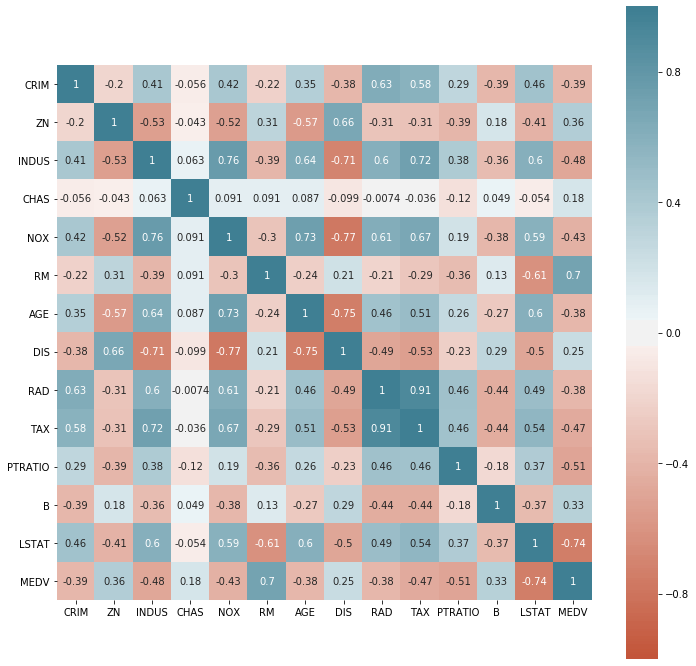

In [19]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [12, 12]

# define the correlation matrix between the data columns in the set
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
corr = df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

#### 2.3.2 Anaylsing the Heat Map

In order to analyse the heat map, we must first determine what a suitable minimum value for r determines a relatively good correlation between a pair of data features. According to the Wikipedia entry for <a href="https://en.wikipedia.org/wiki/Pearson_correlation_coefficient">Pearson correlation co-efficient</a>[9], several authors have criteria for interpreting this statistic, however most of them are in may ways arbitrary. For example, if somebody was trying to verify <a href="https://en.wikipedia.org/wiki/Ohm%27s_law">Ohm's Law</a>[10] by increasing the voltage in an electrical circuit and measuring the corresponding current. If a scatter plot of this was completed and the correspond r-value calculated, it would be expected (if the electrical components and meters used in the experiment were of high quality) that this r-value would be very close to 1. However, in other field such as social sciences whether is much more noise, and the data generally only give a probability that a relationship between variables is likely, lower values of r are accepted as proof of a good correlation. 

The Boston Housing dataset is very much one from the social sciences. Any relationships between variables are likely to give an impression of the overall trend without being completely precise. For this reason I have chosen to analyse deeper any relationships that have correlation co-efficient of 0.65 or higher (-0.65 or lower for negative correlation!).

A summary of these relationships is listed below:

* The  proportion of residential land zoned for lots over 25,000 sq.ft. is positively correlated with the weighted distances to five Boston employment centres, in other words areas which have larger residential properties are further from the places where most of the jobs are.
* The proportion of non-retail business acres per town is positively correlated to  nitric oxides concentration in the air. This is what would be expected - areas with more industry are likely to burn more fossil fuels.
* The proportion of non-retail business acres per town is also positively correlated to full-value property-tax rate per \$10,000. In other words, areas with more industry tend to have higher property tax returns. Again, this is to be expected.
* The nitric oxide levels are are:
    * Positively correlated to proportion of owner-occupied units built prior to 1940 and full-value property-tax rate per \$10,000
    * Negatively correlated to weighted distances to five Boston employment centers  
    
    This seems to indicate that NOX levels are higher in older areas of the town, where property tax rates are higher
    (more industrial areas), that are shorter distances to the major employment ares. Again this is very much in line
    with what would be expected.
* The average number of rooms per dwelling is positively correlated with the median value of properties in an area. This would be expected - larger properties would be expected to be more expensive.
* The proportion of owner-occupied units built prior to 1940 is negatively correlated to the weighted distances to five Boston employment centers. This means that the older houses are nearer the employment centers (which are the areas with the nigher NOX levels and higher non-retail industry)
* The index of accessibility to radial highways is positively correlated to the property tax rate. In other words, areas with better transport links (especially for using a private automobile) have higher property tax rates.
* Finally, the % lower status of the population is negatively correlated to the median property value in an area. This seems logical, a higher percentage of poorer people will be able to afford to buy property in areas where the property prices are lower


The initial analysis has given us some ideas to think about. The 2 main areas worthy of deeper analysis are as follows:
* Looking at how the average number of rooms per dwelling and percentage of lower status population are related to the median value of owner-occupied dwellings
* Considering the range of factors that seem to have an impact on NOX levels in the air such as property age, percentage of non-retail industry, distance to employment centers and percentage property tax.

The next analysis will be as follows:
* Create two new pandas dataframes one looking at each relationship
* Plot two new heat maps based on these new data frames
* Create two pair plots using the `seaborn` package to visualise these correlations

We will consider each point in turn

#### 2.3.3 Analysis of the median property value

The first step is to create a new dataframe with just the MEDV, RM and LSTAT columns in it.

In [20]:
# Create a new dataframe
medv_df = df[["MEDV", "RM", "LSTAT"]]
# Check the dataframe to ensure it looks right
medv_df.head()

,MEDV,RM,LSTAT
0,24.0,6.575,4.98
1,21.6,6.421,9.14
2,34.7,7.185,4.03
3,33.4,6.998,2.94
4,36.2,7.147,5.33


Next we will re create the heat map with for `med_df`:

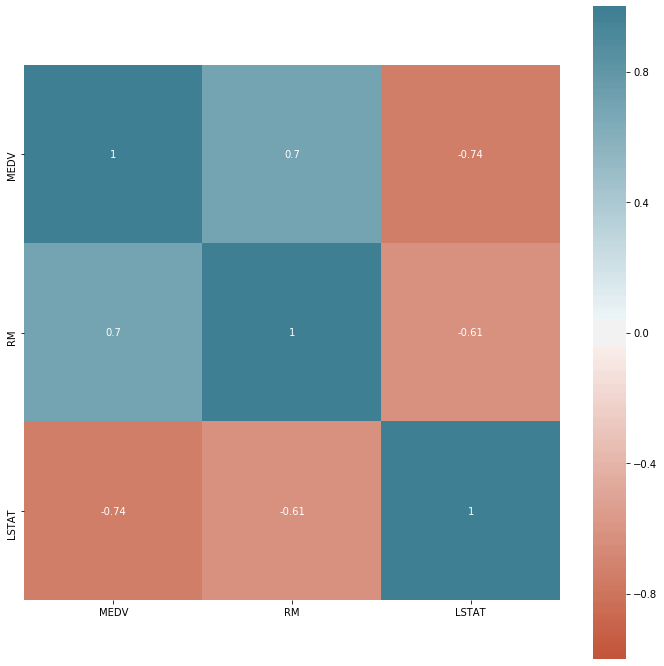

In [21]:
# define the correlation matrix between the data columns in the set
medv_corr = medv_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(medv_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

The next step is produce the pair plot to determine the overall shape of these relationships - i.e. are the relationships linear or perhaps a higher order polynomial might be more appropriate to describe the correlation.

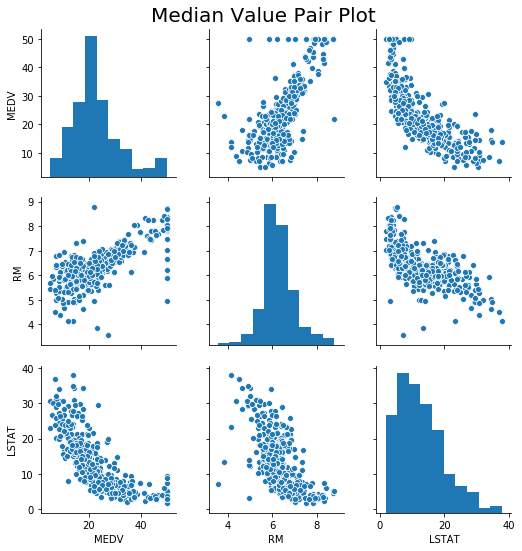

In [22]:
# pair plot to visualise the correlations
medv_pair_plt = sns.pairplot(medv_df)
medv_pair_plt.fig.suptitle("Median Value Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
When analysing a pair plot, I like to start on the diagonal, looking at the distribution of each feature:
* Median values are generally normally distributed - with some outliers for the higher values. The mean is about \$22k and there is a good spread
* Average no of rooms per dwelling is normally distributed with a mean of about 6 (6.28 from section 2.3 above) and not a very big spread (standard deviation is approx 0.7)
* % Lower status population is skewed left, with 10-15% being the most frequent (30-40 areas have 10-15% lower status population). There are some areas that have as many as 35% lower status population - though not many, 1 or 2 maximum.

Looking at the relationships between the data:
* Median value seems to be linearly related to the average number of rooms in the dwelling - we can use the `stats.linregress` function to determine the best fit line for this.
* The relationship between median value and \%lower status population is not linear - it is curved. We can use the `numpy.polyfit` function to analyse a quadratic function to see how it fits. 

The next step is to plot these relationships and calculate the best fit lines/curves.

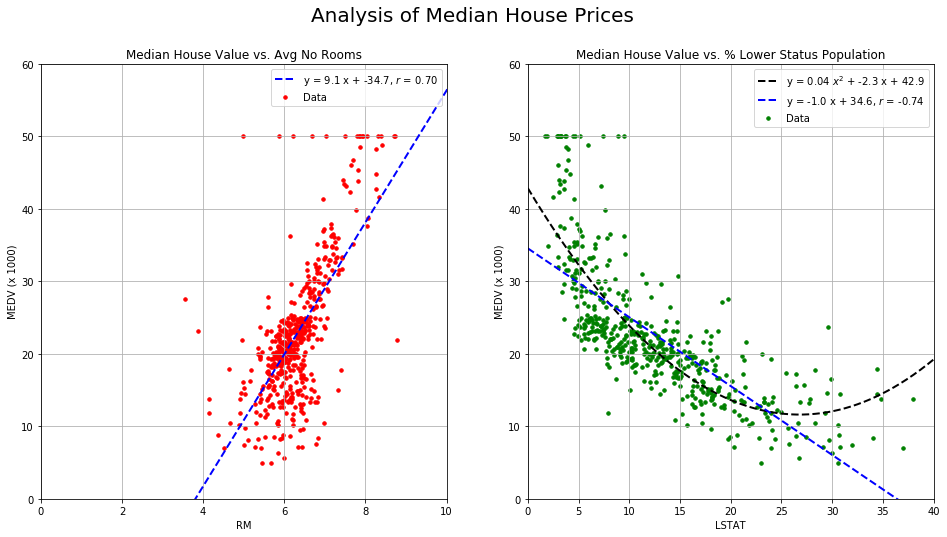

In [23]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [16, 8]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2) = plt.subplots(1,2)

# Plot the Median Value against the Average no. of Rooms
ax1.scatter(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'RM'], medv_df.loc[:, 'MEDV'])
# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_rm = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_rm = slope * x_rm + intercept
ax1.plot(x_rm, y_rm, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax1.set_xlim([0, 10])
ax1.set_ylim([0, 60])
ax1.set_xlabel("RM")
ax1.set_ylabel("MEDV (x 1000)")
ax1.set_title('Median House Value vs. Avg No Rooms')
ax1.legend(loc="upper right")

# Plot the Median Value against the % Lower Status Population
ax2.scatter(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
slope, intercept, r_value, p_value, std_err = stats.linregress(medv_df.loc[:, 'LSTAT'], medv_df.loc[:, 'MEDV'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly = np.polyfit(medv_df.loc[:,'LSTAT'], medv_df.loc[:,'MEDV'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_lstat = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_lstat = slope * x_lstat + intercept
# Calculate y-values for the quadratic curve
y_poly = poly[0]*(x_lstat**2) + poly[1]*(x_lstat) + poly[2]
plt.plot(x_lstat, y_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly[0], poly[1], poly[2])) 

ax2.plot(x_lstat, y_lstat, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(slope, intercept, r_value))
# format the plot
ax2.set_xlabel("LSTAT")
ax2.set_ylabel("MEDV (x 1000)")
ax2.set_xlim([0, 40])
ax2.set_ylim([0, 60])
ax2.set_title('Median House Value vs. % Lower Status Population')
ax2.legend(loc="upper right")

plt.suptitle("Analysis of Median House Prices", size=20)
plt.show()

#### Median House Price Discussion

Even though this dataset was collected in the 1970's with a view to determining whether or not the general population of the Boston area is willing to pay for clean air [6], the dataset is commonly used by data analysts, statisticians and machine learning academics as a means of explaining some of the concepts involved in data analytics. In fact there are myriad blog posts online which use this dataset to illustrate a point - often using it as a way to demonstrate how to determine which relationships are important when training a machine learning algorithm [11], [12], [13], [14].

During the course of analysing the dataset we had determined that the there seemed to be a good linear correlation between house prices and number of rooms - this is intuitive as houses with more rooms are likely to be bigger and hence worth more money. We have plotted the best fit line with the data, and this shows that there is a fairly linear relationship between the features as there is an equal spread of data points either side of the line and this condition holds true the entire length of the line. We have also determined the equation of the best fit line as $$ MEDV = 9.1*RM -34.7 $$, and this could be used to help determine the likely price of a house based on the numbers of rooms in it.

We have also considered the relationship between the % lower status population and median house price. The initial analysis hinted at a strong correlation but when it was plotted in the pair plot - it was obvious that the relationship was not linear. This was confirmed when this was plotted with the best fit line. It can be seen that all of the points that are below the line are clustered in the same region between x=5 and x=30. It is clear that a curve might make a better fit and the quadratic relationship between the variables was calculated and plotted. This can be seen to be a much better fit. Again the relationship can be modeled as $$MEDV = 0.04*LSTAT^2 -2.3*LSTAT + 42.9 $$. In the next section features which impact NOX levels will be analaysed.

#### 2.3.4 Analysis of NOX Levels

The first step is to create a new dataframe with the ZN, DIS, INDUS, NOX, TAX, AGE and RAD columns in it.

In [24]:
# Create a new dataframe
nox_df = df[["NOX", "DIS", "INDUS", "TAX", "AGE"]]
# Check the dataframe to ensure it looks right
nox_df.head()

,NOX,DIS,INDUS,TAX,AGE
0,0.538,4.0900,2.31,296.0,65.2
1,0.469,4.9671,7.07,242.0,78.9
2,0.469,4.9671,7.07,242.0,61.1
3,0.458,6.0622,2.18,222.0,45.8
4,0.458,6.0622,2.18,222.0,54.2


Next, we will create a heatmap of `nox_df`:

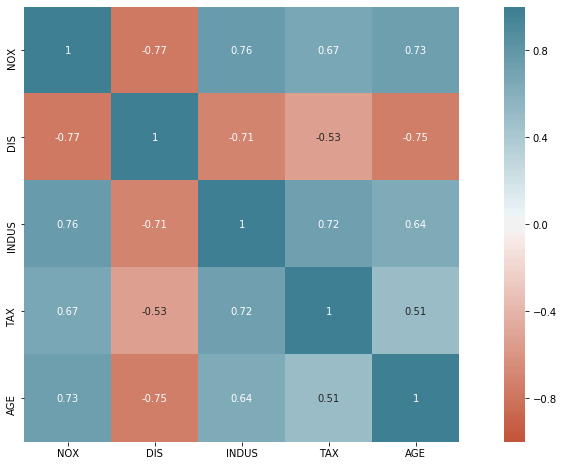

In [25]:
# define the correlation matrix between the data columns in the set
nox_corr = nox_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(nox_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Finally, we create a pair plot to visualise the relationships.

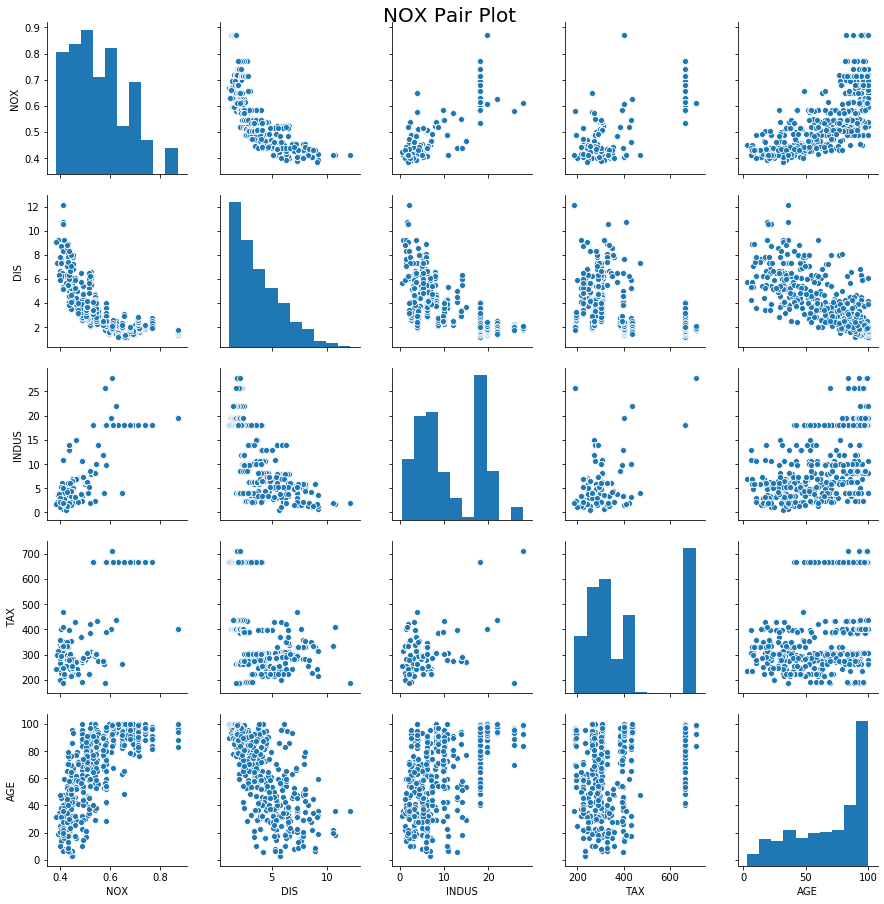

In [26]:
# pair plot to visualise the correlations
nox_pair_plt = sns.pairplot(nox_df)
nox_pair_plt.fig.suptitle("NOX Pair Plot", size="20", va="bottom")
plt.show()

Analysis of the pair plot:
Again starting on the diagonal, looking at the distribution of each feature:
* NOX levels are skewed left - this means that most ares have lower levels of NOX in the air. As we consider higher NOX levels, there are fewer and fewer areas affected.
* The distance the the five employment centers is skewed left - residential properties tend to be near where the jobs are, as you move further away there are less housing areas.
* The distribution of non retail industries is bi-modal with a peak at about 7% and another at about 20%
* The percentage property tax seems to be somewhat normally distributed with some outliers at around 700.
* The proportion of properties built before 1940 of the properties is right skewed - there are more older houses than newer ones. It can be seen that there are a large number of areas that were built entirely before 1940.

Looking at the relationships between the data:
* The first thing to note is that even though some of these pairs of data features have reasonably high r-values - there does not seem to be a good relationship between them. We will only consider the strongly related pairs of data features for further analysis.
* NOX is strongly related to the distance to the five employment centers - the relationship is not linear so we can ue the `numpy.polyfit` function to determine a good model for it.
* The relationship between the NOX levels and the percentage of non retail industry is resonably linear - we can use `stats.liregress` to explore further.
* The relationship between NOX levels and proportion of properties built before 1940 is resonably goods but non-linear. We can explore with `numpy.polyfit`

In the next part here I need to plot these 3 functions and determine the best line/curve.

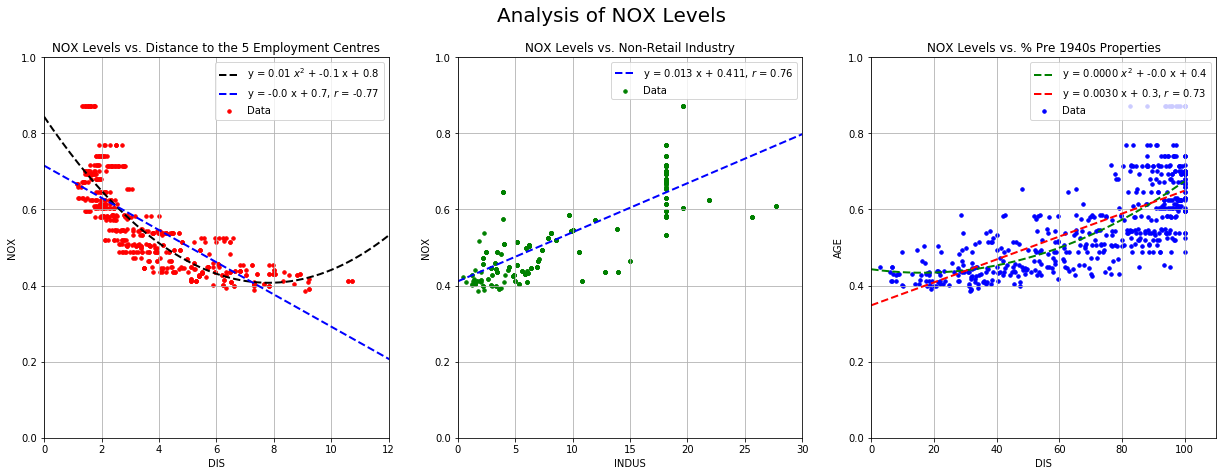

In [27]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

# define the axis for the sub plots (required to put legends on each plot) - https://stackoverflow.com/questions/27016904/matplotlib-legends-in-subplot 
f, (ax1, ax2, ax3) = plt.subplots(1,3)

# Plot NOX against DIS
ax1.scatter(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'],c='red', label='Data', s=12)
ax1.grid(True)
# Calculate the linear statistics using stats.linregress()
dis_slope, dis_intercept, dis_r_value, dis_p_value, dis_std_err = stats.linregress(nox_df.loc[:, 'DIS'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_dis = np.polyfit(nox_df.loc[:,'DIS'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_dis = np.arange(0,15.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_dis = dis_slope * x_dis + dis_intercept
# Calculate y-values for the quadratic curve
y_dis_poly = poly_dis[0]*(x_dis**2) + poly_dis[1]*(x_dis) + poly_dis[2]

# plot the best fit line and 2nd order polynomial
ax1.plot(x_dis, y_dis_poly, 'k', linestyle='dashed',linewidth=2, label=r'y = %.2f $x^2$ + %.1f x + %.1f'%(poly_dis[0], poly_dis[1], poly_dis[2])) 
ax1.plot(x_dis, y_dis, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.1f x + %.1f, $r$ = %.2f'%(dis_slope, dis_intercept, dis_r_value))
# format the ax1 plot
ax1.set_xlim([0, 12])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel("DIS")
ax1.set_ylabel("NOX")
ax1.set_title('NOX Levels vs. Distance to the 5 Employment Centres')
ax1.legend(loc="upper right")

# Plot the NOX against INDUS
ax2.scatter(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'],c='green', label='Data', s=12)
ax2.grid(True)
# Calculate the linear statistics using stats.linregress()
indus_slope, indus_intercept, indus_r_value, indus_p_value, indus_std_err = stats.linregress(nox_df.loc[:, 'INDUS'], nox_df.loc[:, 'NOX'])

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_indus = np.arange(0,60.1,0.1)
# Calculate the y values using the slope and intercept calculted
y_indus = indus_slope * x_indus + indus_intercept

# plot the best fit line
ax2.plot(x_indus, y_indus, 'b-', linestyle='dashed',linewidth=2, label=r'y = %.3f x + %.3f, $r$ = %.2f'%(indus_slope, indus_intercept, indus_r_value))

# format the plot
ax2.set_xlabel("INDUS")
ax2.set_ylabel("NOX")
ax2.set_xlim([0, 30])
ax2.set_ylim([0, 1.0])
ax2.set_title('NOX Levels vs. Non-Retail Industry')
ax2.legend(loc="upper right")

# Plot NOX against AGE
ax3.scatter(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'],c='blue', label='Data', s=12)
ax3.grid(True)
# Calculate the linear statistics using stats.linregress()
age_slope, age_intercept, age_r_value, age_p_value, age_std_err = stats.linregress(nox_df.loc[:, 'AGE'], nox_df.loc[:, 'NOX'])
# Use the polyfit function on the data, with the degree set to 2 (i.e. x squared)
poly_age = np.polyfit(nox_df.loc[:,'AGE'], nox_df.loc[:,'NOX'], 2)

# Create a range of x values from 0 to 60 for the line (the size of the plot)
x_age = np.arange(0,100,0.1)
# Calculate the y values using the slope and intercept calculted
y_age = age_slope * x_age + age_intercept
# Calculate y-values for the quadratic curve
y_age_poly = poly_age[0]*(x_age**2) + poly_age[1]*(x_age) + poly_age[2]

# plot the best fit line and 2nd order polynomial
ax3.plot(x_age, y_age_poly, 'g', linestyle='dashed',linewidth=2, label=r'y = %.4f $x^2$ + %.1f x + %.1f'%(poly_age[0], poly_age[1], poly_age[2])) 
ax3.plot(x_age, y_age, 'r-', linestyle='dashed',linewidth=2, label=r'y = %.4f x + %.1f, $r$ = %.2f'%(age_slope, age_intercept, age_r_value))
# format the ax1 plot
ax3.set_xlim([0, 110])
ax3.set_ylim([0, 1.0])
ax3.set_xlabel("DIS")
ax3.set_ylabel("AGE")
ax3.set_title('NOX Levels vs. % Pre 1940s Properties')
ax3.legend(loc="upper right")

plt.suptitle("Analysis of NOX Levels", size=20)
plt.show()

#### NOX Levels Discussion

The original intent of the surveyors who collected this data was to determine the economic benefits of having clean air [6]. So it is important to consider what kinds of things drive pollution when analysing this data.

Initial analysis of the data set showed us that there seems to be a good, but non-linear negative correlation between NOX levels and the distance to the 5 main employment centres. This would be expected - areas where people are employed are likely to have more industry in them and therefore there is likely to be more air pollution generated as part of this industrial activity. During this analysis we fitted a 2nd order polynomial to try to represent this relationship: $$NOX = 0.01 * DIS^2 -0.1 * DIS + 0.8 $$

This evidence is corroborated by the fact the there is a positive correlation between the amount of non retail industry in a town and the levels of NOX in the ambient air. This relationship seems fairly linear and is approximated as: $$NOX = 0.013 * INDUS + 0.411 $$

The last point to make on this to consider the relationship between NOX levels and the percentage of properties built before which is a positive correlation. I have fitted both a linear and polynomial model to this relationship and it looks to be that there is not mush difference between them over the range of our dataset, this means that the linear model will be sufficient: $$NOX = 0.003 * AGE + 0.3 $$

This would seem to indicate that there are worse NOX levels in areas that have a higher proportion of older houses. So, considering the original purpose of this data and analysing what the economic implication of air pollution and whether or not people would be prepared to pat for clean air - we will consider one more set of relationships. In the original heatmap in section 2.3.1 is can be seen that there is a positive correlation of 0.6 between AGE and LSTAT. This means that areas with older houses in them tend to have higher proportions of poorer people in them.

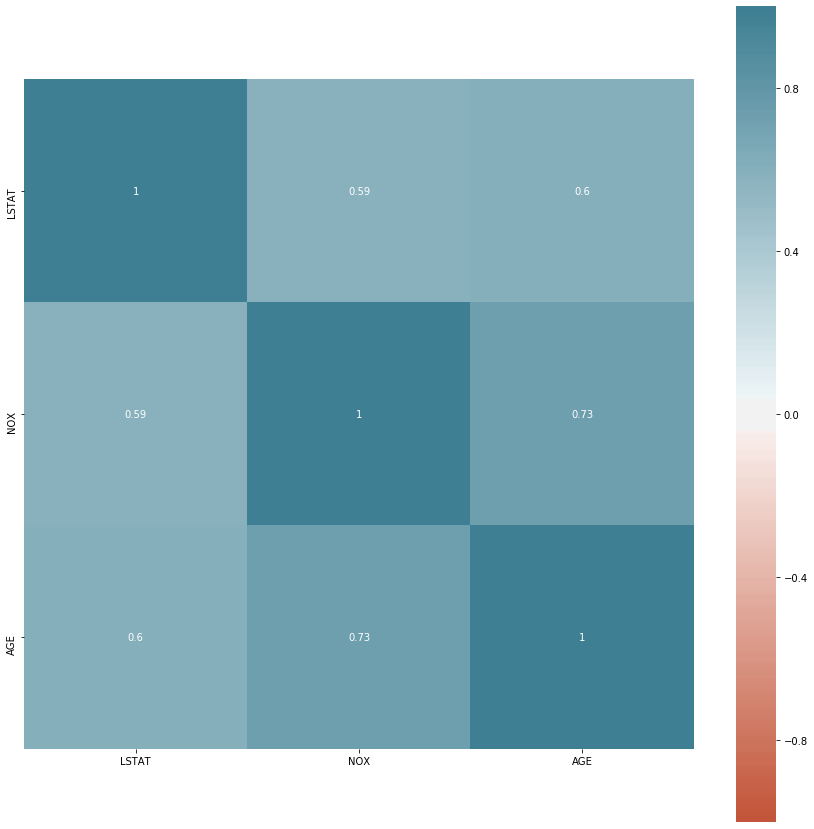

In [28]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# Create a new dataframe
lstat_df = df[["LSTAT", "NOX", "AGE"]]

# define the correlation matrix between the data columns in the set
lstat_corr = lstat_df.corr()

# heatmap - https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(lstat_corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)
plt.show()

Next lets consider the pair plot for this relationship:

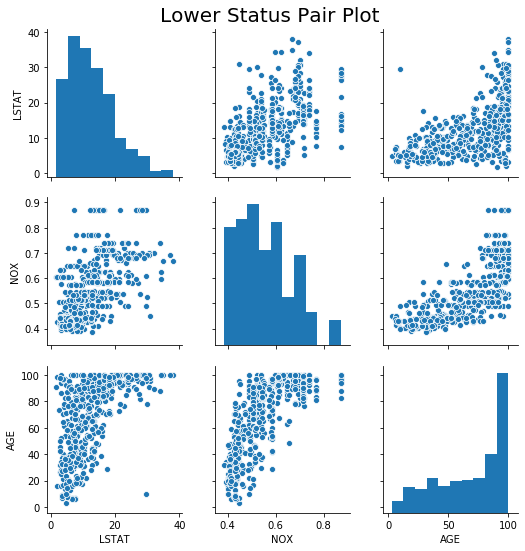

In [29]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# pair plot to visualise the correlations
lstat_pair_plt = sns.pairplot(lstat_df)
lstat_pair_plt.fig.suptitle("Lower Status Pair Plot", size="20", va="bottom")
plt.show()

These plots do show that NOX levels tend to be higher in areas with a higher proportion of lower status people. Therefore there may not be huge willingness for people to pay for air quality improvements - as better off people are more likely to live in areas with cleaner air, and the poorer people who are more likely to live in areas with lower quality air are unlikely to be able to pay for these improvements

## 3. Comparing House Prices with Inferential Statistics

In section 2 we used descriptive statistics to describe the relationships between the various features of the Boston housing data set. In this section we are going to use *inferential statistics* to investigate the relationship between the proximity of a house to the Charles river and median value of houses in that area. The plan for this section is as follows:

* Introduce inferential statistics
* Consider the *t-test* with respect to the dataset 
* Select an appropriate *t-test* and carry it out on the data
* Present the results and discuss the findings

#### 3.1 Introduction to Inferential Statistics

Inferential statistics allow us to make prediction or inferences from a set of sample data [15]. When using inferential statistics, an analyst will take samples of data and analyse these in order to make generalisations about the entire population. This is often done because it is infeasible, impractical or impossible to analyse the entire population. One case where inferential statistics are used heavily is in political opinion polls. When carrying these polls it is not possible to ask everybody in the entire country their opinion on a particular matter, instead the researchers will choose a representative sample of the population and survey that. They will then analyse the results of from this surveyed sample and make inferences about the entire population from this. There are two main areas of inferential statistics, these are:

1. Estimation (of a population statistic based on a sample statistic)
1. Hypothesis Testing (comparing the means of two related groups of data)

#### 3.1.1 Estimation [16]

Take the case where a researcher wants to determine what proportion of children aged 8 to 10 like football. What they could do is design a survey where they take a sample of 1000 children and survey them. A properly designed survey will ensure that the sample includes a proportional amount of children based on gender, whether they are urban or rural, economic background etc. However, no matter how well the sample is chosen the researcher must remember that it is still just a sample of the population - and that these samples can vary. I other words if the survey was repeated using the same proportions of boys/girls, urban/rural but using different children he results are likely to vary from survey to survey. In order to build confidence in the research, a *margin of error (MOE)* should be included with all inferential estimation statistics. The MOE measures how close the sample statistic is likely to be to the population parameter that is being studied. The MOE is calculated to a confidence interval decided by the researcher. If the survey in question was to be carried out a large number of times, most times the sample mean will be close to the population mean, but these survey means will be distributed and there is always a small chance that some surveys will show very high proportions of children age 8 to 10 that like football, (or very low proportions). 

The process the researcher will follow is this:

* Calculate the sample mean (say 60%) - this says 60% of children aged 8 to 10 like football
* Decide on a confidence interval for the margin of error (i.e. what percentage of samples are likely to fall within the margin or error - say 95%)
* Use a Standard Normal Distribution (Normal Distribution with mean = 0 and standard deviation = 1), to determine a z value at 95% (this is 1.96)
* Calculate the margin of error as follows:
$$ MOE = z * \sqrt{\dfrac{p(1-p)}{n}}$$

Where:
* z is determined from the table
* n is the sample size
* p is the sample proportion (60% in the example above)

We can calculate the MOE using python.

In [30]:
# define the variables
n = 1000
p = 0.60
z = 1.96
# calculate the MOE
MOE = (z * (p*(1-p)/n)**0.5)

print("The % margin of error for this study is:", round(MOE*100,2), "%")

The % margin of error for this study is: 3.04 %


So the researcher could conclude that the percentage of all children aged 8 to 10 that like football is 60% with a margin of error of 3% at a 95% confidence interval. What this means is that if 1000 children aged 8 to 10 were polled as to whether or not they like football, the result would lie between 57% and 63% 95% of the time.

#### 3.1.2 Hypothesis Testing

When carrying out a comparison study is not possible, or feasible to compare every subject that is to be studied. Instead we must collect a sample dataset and analyse that. From this we can make inferences about the population. An everyday application of this is in clinical trials for new medicines. If a pharmaceutical company wants to compare the performance of a new blood pressure medication to see if it provides better outcomes for patients than the current medication available it might carry out a trial as follows:
1. Select a 2000 people with high blood pressure
1. Measure their blood pressure before the trial
1. Give 1000 the current medication for 6 months
1. Give 1000 the new medication for 6 months
1. Measure their blood pressure again after 6 months and calculate the delta (difference between start and end blood pressure)
1. Calculate the average delta for the group on the old medication
1. Calculate the mean delta for the group on the new medication
1. Compare them to see if the the new medication has a higher delta than the old one (and hence is it more effective)

An issue with this method is that we have only considered a sample of the entire population. It is possible that if we repeated the test numerous times with different test subjects we would get many different outcomes and the actual mean deltas in blood pressure would be distributed. In order to determine the statistical significance of the findings of the study a *t-test* is carried out.

The steps for carrying out a t-test are as follows [17]:

1. State the hypothesis
1. Formulate an analysis plan
1. Analyse sample data
1. Interpret the results

**State the Hypothesis**

Every t-test requires the analyst to state the *null hypothesis* and the *alternative hypothesis* prior to carrying out the analysis. These are stated in such a way as that only one of them can the true and the other must be false. In the blood pressure example discussed above the null hypothesis would state there there is no difference between the means, meaning that the alternative hypothesis is there is a difference between the means. Or formally:
$$H_0: \mu_1 = \mu_2$$
$$H_a: \mu_1 \neq \mu_2$$

**Formulate an analysis plan**

The analysis plan should state the following:
* The significance level - this is similar to the confidence level in estimation. We must declare what is acceptable. 95% is usually used - it means that if the same test was carried out 100 times using different samples we would expect to see the observed results 95% of the time.

* The test method. There are many different t-test methods such as independent test, paired tests, Welch tests etc. All of these are appropriate in different situations and this must be decided upon based on the data that has been collected.

**Analyse sample data**

A number of statistics need to be calculated on the dataset, note that the calculations shown below are for a independent 2 sample t-test.

*Standard Error, SE*

$$ SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}$$

Where $s_1$ is the standard deviation of sample 1, $s_2$ is the standard deviation of sample 2, $n_1$ is the number of items in sample 1 and $n_2$ is the number of items in sample 2.

*Degrees of Freedom , DF*

$$ DF = \dfrac{(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2})^2}{(\frac{\frac{s_1^2}{n_1}}{n_1-1})+(\frac{\frac{s_2^2}{n_2}}{n_2-1})}$$

note that the degrees of freedom is related to the sample size. This is used because the t-distribution is not one distribution but rather a family of distributions. Larger sample sizes with more degrees of freedom result is leaner distributions. When sample sizes are smaller the t-distribution is more spread out, making it more difficult to discern statistical significance as a higher percentage of possible outcomes will be in areas past the critical values. 

<p align="center">
  <img src="img/tdist.jpg" width="500"/></p>
  
*Test Statistic, t*

$$t = \dfrac{\overline{x_1}-\overline{x_2}}{SE}$$

Where $\overline{x_1}$ is the mean of sample 1, and $\overline{x_2}$ is the mean of sample 2. Note for simplicity I have kept this definition to th case where we comparing whether 2 means are equal or not. 

*p Value, p*
This is the probability of observing an outcome as extreme as the test statistic. This was traditionally looked up in tables based on the significance level for the test and the degrees of freedom in the data. There are packages in python such as `scipy.stats` that will calculate the t stat ad corresponding p value for us.


**Interpret the results**

When the sample findings are unlikely the null hypothesis is rejected. This is usually done by comparing the p value to the significance level. If the p value is less than the significance the level the null hypothesis is rejected in favour of the alternative hypothesis. In other words if a significance level of 0.95 is selected it means that we would expect to see similar results 95% of the time with different samples. If the p value (probability of of observing the outcome by chance) is less than 0.05 it means that the results are statistically significant or that the feature that is being observed is having a greater impact on the outcome than chance alone.

### 3.2 Hypothesis testing and the Boston Housing Dataset

One of the objectives of this project is to use inferential statistics to determine whether or not there is a significant difference in house prices between houses that are located along the Charles river and those that aren't. This will be done using the methodology described in Section 3.1.2.

#### 3.2.1 State the Hypothesis

For this analysis the null hypothesis will be that there is no difference between the median values of house located near the Charles river (call this $\mu_c$)and the median values of houses that are not located along the Charles  river (call this $\mu_n$). Or more formally:

$$H_0: \mu_c = \mu_n$$
$$H_a: \mu_c \neq \mu_n$$


#### 3.2.2. Formulate an Analysis Plan

For this analysis a significance level of 0.95 will be chosen. We will accept the result as statistically significant if the calculated p-value for the test is below 0.05. In addition to this we need to select an appropriate t-test procedure for our data. As the data is independent (houses along the Charles river are not related to the houses that are not along the river) we must use an indepeneant test. Also as we have defined the null hypothesis as $H_0: \mu_c = \mu_n$ and the alternative hypothesis as $H_a: \mu_c \neq \mu_n$ we must use a 2-tailed test as the alternative hypothesis covers both cases where $\mu_c > \mu_n$ and $\mu_c < \mu_n$. 

First we will consider the independent 2-tailed test which is appropriate when the following conditions are met:

1. The sampling method for each sample is simple random sampling.
1. The samples are independent.
1. Each population is at least 20 times larger than its respective sample.
1. The sampling distribution is approximately normal, which is generally the case if any of the following conditions apply.
    * The population distribution is normal.
    * The population data are symmetric, unimodal, without outliers, and the sample size is 15 or less.
    * The population data are slightly skewed, unimodal, without outliers, and the sample size is 16 to 40.
    * The sample size is greater than 40, without outliers.
    
Assumptions 1,2 and 3 hold true as the data was randomly collected, the samples are independent and the population (number of houses in the Boston area) would more than 20 times larger that the 500 data points in the set. We need to consider point 4 - particularly the last part as we have more than 40 data points. We need to check the dataset for the presence of outliers. The simplest way to do this is to plot a box plot.    

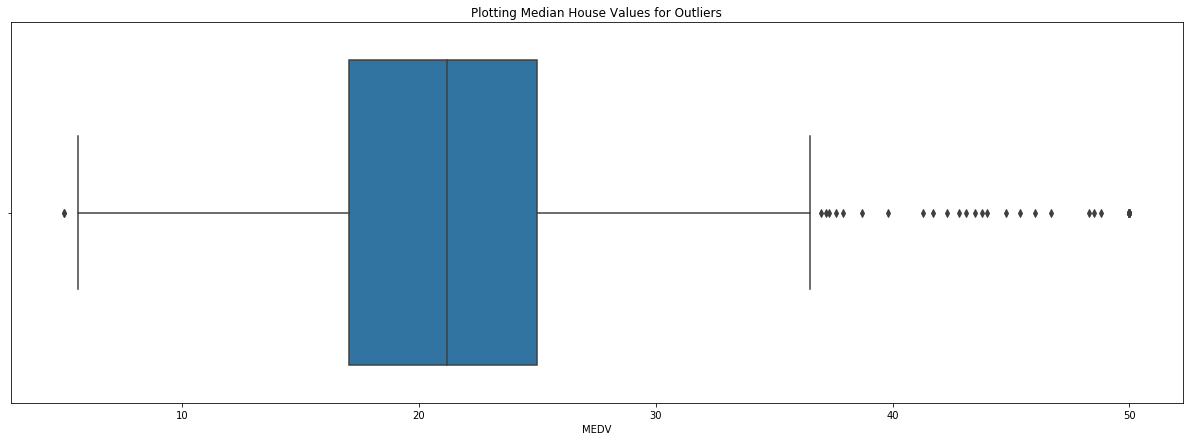

In [31]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [21, 7]

ax = sns.boxplot(x=df["MEDV"]).set_title('Plotting Median House Values for Outliers')

The boxplot shows that there are a significant number of outliers at the upper end of the data set and a smaller number at the lower end. This means that the assumptions for a t-test are violated. In this case we can do one of the following things [18]:

* Check the data – in particular, make sure that that the problematic data are true outliers and not errors in copying
* Ignore the problem – not recommended since this will often yield inaccurate results, although often acceptable if the violation of the assumptions is not too severe
* Perform one of the modified t tests (e.g. Trimmed Means Test or Yuen-Welch’s Test)
* Transform the variable, the Box-Cox transformation can be especially useful
* Use a non-parametric test

Having carried out some internet research I have concluded that non-parametric test are easier to apply since fewer assumptions need to be applied [19]. This research has also led me to the Wilcoxon Rank Sum test for independant samples [20][21], which can be applied provided the two independent samples are drawn from populations with an ordinal distribution. One of the caveats to using this test is that we have to modify our null and alternative hypotheses slightly to fit this test. Rather that using "the means are equal" for our null hypothesis we instead claim it as follows:

$H_0$: the observations come from the same population

Meaning the alternative hypothesis is:

$H_a$: the observations do not come from the same population

Its a small detail but its worth noting.

#### 3.2.3 Analyse Sample Data

The first step we must carry out is to see if our sample data shows a difference in median house values depending on proximity to the river. 

In [32]:
# split the data in 2 2 dataframes depending on location
df_near_chas = df[df["CHAS"]==1]
df_not_chas = df[df["CHAS"]==0]
# print the mean of the median values depending location
print("The mean of the median values of houses near the Charles river is: $",round(df_near_chas["MEDV"].mean()*1000))
print("The mean of the median values of houses not near the Charles river is: $",round(df_not_chas["MEDV"].mean()*1000))
print("The percentage difference is :",
      (df_near_chas["MEDV"].mean()-df_not_chas["MEDV"].mean()/df_not_chas["MEDV"].mean()),"%")

The mean of the median values of houses near the Charles river is: $ 28440
The mean of the median values of houses not near the Charles river is: $ 22094
The percentage difference is : 27.44 %


Our sample data is telling us that median value of houses near the river are 6 thousand dollars higher than those not on the river. This would mean that houses near the river have a median value that is 27% higher than those not on the river.

The next step is to visualise the data to see if this difference is obvious graphically. Note that as there are many more data points not near the Charles river, I am plotting the densities so that the data is easier to compare.

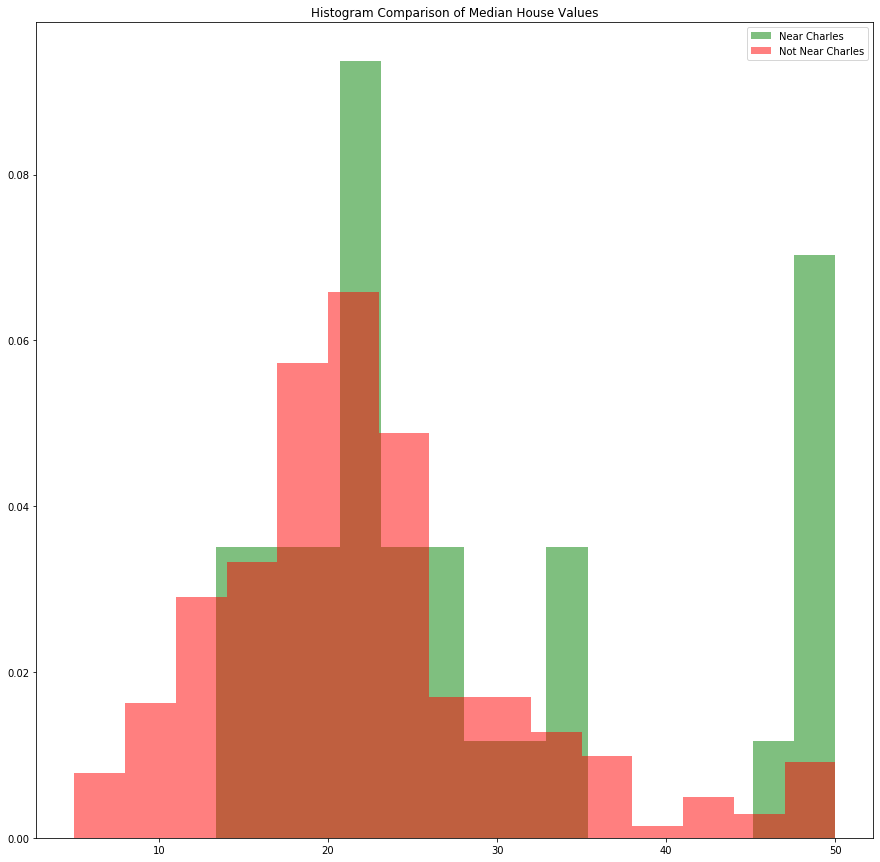

In [33]:
# Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
plt.rcParams['figure.figsize'] = [15, 15]

# plot the histograms
plt.hist(df_near_chas["MEDV"], bins=15, color="green", alpha=0.5, density=True, label="Near Charles")
plt.hist(df_not_chas["MEDV"], bins=15, color="red", alpha=0.5, density=True, label="Not Near Charles")
plt.title("Histogram Comparison of Median House Values")
plt.legend()
plt.show()

The first thing that jumps put from this chart is that in general house values of houses not along the river are normally distributed around the calculated mean of about 22 thousand. The values of houses that are not along the river are a bit different - in general they follow a similar patter to those not along the river, but the mean is being inflated by a higher proportion of data points that have much higher house values. So our hypothesis test should tell us how statistically significant the impact of these higher valued houses are on the whole.

In [34]:
# use scipy to calculate the t-stat and p-value of the Wilcoxon Rank Sum test
stats.ranksums(df_not_chas["MEDV"], df_near_chas["MEDV"])

RanksumsResult(statistic=-3.1597469070918573, pvalue=0.0015790624227478714)

#### 3.2.4 Interpret Results

Based on the analysis of the data we can conclude the following:
* Median house values along the river are approx 6,000 dollars (or 27%) more higher than those that are not along the river.
* Since the p-value (0.0015) is less that the significance level (0.05) we cannot accept the null hypothesis that the samples were drawn from the same population.
* Therefore the differences are statistically significant.

Something that is worthy of further discussion is the impact of the outliers on the significance. As part of the experimental design it was determined that the sampled data did not meet the condition of being normally distributed (without outliers). One of the suggested options I came across in my research was to ignore it (but it wasn't highly recommended). Had I ignored it I could have used the standard independant t-test for statistical significance. The results of which would have been as follows:

In [35]:
# use scipy to calculate the t-stat and p-value of the independant t-test
stats.ttest_ind(df_not_chas["MEDV"], df_near_chas["MEDV"])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Note that in this case the p value is significantly lower - 2 orders of magnitude lower in fact. By simply ignoring the fact that the data had outliers it could easily allow somebody to reject a null hypothesis incorrectly. This highlights the importance of checking the assumptions and then selecting an appropriate test based on the sampled data.

## 4. Predicting Boston House Prices with Keras

<img src="img/keras.png" width="700"></img>

In this section we will use the machine learning package Keras and the Boston Housing dataset to create and train a neural network that will allows us to predict house prices based on the other features in the dataset. The plan for this section is as follows:

* General introduction to machine learning
* Introduction to neural networks
* Description of Keras and Tensorflow
* Create the machine learning model for making predictions
* Evaluate the model and discuss

### 4.1 Introduction to Machine Learning

The term *Machine Learning* was first coined in the 1950's by a prominent computer games pioneer named Arthur Samuel[23][25]. He defined it as the ability of computers to learn without being explicitly programmed. This definition was refined and formalised in 1997 by Tom Mitchell when he stated that *"A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E."*

<img src="img/machine.jpg" width="700"></img>

In recent years the term has become more commonplace as it is a fast growing subfield of computer science. If we are to consider how a machine might learn (or get better at some task with experience), it useful to think of how humans learn. Consider a person throwing a dart at a dartboard aiming for the bullseye. After 1 or 2 throws the might realise that they are throwing to too low, so they adjust the throwing angle. This may lead to the dart landing too high so the adjust the power used in the throw. Gradually and iteratively as the human gets more experience of the task they will get better at it. They are learning.

In the field of data analytics machine learning is used to create complex algorithms to analyse datasets that can then be used to make predictions. In fact the aim of this section of the project is to do just that! 

Depending on the problem to be solved, there are many different approaches to machine learning such as[24]:
* Supervised Learning
* Unsupervised Learning

In supervised learning, the algorithm is trained with data for which the model inputs are labelled with the deisred outputs by a human. An algorithm such as this will compare the actual outputs with the predicted outputs and improve the model. A common use case for this would be handwriting recognition, where a model could be trained on a set of data what typical letters look like so that when fed an unknown letter in the future it can predict what letter it is most likely to be. Supervised learning techniques are used to anaylse historic data with a view to predicting statistically likely future behaviour. We will use a supervised learning technique in this project to predict median house prices in the Boston area, based on the historical data that we have in the dataset.

In unsupervised learning, data is unlabelled. This means that the algorithm must determine the relationships between the input data. This is particularly useful in situations where the 'labelling' of data is unknown or unknowable. An example of where this might be used is in targeted marketing. By collecting large sets of data on customers and their purchases, it might be possible for an algorithm to detect whether a person is likely to enjoy a particular pastime and then direct targeted marketing based on this towards them.

Two of the most common supervised machine learning tasks are:

1. Regression - this is a supervised learning technique that is used when the outputs are numerical and continuous. We will used a regression technique when analysing the Boston data set.

1. Classification - this is used when inputs are divided into 2 more classes for outputs. Handwriting recognition is an example of this.

Machine learning algorithms make use of Neural Networks in order to learn from the data. These will be explained in the next section.

### 4.2 Introduction to Neural Networks

#### 4.2.1 Neurons

A neural network was defined as *a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs*, [26] by Dr. Robert Hecht-Nielsen, the inventor of one of the first neuro-computers. It is inspired by the way biological neurons in the human brain process information.

The basic unit of computation in a neural network in a neuron. A neuron receives information from an external source (or other neurons in the network) in the form of inputs. These inputs all have a weighting to determine there importance compared to other inputs. Each neuron also has a constant bias which is used to help refine the model, allowing the fit of the model to be improved [27].

The basic idea is that the weights are learnable and that they control the influence of of one neuron on another. Finally an activation function is applied to the output of the neuron. If we do not apply a Activation function then the output signal would simply be a simple linear function. Linear functions are limited in their complexity and have less power to learn complex functional mappings from data. A Neural Network without an activation function would simply be a linear regression Model, which has limited power [28]. In short, when we train a neural network we want the neurons to fire whenever they learn specific patterns from the data, and we model the fire rate using an activation function [26]. 

A simple schematic of a 2-input neurons is shown below:

<img src="img/neuron schematic.png"></img>

As a demonstration, lets assume that $w_1$ has the value of 0 and $w_2$ has the value of 1. Lets also assume that the bias, b, is 4. For this example lets use [2,3] as the values for $x_1$ and $x_2$.Finally lets use the <a href="https://en.wikipedia.org/wiki/Sigmoid_function">sigmoid function</a> [29] as the activation function. The sigmoid function is commonly used for this purpose as it always returns values between 0 and 1. Is is defined as:
$$S(x) = \dfrac{e^x}{1 + e^x}$$
Using this data we can model the output of this neuron using Python:

In [36]:
# Define the sigmoid activation function
def sigmoid(x):
    e = math.e
    return (e**x/(1 + e**x))
# define the numpy arrays for the inputs and weight
inputs = np.array([2,3])
weights = np.array([0,1])
bias = 4

# get the dot product of the weights and inputs and add the bias
sum_in = np.dot(inputs, weights) + bias

#apply the activation function to get the output
output = sigmoid(sum_in)
print("The output from our simple 2-input neuron is ", round(output,3))   

The output from our simple 2-input neuron is  0.999


This demonstrates that individual neurons are quite simple. The complexity of the model lies the networking of these neurons.

#### 4.2.2 Neural Networks

A neural network is nothing more than a group of neurons connected together. Consider the following:

<img src="img/simple network.png" width=700></img>

The simple network above has:
1. An input layer with 2 inputs $x_1$ and $x_2$
1. A hidden layer with 2 neurons $h_1$ and $h_2$
1. A output layer $O_1$

Consider the case where where all neurons have the same weights, [0,1] as before, and bias ,0 to keep the maths simple. Again we'll use the sigmoid activation function on the output of all neurons. Assuming the same inputs as before ($x_1$ = 2, $x_2$ = 3). We can calculate the value output from the network as follows.

In [37]:
# define the inputs
inputs = [2,3]
weights = [0,1]
bias = 0
# calculate output from h1
h1_sum_in = np.dot(inputs, weights) + bias
h1 = sigmoid(h1_sum_in)

# calculate the output from h2
h2_sum_in = np.dot(inputs, weights) + bias
h2 = sigmoid(h2_sum_in)

# set these outputs as the inputs to the output neuron
o1_inputs = [h1,h2]

# calculate the output, o1
o1_sum_in = np.dot(o1_inputs, weights) + bias
o1 = sigmoid(o1_sum_in)

# print the output
print("The output from our simple 2-input neural network is ", round(o1,3))   

The output from our simple 2-input neural network is  0.722


That demonstrates how individual neurons can be connected into a network, and how the calculations are carried out through the network. Note the following:
1. Input Layer: There is no computation done on the input layer. These values are passed into the next layer for computation
1. Hidden Layer: The computation and processing is carried out in the hidden layers and the output from these are carried forward to the next layers.
1. Output Layer: It is possible to have multiple output nodes in this layer, if we are trying to predict more than one output based on the input data.
1. Connections: As demonstrated, the network consists on weighted connections between the neurons.
1. Activation Function: This defines the output of a neuron for a given set of inputs. 
1. Learning rule: This is an algorithm that modifies the parameters (weight and biases) of the model to produce a favoured output for a given set of inputs.

#### 4.2.3 Training the Neural Network

For this project, the plan will be to use the Python packages Tensorflow and Keras to model a neural network and then train it using the Boston Housing Dataset, so that this network could then be used for predicting house prices of other houses. The process of training the network can be quite tricky and is very much one of trial and error. A good approach to training such a network would be as follows:
1. Decide what features of the dataset might make good indicators to be used for estimating house prices.
1. Create a model using the Keras package
1. Define how many layers you want in the model and how many neurons to use in each layer. Note that this can be picked arbitrarily first and refined later.
1. Decide on the activation function for each layer. Again this can be chosen by trial and error as the model is refined.
1. Define 1 neuron in the output layer representing the house prices.
1. Decide on the optimser [30]. This is the process that the algorithm uses to iteratively improve the biases and weights. Common optimisers are 'Adam' and 'Stochastic Gradient Descent'.
1. Decide on the loss function. We will used mean squared error for this. Training the neural network is iterative. We show it some outputs for a given set of inputs. It will select weights and biases for each neuron in the network and calculate the outputs. It will compare the calculated output to the actual output. The loss function is a measure of the difference between these values. The same inputs will be shown to the network again, the biases and weights will be modified to try and improve the difference between the actual outputs and calculated outputs. This will be repeated as many times as defined (each time is known as an EPOCH), each time trying to reduce this loss. The closer to zero the loss is, the better the model will be at predicting house prices based on the inputs. Mean squared error is calculated by taking the difference between each actual output value and predicted output value, squaring it, summing them up and dividing by the number of data points [31]:

$$MSE =  \frac{1}{n} \sum_{n=1}^{n} (Y_i-\hat{Y_i})^2$$

This will allow us to build the model in Keras. The next step is to train the model with the data in the dataset. To help evaluate the dataset it is good practice to keep some of the data back. For this project we will allocate 20% of the data points in the Boston housing dataset for testing. The model will be trained using the other 80%. This will allow us to show the model the testing data (which it hasn't seen before) and ask it to predict the house prices based on this. We can then plot a scatter plot between the actual outputs and predicted outputs to determine how accurate our predictions are.

### 4.3 Creating a Neural Network with the Boston Housing Data  

In this section we will create the model used for making the predictions. Initially we will use the full dataset for this purpose. We will evaluate it's performance at making predictions and see what modifications might be appropriate. The model will be used to try and predict housing prices which are a continuous variable. For this reason this is can be modeled as a regression problem, so I have followed a regression tutorial from the Tensorflow documentation while creating this model [22]. 

The process for creating the model is as follows:

1. Import the dataset (this was completed in section 1 above)
1. Inspect the dataset
1. Clean the dataset if necessary
1. Split the dataset into testing and training data
1. Split the features from the targets (or inputs from outputs)
1. Normalise the data
1. Build the model
1. Train the model
1. Test and evaluate 
1. Modify the model if required and re-evaluate

#### Inspect the dataset and clean it
In this section we will take a look at the dataset to see what kinds of data is in the dataset.

In [38]:
# take a 5 random point from the set
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
18,0.80271,0.0,8.14,0.0,0.5380,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69,20.2
437,15.17720,0.0,18.10,0.0,0.7400,6.152,100.0,1.9142,24.0,666.0,20.2,9.32,26.45,8.7
492,0.11132,0.0,27.74,0.0,0.6090,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35,20.1
331,0.05023,35.0,6.06,0.0,0.4379,5.706,28.4,6.6407,1.0,304.0,16.9,394.02,12.43,17.1
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The dataset contains all numerical fields. This means that there is no requirement to transform any categorical fields to numerical fields. Next we need to determine if there is any missing data.

In [39]:
# check for missing data values
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There are no missing data points in the dataset. 

#### Split the data set into training and testing data.
In order to evaluate the performance of the model, we need to be able to feed data to it that is hasn't seen before and then compare the actual values of the output to the predicted values. For this model I will use 80% of the data in the data set to train the model leaving me 20% of the data points to test it.

In [40]:
# select 80% of the dataset at random
train_dataset = df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["CRIM"].count())
print("There are %d data points in the training set" % train_dataset["CRIM"].count())
print("There are %d data points in the test set" % test_dataset["CRIM"].count())

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


As the entire dataset as 506 data points, the training set has 405 points and the test set has 101 points, it looks like the dataset has been split correctly with 80% of the data points going into the training set.

#### Split the features from the targets
In the next step we will separate the features from the targets. Features will act as inputs to the models these are the things that are used to help predict the targets. The targets are the outputs of the model, i.e. the things we are trying to predict. For this exercise we are trying to predict the median house value (MEDV), so we will separate it from the main training and test datasets using the `pandas` `pop` function.

In [41]:
# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

So at this stage we have inspected the dataset to see if it required cleaning, and then split the dataset into 4 smaller datasets training features, training targets, testing features and testing targets.

#### Normalising the data

It is good practice to normalise data that use different ranges and scales. This makes it easier to train the network. The datasets are normalised by subtracting the mean of the training dataset and dividing by the mean. This will distribute the data with a mean of 0 and a standard deviation of 1. Otherwise there is a risk that features that are on a different scale might be more influential in the model. Note that we calculate these statistics from the training dataset but also use them to normalise the test dataset too. This is done to project the test dataset around the same distribution as the training dataset.

The first step is to determine the mean and standard deviation for each feature in the dataset. This is done using the `pandas` `describe` function. We then transpose them. 

In [42]:
# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# create a normaliser function
def norm(x):
  return ((x - train_stats["mean"])/ train_stats["std"])

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#### Build Model

Note that the code for this was adapted from the Tensorflow regression tutorial. In the tutorial they define a function that is used to build the model. I have decided to start with the same size and shape of neural network as defined in the tutorial. I have changed the activation functions to the sigmoid function. I am using 'Adam' as the optimser and using mean squared error as the loss function.

In [43]:
 # a function for building sequential models
def build_model(neurons_per_layer, activation_function, hidden_layers, dataset):
    # this will be a sequential model - with layers added one at a time  
    model = keras.models.Sequential()
    # add the first hidden layer and define the input shape
    model.add(keras.layers.Dense(neurons_per_layer, activation=activation_function, input_shape=[len(dataset.keys())]))
    for i in range(hidden_layers - 1):
        model.add(keras.layers.Dense(neurons_per_layer, activation=activation_function))
    # define the one neuron in the output layer
    model.add(keras.layers.Dense(1))
    return model 
# build the model
model_1 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_1.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


#### Training the model

In this section we will decide how many times to run the the data through the model. I have decided on 1000 times for the first run. 

In [45]:
# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_1.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 86us/sample - loss: 7.8858 - mean_squared_error: 7.8858 - mean_absolute_error: 1.6808
Epoch 2/1000
405/405 [==============================] - 0s 82us/sample - loss: 7.4331 - mean_squared_error: 7.4331 - mean_absolute_error: 1.6867
Epoch 3/1000
405/405 [==============================] - 0s 94us/sample - loss: 7.1275 - mean_squared_error: 7.1275 - mean_absolute_error: 1.6663
Epoch 4/1000
405/405 [==============================] - 0s 90us/sample - loss: 6.8392 - mean_squared_error: 6.8392 - mean_absolute_error: 1.6596
Epoch 5/1000
405/405 [==============================] - 0s 75us/sample - loss: 6.5898 - mean_squared_error: 6.5898 - mean_absolute_error: 1.6621
Epoch 6/1000
405/405 [==============================] - 0s 91us/sample - loss: 6.4358 - mean_squared_error: 6.4358 - mean_absolute_error: 1.6511
Epoch 7/1000
405/405 [==============================] - 0s 82us/sample - loss: 6.3114 - mean_squared_error: 6.3114 - mean_absolute

405/405 [==============================] - 0s 115us/sample - loss: 4.3128 - mean_squared_error: 4.3128 - mean_absolute_error: 1.5209
Epoch 57/1000
405/405 [==============================] - 0s 100us/sample - loss: 4.3077 - mean_squared_error: 4.3077 - mean_absolute_error: 1.5147
Epoch 58/1000
405/405 [==============================] - 0s 73us/sample - loss: 4.2793 - mean_squared_error: 4.2793 - mean_absolute_error: 1.5154
Epoch 59/1000
405/405 [==============================] - 0s 68us/sample - loss: 4.2741 - mean_squared_error: 4.2741 - mean_absolute_error: 1.5162
Epoch 60/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.2975 - mean_squared_error: 4.2975 - mean_absolute_error: 1.5117
Epoch 61/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.3277 - mean_squared_error: 4.3277 - mean_absolute_error: 1.5258
Epoch 62/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.2897 - mean_squared_error: 4.2897 - mean_absolute_erro

405/405 [==============================] - 0s 106us/sample - loss: 3.8079 - mean_squared_error: 3.8079 - mean_absolute_error: 1.4256
Epoch 113/1000
405/405 [==============================] - 0s 87us/sample - loss: 3.8416 - mean_squared_error: 3.8416 - mean_absolute_error: 1.4506
Epoch 114/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.8244 - mean_squared_error: 3.8244 - mean_absolute_error: 1.4184
Epoch 115/1000
405/405 [==============================] - 0s 86us/sample - loss: 3.8108 - mean_squared_error: 3.8108 - mean_absolute_error: 1.4365
Epoch 116/1000
405/405 [==============================] - 0s 88us/sample - loss: 3.7864 - mean_squared_error: 3.7864 - mean_absolute_error: 1.4304
Epoch 117/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.8058 - mean_squared_error: 3.8058 - mean_absolute_error: 1.4300
Epoch 118/1000
405/405 [==============================] - 0s 91us/sample - loss: 3.8486 - mean_squared_error: 3.8486 - mean_absolute

405/405 [==============================] - 0s 79us/sample - loss: 3.4446 - mean_squared_error: 3.4446 - mean_absolute_error: 1.3585
Epoch 168/1000
405/405 [==============================] - 0s 105us/sample - loss: 3.4434 - mean_squared_error: 3.4434 - mean_absolute_error: 1.3622
Epoch 169/1000
405/405 [==============================] - 0s 102us/sample - loss: 3.4439 - mean_squared_error: 3.4439 - mean_absolute_error: 1.3675
Epoch 170/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.4235 - mean_squared_error: 3.4235 - mean_absolute_error: 1.3527
Epoch 171/1000
405/405 [==============================] - 0s 88us/sample - loss: 3.4268 - mean_squared_error: 3.4268 - mean_absolute_error: 1.3577
Epoch 172/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.4057 - mean_squared_error: 3.4057 - mean_absolute_error: 1.3486
Epoch 173/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.4763 - mean_squared_error: 3.4763 - mean_absolut

405/405 [==============================] - 0s 103us/sample - loss: 3.1696 - mean_squared_error: 3.1696 - mean_absolute_error: 1.3101
Epoch 223/1000
405/405 [==============================] - 0s 105us/sample - loss: 3.1725 - mean_squared_error: 3.1725 - mean_absolute_error: 1.3043
Epoch 224/1000
405/405 [==============================] - 0s 97us/sample - loss: 3.1449 - mean_squared_error: 3.1449 - mean_absolute_error: 1.3180
Epoch 225/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.2025 - mean_squared_error: 3.2025 - mean_absolute_error: 1.3073
Epoch 226/1000
405/405 [==============================] - 0s 88us/sample - loss: 3.2197 - mean_squared_error: 3.2197 - mean_absolute_error: 1.3082
Epoch 227/1000
405/405 [==============================] - 0s 97us/sample - loss: 3.1393 - mean_squared_error: 3.1393 - mean_absolute_error: 1.3174
Epoch 228/1000
405/405 [==============================] - 0s 85us/sample - loss: 3.1445 - mean_squared_error: 3.1445 - mean_absolut

405/405 [==============================] - 0s 97us/sample - loss: 2.9070 - mean_squared_error: 2.9070 - mean_absolute_error: 1.2543
Epoch 278/1000
405/405 [==============================] - 0s 87us/sample - loss: 2.9029 - mean_squared_error: 2.9029 - mean_absolute_error: 1.2477
Epoch 279/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.9051 - mean_squared_error: 2.9051 - mean_absolute_error: 1.2366
Epoch 280/1000
405/405 [==============================] - 0s 83us/sample - loss: 2.9172 - mean_squared_error: 2.9172 - mean_absolute_error: 1.2639
Epoch 281/1000
405/405 [==============================] - 0s 89us/sample - loss: 2.9903 - mean_squared_error: 2.9903 - mean_absolute_error: 1.2535
Epoch 282/1000
405/405 [==============================] - 0s 131us/sample - loss: 2.9850 - mean_squared_error: 2.9850 - mean_absolute_error: 1.2668
Epoch 283/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.8954 - mean_squared_error: 2.8954 - mean_absolute

405/405 [==============================] - 0s 76us/sample - loss: 2.7055 - mean_squared_error: 2.7055 - mean_absolute_error: 1.1983
Epoch 333/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.6997 - mean_squared_error: 2.6997 - mean_absolute_error: 1.2084
Epoch 334/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.6897 - mean_squared_error: 2.6897 - mean_absolute_error: 1.1968
Epoch 335/1000
405/405 [==============================] - 0s 89us/sample - loss: 2.6790 - mean_squared_error: 2.6790 - mean_absolute_error: 1.1913
Epoch 336/1000
405/405 [==============================] - 0s 83us/sample - loss: 2.6774 - mean_squared_error: 2.6774 - mean_absolute_error: 1.1965
Epoch 337/1000
405/405 [==============================] - 0s 79us/sample - loss: 2.6602 - mean_squared_error: 2.6602 - mean_absolute_error: 1.1873
Epoch 338/1000
405/405 [==============================] - 0s 84us/sample - loss: 2.6711 - mean_squared_error: 2.6711 - mean_absolute_

405/405 [==============================] - 0s 86us/sample - loss: 2.5749 - mean_squared_error: 2.5749 - mean_absolute_error: 1.1623
Epoch 388/1000
405/405 [==============================] - 0s 81us/sample - loss: 2.4830 - mean_squared_error: 2.4830 - mean_absolute_error: 1.1473
Epoch 389/1000
405/405 [==============================] - 0s 83us/sample - loss: 2.4807 - mean_squared_error: 2.4807 - mean_absolute_error: 1.1416
Epoch 390/1000
405/405 [==============================] - 0s 99us/sample - loss: 2.5029 - mean_squared_error: 2.5029 - mean_absolute_error: 1.1581
Epoch 391/1000
405/405 [==============================] - 0s 89us/sample - loss: 2.4909 - mean_squared_error: 2.4909 - mean_absolute_error: 1.1415
Epoch 392/1000
405/405 [==============================] - 0s 82us/sample - loss: 2.4796 - mean_squared_error: 2.4796 - mean_absolute_error: 1.1429
Epoch 393/1000
405/405 [==============================] - 0s 84us/sample - loss: 2.4729 - mean_squared_error: 2.4729 - mean_absolute_

405/405 [==============================] - 0s 86us/sample - loss: 2.3107 - mean_squared_error: 2.3107 - mean_absolute_error: 1.0990
Epoch 443/1000
405/405 [==============================] - 0s 79us/sample - loss: 2.3356 - mean_squared_error: 2.3356 - mean_absolute_error: 1.1100
Epoch 444/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.3224 - mean_squared_error: 2.3224 - mean_absolute_error: 1.1017
Epoch 445/1000
405/405 [==============================] - 0s 60us/sample - loss: 2.3050 - mean_squared_error: 2.3050 - mean_absolute_error: 1.1057
Epoch 446/1000
405/405 [==============================] - 0s 60us/sample - loss: 2.3426 - mean_squared_error: 2.3426 - mean_absolute_error: 1.1114
Epoch 447/1000
405/405 [==============================] - 0s 57us/sample - loss: 2.3065 - mean_squared_error: 2.3065 - mean_absolute_error: 1.0984
Epoch 448/1000
405/405 [==============================] - 0s 64us/sample - loss: 2.3031 - mean_squared_error: 2.3031 - mean_absolute_

405/405 [==============================] - 0s 68us/sample - loss: 2.1492 - mean_squared_error: 2.1492 - mean_absolute_error: 1.0535
Epoch 498/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.1692 - mean_squared_error: 2.1692 - mean_absolute_error: 1.0543
Epoch 499/1000
405/405 [==============================] - 0s 65us/sample - loss: 2.1762 - mean_squared_error: 2.1762 - mean_absolute_error: 1.0608
Epoch 500/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.1673 - mean_squared_error: 2.1673 - mean_absolute_error: 1.0661
Epoch 501/1000
405/405 [==============================] - 0s 85us/sample - loss: 2.1666 - mean_squared_error: 2.1666 - mean_absolute_error: 1.0531
Epoch 502/1000
405/405 [==============================] - 0s 95us/sample - loss: 2.1413 - mean_squared_error: 2.1413 - mean_absolute_error: 1.0585
Epoch 503/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.1262 - mean_squared_error: 2.1262 - mean_absolute_

405/405 [==============================] - 0s 73us/sample - loss: 2.0261 - mean_squared_error: 2.0261 - mean_absolute_error: 1.0294
Epoch 553/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.0020 - mean_squared_error: 2.0020 - mean_absolute_error: 1.0086
Epoch 554/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.0368 - mean_squared_error: 2.0368 - mean_absolute_error: 1.0331
Epoch 555/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.0986 - mean_squared_error: 2.0986 - mean_absolute_error: 1.0521
Epoch 556/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.0366 - mean_squared_error: 2.0366 - mean_absolute_error: 1.0275
Epoch 557/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.0642 - mean_squared_error: 2.0642 - mean_absolute_error: 1.0261
Epoch 558/1000
405/405 [==============================] - 0s 64us/sample - loss: 2.0465 - mean_squared_error: 2.0465 - mean_absolute_

405/405 [==============================] - 0s 67us/sample - loss: 1.9046 - mean_squared_error: 1.9046 - mean_absolute_error: 0.9922
Epoch 608/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.9275 - mean_squared_error: 1.9275 - mean_absolute_error: 0.9881
Epoch 609/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.9317 - mean_squared_error: 1.9317 - mean_absolute_error: 1.0045
Epoch 610/1000
405/405 [==============================] - 0s 68us/sample - loss: 1.8882 - mean_squared_error: 1.8882 - mean_absolute_error: 0.9801
Epoch 611/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.8904 - mean_squared_error: 1.8904 - mean_absolute_error: 0.9785
Epoch 612/1000
405/405 [==============================] - 0s 58us/sample - loss: 1.8659 - mean_squared_error: 1.8659 - mean_absolute_error: 0.9744
Epoch 613/1000
405/405 [==============================] - 0s 67us/sample - loss: 1.8788 - mean_squared_error: 1.8788 - mean_absolute_

405/405 [==============================] - 0s 65us/sample - loss: 1.7606 - mean_squared_error: 1.7606 - mean_absolute_error: 0.9454
Epoch 663/1000
405/405 [==============================] - 0s 61us/sample - loss: 1.7454 - mean_squared_error: 1.7454 - mean_absolute_error: 0.9405
Epoch 664/1000
405/405 [==============================] - 0s 57us/sample - loss: 1.8200 - mean_squared_error: 1.8200 - mean_absolute_error: 0.9623
Epoch 665/1000
405/405 [==============================] - 0s 60us/sample - loss: 1.7661 - mean_squared_error: 1.7661 - mean_absolute_error: 0.9479
Epoch 666/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.7928 - mean_squared_error: 1.7928 - mean_absolute_error: 0.9600
Epoch 667/1000
405/405 [==============================] - 0s 66us/sample - loss: 1.7601 - mean_squared_error: 1.7601 - mean_absolute_error: 0.9536
Epoch 668/1000
405/405 [==============================] - 0s 60us/sample - loss: 1.7479 - mean_squared_error: 1.7479 - mean_absolute_

405/405 [==============================] - 0s 64us/sample - loss: 1.6852 - mean_squared_error: 1.6852 - mean_absolute_error: 0.9139
Epoch 718/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.6465 - mean_squared_error: 1.6465 - mean_absolute_error: 0.9033
Epoch 719/1000
405/405 [==============================] - 0s 61us/sample - loss: 1.6710 - mean_squared_error: 1.6710 - mean_absolute_error: 0.9095
Epoch 720/1000
405/405 [==============================] - 0s 62us/sample - loss: 1.6742 - mean_squared_error: 1.6742 - mean_absolute_error: 0.9161
Epoch 721/1000
405/405 [==============================] - 0s 60us/sample - loss: 1.6455 - mean_squared_error: 1.6455 - mean_absolute_error: 0.8999
Epoch 722/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.6718 - mean_squared_error: 1.6718 - mean_absolute_error: 0.9267
Epoch 723/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.6380 - mean_squared_error: 1.6380 - mean_absolute_

405/405 [==============================] - 0s 64us/sample - loss: 1.6122 - mean_squared_error: 1.6122 - mean_absolute_error: 0.9001
Epoch 773/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.5727 - mean_squared_error: 1.5727 - mean_absolute_error: 0.8851
Epoch 774/1000
405/405 [==============================] - 0s 64us/sample - loss: 1.5560 - mean_squared_error: 1.5560 - mean_absolute_error: 0.8808
Epoch 775/1000
405/405 [==============================] - 0s 61us/sample - loss: 1.5422 - mean_squared_error: 1.5422 - mean_absolute_error: 0.8725
Epoch 776/1000
405/405 [==============================] - 0s 61us/sample - loss: 1.5413 - mean_squared_error: 1.5413 - mean_absolute_error: 0.8701
Epoch 777/1000
405/405 [==============================] - 0s 60us/sample - loss: 1.5306 - mean_squared_error: 1.5306 - mean_absolute_error: 0.8699
Epoch 778/1000
405/405 [==============================] - 0s 68us/sample - loss: 1.5310 - mean_squared_error: 1.5310 - mean_absolute_

405/405 [==============================] - 0s 62us/sample - loss: 1.5300 - mean_squared_error: 1.5300 - mean_absolute_error: 0.8816
Epoch 828/1000
405/405 [==============================] - 0s 76us/sample - loss: 1.5384 - mean_squared_error: 1.5384 - mean_absolute_error: 0.8946
Epoch 829/1000
405/405 [==============================] - 0s 84us/sample - loss: 1.4738 - mean_squared_error: 1.4738 - mean_absolute_error: 0.8585
Epoch 830/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.4683 - mean_squared_error: 1.4683 - mean_absolute_error: 0.8440
Epoch 831/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.4605 - mean_squared_error: 1.4605 - mean_absolute_error: 0.8404
Epoch 832/1000
405/405 [==============================] - 0s 61us/sample - loss: 1.4509 - mean_squared_error: 1.4509 - mean_absolute_error: 0.8475
Epoch 833/1000
405/405 [==============================] - 0s 62us/sample - loss: 1.4808 - mean_squared_error: 1.4808 - mean_absolute_

405/405 [==============================] - 0s 63us/sample - loss: 1.4156 - mean_squared_error: 1.4156 - mean_absolute_error: 0.8450
Epoch 883/1000
405/405 [==============================] - 0s 67us/sample - loss: 1.3955 - mean_squared_error: 1.3955 - mean_absolute_error: 0.8259
Epoch 884/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.4220 - mean_squared_error: 1.4220 - mean_absolute_error: 0.8379
Epoch 885/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.4064 - mean_squared_error: 1.4064 - mean_absolute_error: 0.8328
Epoch 886/1000
405/405 [==============================] - 0s 68us/sample - loss: 1.4061 - mean_squared_error: 1.4061 - mean_absolute_error: 0.8334
Epoch 887/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.4015 - mean_squared_error: 1.4015 - mean_absolute_error: 0.8302
Epoch 888/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.3996 - mean_squared_error: 1.3996 - mean_absolute_

405/405 [==============================] - 0s 70us/sample - loss: 1.3283 - mean_squared_error: 1.3283 - mean_absolute_error: 0.8066
Epoch 938/1000
405/405 [==============================] - 0s 73us/sample - loss: 1.3962 - mean_squared_error: 1.3962 - mean_absolute_error: 0.8292
Epoch 939/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.3466 - mean_squared_error: 1.3466 - mean_absolute_error: 0.8089
Epoch 940/1000
405/405 [==============================] - 0s 80us/sample - loss: 1.3675 - mean_squared_error: 1.3675 - mean_absolute_error: 0.8312
Epoch 941/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.3120 - mean_squared_error: 1.3120 - mean_absolute_error: 0.8036
Epoch 942/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.3569 - mean_squared_error: 1.3569 - mean_absolute_error: 0.8194
Epoch 943/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.3966 - mean_squared_error: 1.3966 - mean_absolute_

405/405 [==============================] - 0s 70us/sample - loss: 1.2569 - mean_squared_error: 1.2569 - mean_absolute_error: 0.7796
Epoch 993/1000
405/405 [==============================] - 0s 76us/sample - loss: 1.2549 - mean_squared_error: 1.2549 - mean_absolute_error: 0.7790
Epoch 994/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.2388 - mean_squared_error: 1.2388 - mean_absolute_error: 0.7754
Epoch 995/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.2550 - mean_squared_error: 1.2550 - mean_absolute_error: 0.7825
Epoch 996/1000
405/405 [==============================] - 0s 74us/sample - loss: 1.2765 - mean_squared_error: 1.2765 - mean_absolute_error: 0.7957
Epoch 997/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.2913 - mean_squared_error: 1.2913 - mean_absolute_error: 0.8022
Epoch 998/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.3645 - mean_squared_error: 1.3645 - mean_absolute_

#### Test and Evaluate the Model

Finally we need to determine how good the model is at predicting house prices. For this we will use our trained model, and our test data set. We will create test predictions and compare them to the actual values using a scatterplot. We will probably need to do this several times when optimising the model so I will create a function for testing and evaluating. We will also consider the mean absolute error when evaluating the model. The mean absolute error is the mean absolute difference in dollars between the predicted house price and actual house price from the test set.

The function `eval_plot` will plot the scatter plot and calculate the the linear regression stats, it also returns the mean squared error and the mean absolute error.

/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


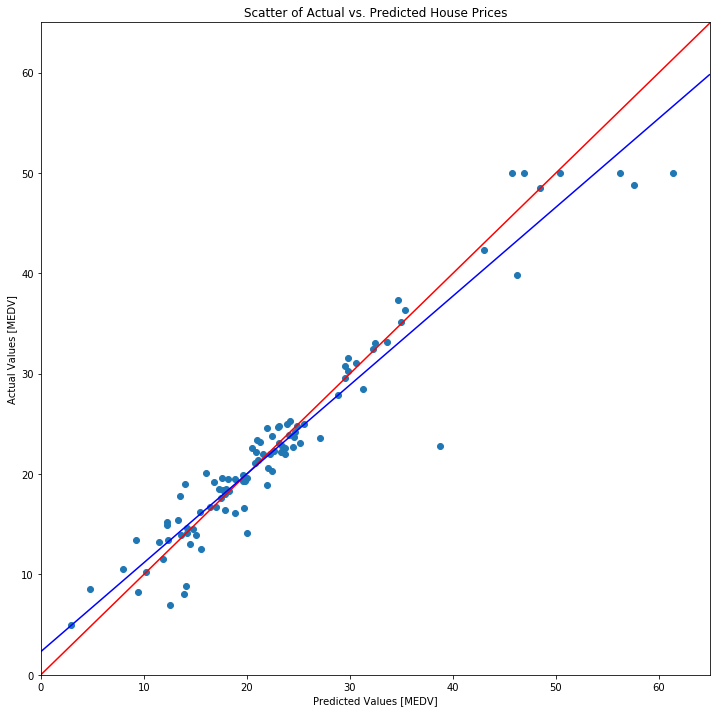

101/101 [==============================] - 0s 84us/sample - loss: 9.6052 - mean_squared_error: 9.6052 - mean_absolute_error: 1.9548
The r-squared value for this evaluation is:  0.923
The slope of the line in this evaluation is:  0.886
The y-intercept in this evaluation is;  2.308
Loss:  9.605215525863194
Mean squared error:  9.605215
Mean absolute error:  1.9548005


In [46]:
# define a fucntion to create the scatterplots

def eval_plot(test_data_inputs, test_data_outputs, model):

    # predict using the test data
    test_predictions = model.predict(test_data_inputs)

    # Resize the plotting window to make it easier to read (https://stackoverflow.com/questions/36367986/how-to-make-inline-plots-in-jupyter-notebook-larger)
    plt.rcParams['figure.figsize'] = [12, 12]

    # calculate the the linear regression stats
    slope, intercept, r_value, p_value, std_err = stats.linregress(test_predictions.T, test_data_outputs)

    # title
    plt.title("Scatter of Actual vs. Predicted House Prices")

    # set the x and y limits
    lims = [0, 65]
    plt.xlim(lims)
    plt.ylim(lims)

    # label the axes
    plt.ylabel('Actual Values [MEDV]')
    plt.xlabel('Predicted Values [MEDV]')

    # plot a red line (y=x)
    _ = plt.plot(lims, lims, c='red')

    # plot the scatter
    plt.scatter(test_predictions.T, test_targets)

    # plot best-fit line
    x = np.arange(0,65,0.1)
    y = slope * x + intercept

    plt.plot(x,y,'b-')

    plt.show()
    loss, mse, mae = model.evaluate(test_data_inputs, test_data_outputs)
    # print the linear regression stats
    print("The r-squared value for this evaluation is: ", round(r_value*r_value,3))
    print("The slope of the line in this evaluation is: ", round(slope,3))
    print("The y-intercept in this evaluation is; ",round(intercept,3))
    print("Loss: ", loss)
    print("Mean squared error: ", mse)
    print("Mean absolute error: ", mae)
    
 

# call the function to evaluate the model
eval_plot(normed_test_data, test_targets, model_1)

To evaluate this model we need to consider both the graph and the linear regression stats. If the model made perfect predictions all of the points would lie on the blue line, and the blue line would lie exactly on the red line. There seems to be a good correlation between the predicted values and the true values as the $r^2$ value for the evaluation model us high at nearly 0.95. However the best fit line for the points is not $y = x$, and the mean absolute error is less than $2,000 dollars. This is quite good at predicting house prices on the test set, however there is some scope to try and improve the model. In the following section we will carry out the following:

1. Experiment with some different activation functions.
1. Experiment with some different optimizers. 
1. Change the shape of the model by adding more hidden layers.
1. Change the shape of the model by modifying the number of neurons in each layer.
1. Build a new model using only a subset of the data (In Section 1 were determined that LSTAT and RM were highly correlated to the MEDV)

### Optimising the model

In this section we will look at optimising the model as descibed above. First we will look at changing just the activation functions. We will then re-evaluate to see which one gives the best results for this model.


#### Testing Activation Functions
While researching this project I came across 3 other activation functions[32] that can be investigated to see do they improve the predictions. These are:

* linear, this is a basic activation function that does not apply any transformation to the output of the neurons
* tanh, this is the hyperbolic tan function. It is similar to the sigmoid function but it returns values in the range -1 to 1
* relu, this returns 0 for negative values - otherwise it is just a linear function.

In this next step we will rebuild the model 3 times, each using a different activation function. We will train each model using the training data and test as before to see if any other activation function improves on the sigmoid function from the last section.

#### The linear activation function

In this step we will build the model as before except this time we will only use a linear activation function. First we build, compile and train the model.

In [47]:
# build the model
model_2 = build_model(64,'linear',2,train_dataset)
# compile the model define the loss function and optimiser
model_2.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_2.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 555us/sample - loss: 569.5025 - mean_squared_error: 569.5025 - mean_absolute_error: 22.3793
Epoch 2/1000
405/405 [==============================] - 0s 114us/sample - loss: 541.0947 - mean_squared_error: 541.0947 - mean_absolute_error: 22.0836
Epoch 3/1000
405/405 [==============================] - 0s 88us/sample - loss: 518.6571 - mean_squared_error: 518.6571 - mean_absolute_error: 21.7590
Epoch 4/1000
405/405 [==============================] - 0s 77us/sample - loss: 491.4540 - mean_squared_error: 491.4539 - mean_absolute_error: 21.2493
Epoch 5/1000
405/405 [==============================] - 0s 80us/sample - loss: 458.1365 - mean_squared_error: 458.1365 - mean_absolute_error: 20.5646
Epoch 6/1000
405/405 [==============================] - 0s 81us/sample - loss: 415.6257 - mean_squared_error: 415.6257 - mean_absolute_error: 19.6119
Epoch 7/1000
405/405 [==============================] - 0s 75us/sample - loss: 360.7718 - mean_squ

405/405 [==============================] - 0s 94us/sample - loss: 24.1280 - mean_squared_error: 24.1280 - mean_absolute_error: 3.4388
Epoch 57/1000
405/405 [==============================] - 0s 89us/sample - loss: 24.4434 - mean_squared_error: 24.4434 - mean_absolute_error: 3.4090
Epoch 58/1000
405/405 [==============================] - 0s 85us/sample - loss: 24.7785 - mean_squared_error: 24.7785 - mean_absolute_error: 3.4530
Epoch 59/1000
405/405 [==============================] - 0s 81us/sample - loss: 24.2900 - mean_squared_error: 24.2900 - mean_absolute_error: 3.4214
Epoch 60/1000
405/405 [==============================] - 0s 86us/sample - loss: 24.0021 - mean_squared_error: 24.0021 - mean_absolute_error: 3.4235
Epoch 61/1000
405/405 [==============================] - 0s 66us/sample - loss: 24.0858 - mean_squared_error: 24.0858 - mean_absolute_error: 3.4136
Epoch 62/1000
405/405 [==============================] - 0s 95us/sample - loss: 24.2732 - mean_squared_error: 24.2732 - mean_a

405/405 [==============================] - 0s 74us/sample - loss: 24.6133 - mean_squared_error: 24.6133 - mean_absolute_error: 3.4097
Epoch 112/1000
405/405 [==============================] - 0s 82us/sample - loss: 24.3659 - mean_squared_error: 24.3659 - mean_absolute_error: 3.4671
Epoch 113/1000
405/405 [==============================] - 0s 67us/sample - loss: 24.0020 - mean_squared_error: 24.0020 - mean_absolute_error: 3.4008
Epoch 114/1000
405/405 [==============================] - 0s 72us/sample - loss: 24.3487 - mean_squared_error: 24.3487 - mean_absolute_error: 3.3984
Epoch 115/1000
405/405 [==============================] - 0s 103us/sample - loss: 24.4384 - mean_squared_error: 24.4384 - mean_absolute_error: 3.4610
Epoch 116/1000
405/405 [==============================] - 0s 85us/sample - loss: 24.1653 - mean_squared_error: 24.1653 - mean_absolute_error: 3.4521
Epoch 117/1000
405/405 [==============================] - 0s 100us/sample - loss: 25.0449 - mean_squared_error: 25.0449 

405/405 [==============================] - 0s 83us/sample - loss: 24.0557 - mean_squared_error: 24.0557 - mean_absolute_error: 3.4413
Epoch 166/1000
405/405 [==============================] - 0s 94us/sample - loss: 23.8996 - mean_squared_error: 23.8996 - mean_absolute_error: 3.3823
Epoch 167/1000
405/405 [==============================] - 0s 77us/sample - loss: 24.2002 - mean_squared_error: 24.2002 - mean_absolute_error: 3.4410
Epoch 168/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.1657 - mean_squared_error: 24.1657 - mean_absolute_error: 3.4133
Epoch 169/1000
405/405 [==============================] - 0s 81us/sample - loss: 23.9227 - mean_squared_error: 23.9227 - mean_absolute_error: 3.3982
Epoch 170/1000
405/405 [==============================] - 0s 74us/sample - loss: 24.2131 - mean_squared_error: 24.2131 - mean_absolute_error: 3.4491
Epoch 171/1000
405/405 [==============================] - 0s 89us/sample - loss: 23.9495 - mean_squared_error: 23.9495 - 

405/405 [==============================] - 0s 68us/sample - loss: 24.2461 - mean_squared_error: 24.2461 - mean_absolute_error: 3.4001
Epoch 221/1000
405/405 [==============================] - 0s 68us/sample - loss: 24.1730 - mean_squared_error: 24.1730 - mean_absolute_error: 3.3657
Epoch 222/1000
405/405 [==============================] - 0s 68us/sample - loss: 24.6173 - mean_squared_error: 24.6173 - mean_absolute_error: 3.4727
Epoch 223/1000
405/405 [==============================] - 0s 67us/sample - loss: 24.2510 - mean_squared_error: 24.2510 - mean_absolute_error: 3.4199
Epoch 224/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.4634 - mean_squared_error: 24.4634 - mean_absolute_error: 3.4255
Epoch 225/1000
405/405 [==============================] - 0s 84us/sample - loss: 24.0709 - mean_squared_error: 24.0709 - mean_absolute_error: 3.4416
Epoch 226/1000
405/405 [==============================] - 0s 86us/sample - loss: 23.9944 - mean_squared_error: 23.9944 - 

405/405 [==============================] - 0s 96us/sample - loss: 23.9547 - mean_squared_error: 23.9547 - mean_absolute_error: 3.3405
Epoch 276/1000
405/405 [==============================] - 0s 89us/sample - loss: 24.0726 - mean_squared_error: 24.0726 - mean_absolute_error: 3.4460
Epoch 277/1000
405/405 [==============================] - 0s 87us/sample - loss: 24.0758 - mean_squared_error: 24.0758 - mean_absolute_error: 3.3881
Epoch 278/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.1305 - mean_squared_error: 24.1305 - mean_absolute_error: 3.3544
Epoch 279/1000
405/405 [==============================] - 0s 79us/sample - loss: 24.2949 - mean_squared_error: 24.2949 - mean_absolute_error: 3.4560
Epoch 280/1000
405/405 [==============================] - 0s 81us/sample - loss: 23.8496 - mean_squared_error: 23.8496 - mean_absolute_error: 3.4271
Epoch 281/1000
405/405 [==============================] - 0s 72us/sample - loss: 24.0895 - mean_squared_error: 24.0895 - 

405/405 [==============================] - 0s 77us/sample - loss: 24.4861 - mean_squared_error: 24.4861 - mean_absolute_error: 3.3990
Epoch 331/1000
405/405 [==============================] - 0s 94us/sample - loss: 24.3515 - mean_squared_error: 24.3515 - mean_absolute_error: 3.4735
Epoch 332/1000
405/405 [==============================] - 0s 114us/sample - loss: 24.1628 - mean_squared_error: 24.1628 - mean_absolute_error: 3.4093
Epoch 333/1000
405/405 [==============================] - 0s 95us/sample - loss: 24.6800 - mean_squared_error: 24.6800 - mean_absolute_error: 3.4282
Epoch 334/1000
405/405 [==============================] - 0s 88us/sample - loss: 23.9787 - mean_squared_error: 23.9787 - mean_absolute_error: 3.3961
Epoch 335/1000
405/405 [==============================] - 0s 98us/sample - loss: 24.0280 - mean_squared_error: 24.0280 - mean_absolute_error: 3.4119
Epoch 336/1000
405/405 [==============================] - 0s 116us/sample - loss: 24.0697 - mean_squared_error: 24.0697 

405/405 [==============================] - 0s 74us/sample - loss: 23.9253 - mean_squared_error: 23.9253 - mean_absolute_error: 3.3868
Epoch 386/1000
405/405 [==============================] - 0s 75us/sample - loss: 23.8677 - mean_squared_error: 23.8677 - mean_absolute_error: 3.4404
Epoch 387/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.0305 - mean_squared_error: 24.0305 - mean_absolute_error: 3.4005
Epoch 388/1000
405/405 [==============================] - 0s 81us/sample - loss: 24.0410 - mean_squared_error: 24.0410 - mean_absolute_error: 3.3983
Epoch 389/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.0791 - mean_squared_error: 24.0791 - mean_absolute_error: 3.5010
Epoch 390/1000
405/405 [==============================] - 0s 79us/sample - loss: 24.2918 - mean_squared_error: 24.2918 - mean_absolute_error: 3.3477
Epoch 391/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.4993 - mean_squared_error: 24.4993 - 

405/405 [==============================] - 0s 71us/sample - loss: 24.0924 - mean_squared_error: 24.0924 - mean_absolute_error: 3.3872
Epoch 441/1000
405/405 [==============================] - 0s 66us/sample - loss: 24.2320 - mean_squared_error: 24.2320 - mean_absolute_error: 3.4489
Epoch 442/1000
405/405 [==============================] - 0s 65us/sample - loss: 24.3648 - mean_squared_error: 24.3648 - mean_absolute_error: 3.4195
Epoch 443/1000
405/405 [==============================] - 0s 72us/sample - loss: 23.9103 - mean_squared_error: 23.9103 - mean_absolute_error: 3.3887
Epoch 444/1000
405/405 [==============================] - 0s 67us/sample - loss: 23.9970 - mean_squared_error: 23.9970 - mean_absolute_error: 3.4168
Epoch 445/1000
405/405 [==============================] - 0s 65us/sample - loss: 24.0233 - mean_squared_error: 24.0232 - mean_absolute_error: 3.3882
Epoch 446/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.1384 - mean_squared_error: 24.1384 - 

405/405 [==============================] - 0s 101us/sample - loss: 24.0677 - mean_squared_error: 24.0677 - mean_absolute_error: 3.3895
Epoch 496/1000
405/405 [==============================] - 0s 95us/sample - loss: 23.9959 - mean_squared_error: 23.9959 - mean_absolute_error: 3.4374
Epoch 497/1000
405/405 [==============================] - 0s 101us/sample - loss: 23.8318 - mean_squared_error: 23.8318 - mean_absolute_error: 3.3668
Epoch 498/1000
405/405 [==============================] - 0s 90us/sample - loss: 24.1597 - mean_squared_error: 24.1597 - mean_absolute_error: 3.4082
Epoch 499/1000
405/405 [==============================] - 0s 91us/sample - loss: 23.8694 - mean_squared_error: 23.8694 - mean_absolute_error: 3.3879
Epoch 500/1000
405/405 [==============================] - 0s 76us/sample - loss: 24.1048 - mean_squared_error: 24.1048 - mean_absolute_error: 3.3771
Epoch 501/1000
405/405 [==============================] - 0s 106us/sample - loss: 24.1207 - mean_squared_error: 24.1207

405/405 [==============================] - 0s 58us/sample - loss: 24.0267 - mean_squared_error: 24.0267 - mean_absolute_error: 3.4372
Epoch 550/1000
405/405 [==============================] - 0s 60us/sample - loss: 24.2115 - mean_squared_error: 24.2115 - mean_absolute_error: 3.4123
Epoch 551/1000
405/405 [==============================] - 0s 60us/sample - loss: 24.0809 - mean_squared_error: 24.0809 - mean_absolute_error: 3.4124
Epoch 552/1000
405/405 [==============================] - 0s 62us/sample - loss: 24.5779 - mean_squared_error: 24.5779 - mean_absolute_error: 3.4252
Epoch 553/1000
405/405 [==============================] - 0s 382us/sample - loss: 24.3409 - mean_squared_error: 24.3409 - mean_absolute_error: 3.4812
Epoch 554/1000
405/405 [==============================] - 0s 128us/sample - loss: 24.5806 - mean_squared_error: 24.5806 - mean_absolute_error: 3.4795
Epoch 555/1000
405/405 [==============================] - 0s 93us/sample - loss: 24.0366 - mean_squared_error: 24.0366 

405/405 [==============================] - 0s 88us/sample - loss: 23.9262 - mean_squared_error: 23.9262 - mean_absolute_error: 3.4216
Epoch 604/1000
405/405 [==============================] - 0s 82us/sample - loss: 24.3836 - mean_squared_error: 24.3836 - mean_absolute_error: 3.4608
Epoch 605/1000
405/405 [==============================] - 0s 81us/sample - loss: 24.3910 - mean_squared_error: 24.3910 - mean_absolute_error: 3.4353
Epoch 606/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.3703 - mean_squared_error: 24.3703 - mean_absolute_error: 3.3549
Epoch 607/1000
405/405 [==============================] - 0s 82us/sample - loss: 23.8515 - mean_squared_error: 23.8515 - mean_absolute_error: 3.3988
Epoch 608/1000
405/405 [==============================] - 0s 86us/sample - loss: 23.9080 - mean_squared_error: 23.9080 - mean_absolute_error: 3.4087
Epoch 609/1000
405/405 [==============================] - 0s 70us/sample - loss: 23.9935 - mean_squared_error: 23.9935 - 

405/405 [==============================] - 0s 92us/sample - loss: 24.1449 - mean_squared_error: 24.1449 - mean_absolute_error: 3.4741
Epoch 659/1000
405/405 [==============================] - 0s 94us/sample - loss: 23.8065 - mean_squared_error: 23.8065 - mean_absolute_error: 3.4003
Epoch 660/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.1618 - mean_squared_error: 24.1618 - mean_absolute_error: 3.4004
Epoch 661/1000
405/405 [==============================] - 0s 83us/sample - loss: 23.9735 - mean_squared_error: 23.9735 - mean_absolute_error: 3.4120
Epoch 662/1000
405/405 [==============================] - 0s 75us/sample - loss: 23.9678 - mean_squared_error: 23.9678 - mean_absolute_error: 3.3616
Epoch 663/1000
405/405 [==============================] - 0s 74us/sample - loss: 23.9985 - mean_squared_error: 23.9985 - mean_absolute_error: 3.4048
Epoch 664/1000
405/405 [==============================] - 0s 72us/sample - loss: 24.0721 - mean_squared_error: 24.0721 - 

405/405 [==============================] - 0s 68us/sample - loss: 23.9304 - mean_squared_error: 23.9304 - mean_absolute_error: 3.3796
Epoch 714/1000
405/405 [==============================] - 0s 82us/sample - loss: 24.2733 - mean_squared_error: 24.2733 - mean_absolute_error: 3.4258
Epoch 715/1000
405/405 [==============================] - 0s 81us/sample - loss: 24.0422 - mean_squared_error: 24.0422 - mean_absolute_error: 3.4408
Epoch 716/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.4904 - mean_squared_error: 24.4904 - mean_absolute_error: 3.4023
Epoch 717/1000
405/405 [==============================] - 0s 86us/sample - loss: 24.1576 - mean_squared_error: 24.1576 - mean_absolute_error: 3.4123
Epoch 718/1000
405/405 [==============================] - 0s 86us/sample - loss: 23.9707 - mean_squared_error: 23.9707 - mean_absolute_error: 3.4364
Epoch 719/1000
405/405 [==============================] - 0s 70us/sample - loss: 23.8772 - mean_squared_error: 23.8772 - 

405/405 [==============================] - 0s 83us/sample - loss: 23.8845 - mean_squared_error: 23.8845 - mean_absolute_error: 3.3936
Epoch 769/1000
405/405 [==============================] - 0s 71us/sample - loss: 24.1458 - mean_squared_error: 24.1458 - mean_absolute_error: 3.4010
Epoch 770/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.0360 - mean_squared_error: 24.0360 - mean_absolute_error: 3.4392
Epoch 771/1000
405/405 [==============================] - 0s 87us/sample - loss: 24.3221 - mean_squared_error: 24.3221 - mean_absolute_error: 3.4044
Epoch 772/1000
405/405 [==============================] - 0s 82us/sample - loss: 24.3246 - mean_squared_error: 24.3246 - mean_absolute_error: 3.4235
Epoch 773/1000
405/405 [==============================] - 0s 85us/sample - loss: 24.0843 - mean_squared_error: 24.0843 - mean_absolute_error: 3.3922
Epoch 774/1000
405/405 [==============================] - 0s 90us/sample - loss: 24.3582 - mean_squared_error: 24.3582 - 

405/405 [==============================] - 0s 67us/sample - loss: 24.2528 - mean_squared_error: 24.2528 - mean_absolute_error: 3.4815
Epoch 824/1000
405/405 [==============================] - 0s 65us/sample - loss: 24.0131 - mean_squared_error: 24.0131 - mean_absolute_error: 3.4178
Epoch 825/1000
405/405 [==============================] - 0s 67us/sample - loss: 24.0027 - mean_squared_error: 24.0027 - mean_absolute_error: 3.3737
Epoch 826/1000
405/405 [==============================] - 0s 66us/sample - loss: 23.9119 - mean_squared_error: 23.9119 - mean_absolute_error: 3.3807
Epoch 827/1000
405/405 [==============================] - 0s 65us/sample - loss: 23.9944 - mean_squared_error: 23.9944 - mean_absolute_error: 3.4321
Epoch 828/1000
405/405 [==============================] - 0s 63us/sample - loss: 23.9503 - mean_squared_error: 23.9503 - mean_absolute_error: 3.3419
Epoch 829/1000
405/405 [==============================] - 0s 74us/sample - loss: 23.8861 - mean_squared_error: 23.8861 - 

405/405 [==============================] - 0s 84us/sample - loss: 24.0435 - mean_squared_error: 24.0435 - mean_absolute_error: 3.4392
Epoch 879/1000
405/405 [==============================] - 0s 102us/sample - loss: 24.0636 - mean_squared_error: 24.0636 - mean_absolute_error: 3.4259
Epoch 880/1000
405/405 [==============================] - 0s 91us/sample - loss: 23.7952 - mean_squared_error: 23.7952 - mean_absolute_error: 3.3395
Epoch 881/1000
405/405 [==============================] - 0s 83us/sample - loss: 23.8243 - mean_squared_error: 23.8243 - mean_absolute_error: 3.3621
Epoch 882/1000
405/405 [==============================] - 0s 85us/sample - loss: 23.9137 - mean_squared_error: 23.9137 - mean_absolute_error: 3.4465
Epoch 883/1000
405/405 [==============================] - 0s 75us/sample - loss: 24.0119 - mean_squared_error: 24.0119 - mean_absolute_error: 3.3921
Epoch 884/1000
405/405 [==============================] - 0s 78us/sample - loss: 24.7409 - mean_squared_error: 24.7409 -

405/405 [==============================] - 0s 71us/sample - loss: 24.0514 - mean_squared_error: 24.0514 - mean_absolute_error: 3.3494
Epoch 934/1000
405/405 [==============================] - 0s 68us/sample - loss: 24.3952 - mean_squared_error: 24.3952 - mean_absolute_error: 3.5171
Epoch 935/1000
405/405 [==============================] - 0s 92us/sample - loss: 25.2988 - mean_squared_error: 25.2988 - mean_absolute_error: 3.5133
Epoch 936/1000
405/405 [==============================] - 0s 94us/sample - loss: 24.9654 - mean_squared_error: 24.9654 - mean_absolute_error: 3.5202
Epoch 937/1000
405/405 [==============================] - 0s 95us/sample - loss: 24.9813 - mean_squared_error: 24.9813 - mean_absolute_error: 3.4296
Epoch 938/1000
405/405 [==============================] - 0s 82us/sample - loss: 24.0053 - mean_squared_error: 24.0053 - mean_absolute_error: 3.4398
Epoch 939/1000
405/405 [==============================] - 0s 90us/sample - loss: 23.9495 - mean_squared_error: 23.9495 - 

405/405 [==============================] - 0s 70us/sample - loss: 24.0861 - mean_squared_error: 24.0861 - mean_absolute_error: 3.3441
Epoch 989/1000
405/405 [==============================] - 0s 64us/sample - loss: 23.9187 - mean_squared_error: 23.9187 - mean_absolute_error: 3.3713
Epoch 990/1000
405/405 [==============================] - 0s 72us/sample - loss: 24.1048 - mean_squared_error: 24.1048 - mean_absolute_error: 3.4825
Epoch 991/1000
405/405 [==============================] - 0s 63us/sample - loss: 24.1181 - mean_squared_error: 24.1181 - mean_absolute_error: 3.3670
Epoch 992/1000
405/405 [==============================] - 0s 73us/sample - loss: 24.3977 - mean_squared_error: 24.3977 - mean_absolute_error: 3.4263
Epoch 993/1000
405/405 [==============================] - 0s 69us/sample - loss: 23.8906 - mean_squared_error: 23.8906 - mean_absolute_error: 3.3813
Epoch 994/1000
405/405 [==============================] - 0s 73us/sample - loss: 24.1650 - mean_squared_error: 24.1650 - 

The first thing to note about the linear activation function is that the loss function remained high. It came down to about 24 or 25 after 15 epochs but after 1000 epochs it was still at this level. Already it looks like this will be a poor activation function for the model. Next we test the predictor using the test data and plot the actual values against the predicted values as before.

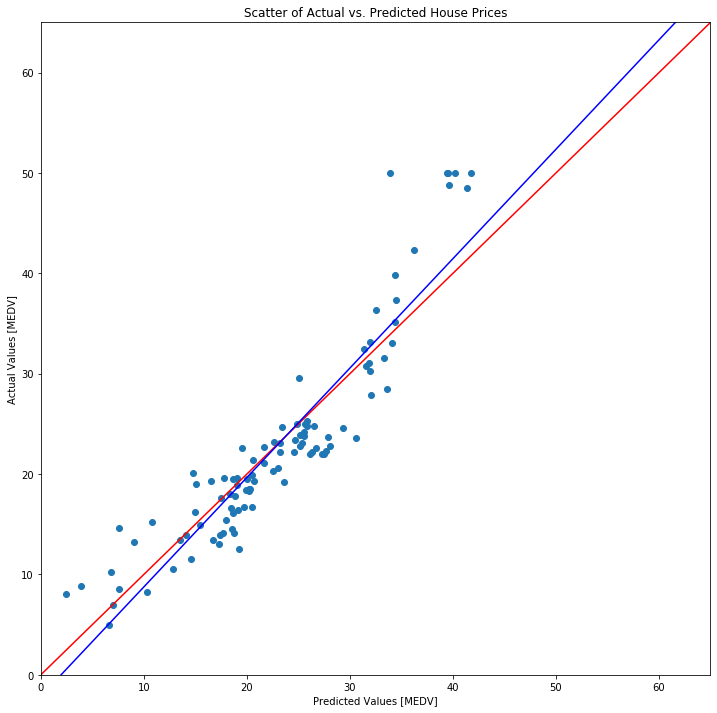

101/101 [==============================] - 0s 970us/sample - loss: 16.9350 - mean_squared_error: 16.9350 - mean_absolute_error: 3.0832
The r-squared value for this evaluation is:  0.842
The slope of the line in this evaluation is:  1.09
The y-intercept in this evaluation is;  -2.143
Loss:  16.935025394553005
Mean squared error:  16.935024
Mean absolute error:  3.0831854


In [48]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_2)

Note that the $r^2$ value is lower that for the sigmoid function - the correlation between the predicted values and actual values is not as good. We can also see that the points are quite scattered and that the mean absolute error is about $3,000, it is not performing as well as the sigmoid function. Next we will consider the tanh function.

#### The hyperbolic tan activation function

As before we will create, compile and build the model, this time using the tanh activation function.

In [57]:
# build the model
model_3 = build_model(64,'tanh',2,train_dataset)
# compile the model define the loss function and optimiser
model_3.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_3.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 793us/sample - loss: 574.2392 - mean_squared_error: 574.2391 - mean_absolute_error: 22.3618
Epoch 2/1000
405/405 [==============================] - 0s 103us/sample - loss: 544.6928 - mean_squared_error: 544.6928 - mean_absolute_error: 22.0240
Epoch 3/1000
405/405 [==============================] - 0s 126us/sample - loss: 514.0703 - mean_squared_error: 514.0703 - mean_absolute_error: 21.5277
Epoch 4/1000
405/405 [==============================] - 0s 100us/sample - loss: 483.7117 - mean_squared_error: 483.7117 - mean_absolute_error: 20.8969
Epoch 5/1000
405/405 [==============================] - 0s 90us/sample - loss: 452.7435 - mean_squared_error: 452.7435 - mean_absolute_error: 20.1796
Epoch 6/1000
405/405 [==============================] - 0s 97us/sample - loss: 419.2906 - mean_squared_error: 419.2906 - mean_absolute_error: 19.3229
Epoch 7/1000
405/405 [==============================] - 0s 90us/sample - loss: 380.4797 - mean_s

405/405 [==============================] - 0s 107us/sample - loss: 25.2403 - mean_squared_error: 25.2403 - mean_absolute_error: 3.2393
Epoch 56/1000
405/405 [==============================] - 0s 107us/sample - loss: 24.5465 - mean_squared_error: 24.5465 - mean_absolute_error: 3.1910
Epoch 57/1000
405/405 [==============================] - 0s 88us/sample - loss: 24.0961 - mean_squared_error: 24.0961 - mean_absolute_error: 3.1432
Epoch 58/1000
405/405 [==============================] - 0s 79us/sample - loss: 23.7098 - mean_squared_error: 23.7098 - mean_absolute_error: 3.1381
Epoch 59/1000
405/405 [==============================] - 0s 89us/sample - loss: 23.1632 - mean_squared_error: 23.1632 - mean_absolute_error: 3.1061
Epoch 60/1000
405/405 [==============================] - 0s 78us/sample - loss: 22.7186 - mean_squared_error: 22.7186 - mean_absolute_error: 3.0718
Epoch 61/1000
405/405 [==============================] - 0s 88us/sample - loss: 22.3241 - mean_squared_error: 22.3241 - mean

405/405 [==============================] - 0s 99us/sample - loss: 10.7287 - mean_squared_error: 10.7287 - mean_absolute_error: 2.2691
Epoch 111/1000
405/405 [==============================] - 0s 98us/sample - loss: 10.6773 - mean_squared_error: 10.6773 - mean_absolute_error: 2.2774
Epoch 112/1000
405/405 [==============================] - 0s 91us/sample - loss: 10.5141 - mean_squared_error: 10.5141 - mean_absolute_error: 2.2438
Epoch 113/1000
405/405 [==============================] - 0s 83us/sample - loss: 10.3179 - mean_squared_error: 10.3179 - mean_absolute_error: 2.2294
Epoch 114/1000
405/405 [==============================] - 0s 79us/sample - loss: 10.2450 - mean_squared_error: 10.2450 - mean_absolute_error: 2.2221
Epoch 115/1000
405/405 [==============================] - 0s 83us/sample - loss: 10.1905 - mean_squared_error: 10.1905 - mean_absolute_error: 2.2001
Epoch 116/1000
405/405 [==============================] - 0s 76us/sample - loss: 10.2290 - mean_squared_error: 10.2290 - 

405/405 [==============================] - 0s 71us/sample - loss: 7.0085 - mean_squared_error: 7.0085 - mean_absolute_error: 1.8879
Epoch 166/1000
405/405 [==============================] - 0s 71us/sample - loss: 6.6702 - mean_squared_error: 6.6702 - mean_absolute_error: 1.8046
Epoch 167/1000
405/405 [==============================] - 0s 78us/sample - loss: 6.6257 - mean_squared_error: 6.6257 - mean_absolute_error: 1.8076
Epoch 168/1000
405/405 [==============================] - 0s 76us/sample - loss: 6.6415 - mean_squared_error: 6.6415 - mean_absolute_error: 1.8230
Epoch 169/1000
405/405 [==============================] - 0s 64us/sample - loss: 6.5899 - mean_squared_error: 6.5899 - mean_absolute_error: 1.8100
Epoch 170/1000
405/405 [==============================] - 0s 66us/sample - loss: 6.4444 - mean_squared_error: 6.4444 - mean_absolute_error: 1.7932
Epoch 171/1000
405/405 [==============================] - 0s 65us/sample - loss: 6.3901 - mean_squared_error: 6.3901 - mean_absolute_

405/405 [==============================] - 0s 83us/sample - loss: 4.7149 - mean_squared_error: 4.7149 - mean_absolute_error: 1.5526
Epoch 221/1000
405/405 [==============================] - 0s 90us/sample - loss: 4.5370 - mean_squared_error: 4.5370 - mean_absolute_error: 1.5279
Epoch 222/1000
405/405 [==============================] - 0s 92us/sample - loss: 4.6219 - mean_squared_error: 4.6219 - mean_absolute_error: 1.5234
Epoch 223/1000
405/405 [==============================] - 0s 86us/sample - loss: 4.7745 - mean_squared_error: 4.7745 - mean_absolute_error: 1.5754
Epoch 224/1000
405/405 [==============================] - 0s 94us/sample - loss: 4.6522 - mean_squared_error: 4.6522 - mean_absolute_error: 1.5366
Epoch 225/1000
405/405 [==============================] - 0s 85us/sample - loss: 4.6360 - mean_squared_error: 4.6360 - mean_absolute_error: 1.5652
Epoch 226/1000
405/405 [==============================] - 0s 76us/sample - loss: 4.4301 - mean_squared_error: 4.4301 - mean_absolute_

405/405 [==============================] - 0s 89us/sample - loss: 3.3458 - mean_squared_error: 3.3458 - mean_absolute_error: 1.2990
Epoch 276/1000
405/405 [==============================] - 0s 70us/sample - loss: 3.4047 - mean_squared_error: 3.4047 - mean_absolute_error: 1.3248
Epoch 277/1000
405/405 [==============================] - 0s 68us/sample - loss: 3.4714 - mean_squared_error: 3.4714 - mean_absolute_error: 1.3333
Epoch 278/1000
405/405 [==============================] - 0s 85us/sample - loss: 3.4043 - mean_squared_error: 3.4043 - mean_absolute_error: 1.3270
Epoch 279/1000
405/405 [==============================] - 0s 99us/sample - loss: 3.4833 - mean_squared_error: 3.4833 - mean_absolute_error: 1.3593
Epoch 280/1000
405/405 [==============================] - 0s 100us/sample - loss: 3.3488 - mean_squared_error: 3.3488 - mean_absolute_error: 1.3034
Epoch 281/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.2422 - mean_squared_error: 3.2422 - mean_absolute

405/405 [==============================] - 0s 90us/sample - loss: 2.5221 - mean_squared_error: 2.5221 - mean_absolute_error: 1.1384
Epoch 331/1000
405/405 [==============================] - 0s 82us/sample - loss: 2.5059 - mean_squared_error: 2.5059 - mean_absolute_error: 1.1359
Epoch 332/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.4101 - mean_squared_error: 2.4101 - mean_absolute_error: 1.1032
Epoch 333/1000
405/405 [==============================] - 0s 89us/sample - loss: 2.4320 - mean_squared_error: 2.4320 - mean_absolute_error: 1.1164
Epoch 334/1000
405/405 [==============================] - 0s 95us/sample - loss: 2.4780 - mean_squared_error: 2.4780 - mean_absolute_error: 1.1192
Epoch 335/1000
405/405 [==============================] - 0s 91us/sample - loss: 2.4813 - mean_squared_error: 2.4813 - mean_absolute_error: 1.1287
Epoch 336/1000
405/405 [==============================] - 0s 101us/sample - loss: 2.4240 - mean_squared_error: 2.4240 - mean_absolute

405/405 [==============================] - 0s 82us/sample - loss: 1.8372 - mean_squared_error: 1.8372 - mean_absolute_error: 0.9584
Epoch 386/1000
405/405 [==============================] - 0s 104us/sample - loss: 1.8903 - mean_squared_error: 1.8903 - mean_absolute_error: 0.9783
Epoch 387/1000
405/405 [==============================] - 0s 87us/sample - loss: 1.9897 - mean_squared_error: 1.9897 - mean_absolute_error: 1.0078
Epoch 388/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.8473 - mean_squared_error: 1.8473 - mean_absolute_error: 0.9607
Epoch 389/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.8452 - mean_squared_error: 1.8452 - mean_absolute_error: 0.9678
Epoch 390/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.0895 - mean_squared_error: 2.0895 - mean_absolute_error: 1.0406
Epoch 391/1000
405/405 [==============================] - 0s 63us/sample - loss: 1.8743 - mean_squared_error: 1.8743 - mean_absolute

405/405 [==============================] - 0s 70us/sample - loss: 1.4696 - mean_squared_error: 1.4696 - mean_absolute_error: 0.8568
Epoch 441/1000
405/405 [==============================] - 0s 73us/sample - loss: 1.4865 - mean_squared_error: 1.4865 - mean_absolute_error: 0.8615
Epoch 442/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.4270 - mean_squared_error: 1.4270 - mean_absolute_error: 0.8457
Epoch 443/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.4421 - mean_squared_error: 1.4421 - mean_absolute_error: 0.8674
Epoch 444/1000
405/405 [==============================] - 0s 73us/sample - loss: 1.4178 - mean_squared_error: 1.4178 - mean_absolute_error: 0.8409
Epoch 445/1000
405/405 [==============================] - 0s 73us/sample - loss: 1.4379 - mean_squared_error: 1.4379 - mean_absolute_error: 0.8516
Epoch 446/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.4848 - mean_squared_error: 1.4848 - mean_absolute_

405/405 [==============================] - 0s 74us/sample - loss: 1.1407 - mean_squared_error: 1.1407 - mean_absolute_error: 0.7468
Epoch 496/1000
405/405 [==============================] - 0s 88us/sample - loss: 1.1683 - mean_squared_error: 1.1683 - mean_absolute_error: 0.7633
Epoch 497/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.1455 - mean_squared_error: 1.1455 - mean_absolute_error: 0.7509
Epoch 498/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.1490 - mean_squared_error: 1.1490 - mean_absolute_error: 0.7567
Epoch 499/1000
405/405 [==============================] - 0s 71us/sample - loss: 1.1146 - mean_squared_error: 1.1146 - mean_absolute_error: 0.7373
Epoch 500/1000
405/405 [==============================] - 0s 80us/sample - loss: 1.0792 - mean_squared_error: 1.0792 - mean_absolute_error: 0.7181
Epoch 501/1000
405/405 [==============================] - 0s 75us/sample - loss: 1.1119 - mean_squared_error: 1.1119 - mean_absolute_

405/405 [==============================] - 0s 68us/sample - loss: 0.9339 - mean_squared_error: 0.9339 - mean_absolute_error: 0.6637
Epoch 551/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.9203 - mean_squared_error: 0.9203 - mean_absolute_error: 0.6635
Epoch 552/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.8727 - mean_squared_error: 0.8727 - mean_absolute_error: 0.6445
Epoch 553/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.9029 - mean_squared_error: 0.9029 - mean_absolute_error: 0.6608
Epoch 554/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.9528 - mean_squared_error: 0.9528 - mean_absolute_error: 0.6918
Epoch 555/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.9502 - mean_squared_error: 0.9502 - mean_absolute_error: 0.6848
Epoch 556/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.9046 - mean_squared_error: 0.9046 - mean_absolute_

405/405 [==============================] - 0s 75us/sample - loss: 0.7403 - mean_squared_error: 0.7403 - mean_absolute_error: 0.5977
Epoch 606/1000
405/405 [==============================] - 0s 83us/sample - loss: 0.7435 - mean_squared_error: 0.7435 - mean_absolute_error: 0.6044
Epoch 607/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.7148 - mean_squared_error: 0.7148 - mean_absolute_error: 0.5838
Epoch 608/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.7333 - mean_squared_error: 0.7333 - mean_absolute_error: 0.5976
Epoch 609/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.7427 - mean_squared_error: 0.7427 - mean_absolute_error: 0.6043
Epoch 610/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.7553 - mean_squared_error: 0.7553 - mean_absolute_error: 0.5982
Epoch 611/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.8050 - mean_squared_error: 0.8050 - mean_absolute_

405/405 [==============================] - 0s 99us/sample - loss: 0.6180 - mean_squared_error: 0.6180 - mean_absolute_error: 0.5303
Epoch 661/1000
405/405 [==============================] - 0s 99us/sample - loss: 0.6122 - mean_squared_error: 0.6122 - mean_absolute_error: 0.5347
Epoch 662/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.5935 - mean_squared_error: 0.5935 - mean_absolute_error: 0.5130
Epoch 663/1000
405/405 [==============================] - 0s 84us/sample - loss: 0.6008 - mean_squared_error: 0.6008 - mean_absolute_error: 0.5302
Epoch 664/1000
405/405 [==============================] - 0s 78us/sample - loss: 0.6218 - mean_squared_error: 0.6218 - mean_absolute_error: 0.5526
Epoch 665/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.6429 - mean_squared_error: 0.6429 - mean_absolute_error: 0.5579
Epoch 666/1000
405/405 [==============================] - 0s 90us/sample - loss: 0.6150 - mean_squared_error: 0.6150 - mean_absolute_

405/405 [==============================] - 0s 99us/sample - loss: 0.4802 - mean_squared_error: 0.4802 - mean_absolute_error: 0.4702
Epoch 716/1000
405/405 [==============================] - 0s 102us/sample - loss: 0.4953 - mean_squared_error: 0.4953 - mean_absolute_error: 0.4908
Epoch 717/1000
405/405 [==============================] - 0s 99us/sample - loss: 0.5021 - mean_squared_error: 0.5021 - mean_absolute_error: 0.4876
Epoch 718/1000
405/405 [==============================] - 0s 91us/sample - loss: 0.5140 - mean_squared_error: 0.5140 - mean_absolute_error: 0.5042
Epoch 719/1000
405/405 [==============================] - 0s 73us/sample - loss: 0.5124 - mean_squared_error: 0.5124 - mean_absolute_error: 0.4994
Epoch 720/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.4948 - mean_squared_error: 0.4948 - mean_absolute_error: 0.4836
Epoch 721/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.4811 - mean_squared_error: 0.4811 - mean_absolute

405/405 [==============================] - 0s 66us/sample - loss: 0.3890 - mean_squared_error: 0.3890 - mean_absolute_error: 0.4207
Epoch 771/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.4027 - mean_squared_error: 0.4027 - mean_absolute_error: 0.4248
Epoch 772/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.4073 - mean_squared_error: 0.4073 - mean_absolute_error: 0.4379
Epoch 773/1000
405/405 [==============================] - 0s 63us/sample - loss: 0.3936 - mean_squared_error: 0.3936 - mean_absolute_error: 0.4345
Epoch 774/1000
405/405 [==============================] - 0s 67us/sample - loss: 0.3880 - mean_squared_error: 0.3880 - mean_absolute_error: 0.4222
Epoch 775/1000
405/405 [==============================] - 0s 62us/sample - loss: 0.4303 - mean_squared_error: 0.4303 - mean_absolute_error: 0.4632
Epoch 776/1000
405/405 [==============================] - 0s 62us/sample - loss: 0.3992 - mean_squared_error: 0.3992 - mean_absolute_

405/405 [==============================] - 0s 63us/sample - loss: 0.3306 - mean_squared_error: 0.3306 - mean_absolute_error: 0.3945
Epoch 826/1000
405/405 [==============================] - 0s 87us/sample - loss: 0.3167 - mean_squared_error: 0.3167 - mean_absolute_error: 0.3885
Epoch 827/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.3491 - mean_squared_error: 0.3491 - mean_absolute_error: 0.4169
Epoch 828/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.3501 - mean_squared_error: 0.3501 - mean_absolute_error: 0.4240
Epoch 829/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.3355 - mean_squared_error: 0.3355 - mean_absolute_error: 0.4080
Epoch 830/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.3395 - mean_squared_error: 0.3395 - mean_absolute_error: 0.4184
Epoch 831/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.3216 - mean_squared_error: 0.3216 - mean_absolute_

405/405 [==============================] - 0s 64us/sample - loss: 0.2782 - mean_squared_error: 0.2782 - mean_absolute_error: 0.3732
Epoch 881/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.2674 - mean_squared_error: 0.2674 - mean_absolute_error: 0.3625
Epoch 882/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.2698 - mean_squared_error: 0.2698 - mean_absolute_error: 0.3597
Epoch 883/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.2781 - mean_squared_error: 0.2781 - mean_absolute_error: 0.3832
Epoch 884/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.2445 - mean_squared_error: 0.2445 - mean_absolute_error: 0.3428
Epoch 885/1000
405/405 [==============================] - 0s 62us/sample - loss: 0.2466 - mean_squared_error: 0.2466 - mean_absolute_error: 0.3346
Epoch 886/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.2531 - mean_squared_error: 0.2531 - mean_absolute_

405/405 [==============================] - 0s 73us/sample - loss: 0.1894 - mean_squared_error: 0.1894 - mean_absolute_error: 0.2927
Epoch 936/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.1919 - mean_squared_error: 0.1919 - mean_absolute_error: 0.3024
Epoch 937/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.1991 - mean_squared_error: 0.1991 - mean_absolute_error: 0.3062
Epoch 938/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.2077 - mean_squared_error: 0.2077 - mean_absolute_error: 0.3178
Epoch 939/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.2156 - mean_squared_error: 0.2156 - mean_absolute_error: 0.3331
Epoch 940/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.2112 - mean_squared_error: 0.2112 - mean_absolute_error: 0.3196
Epoch 941/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.2086 - mean_squared_error: 0.2086 - mean_absolute_

405/405 [==============================] - 0s 67us/sample - loss: 0.1559 - mean_squared_error: 0.1559 - mean_absolute_error: 0.2740
Epoch 991/1000
405/405 [==============================] - 0s 75us/sample - loss: 0.1549 - mean_squared_error: 0.1549 - mean_absolute_error: 0.2722
Epoch 992/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.1519 - mean_squared_error: 0.1519 - mean_absolute_error: 0.2630
Epoch 993/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.1583 - mean_squared_error: 0.1583 - mean_absolute_error: 0.2768
Epoch 994/1000
405/405 [==============================] - 0s 75us/sample - loss: 0.1393 - mean_squared_error: 0.1393 - mean_absolute_error: 0.2478
Epoch 995/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.1487 - mean_squared_error: 0.1487 - mean_absolute_error: 0.2669
Epoch 996/1000
405/405 [==============================] - 0s 105us/sample - loss: 0.1511 - mean_squared_error: 0.1511 - mean_absolute

The loss was quite low with this activation function - it was down under 1 after approx 600 epochs and continued to drop after that. Again we'll predict the values using the test data and plot these versus the actual values

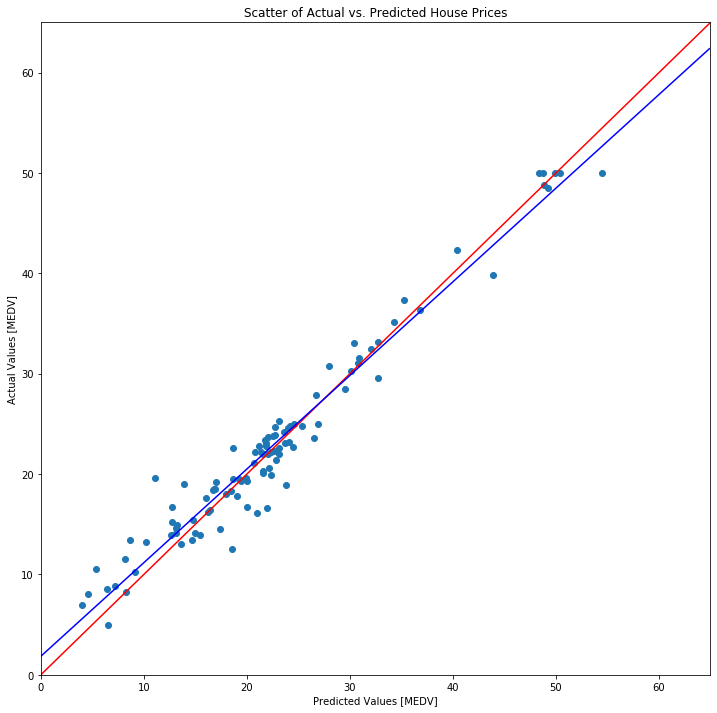

101/101 [==============================] - 0s 1ms/sample - loss: 5.3229 - mean_squared_error: 5.3229 - mean_absolute_error: 1.7019
The r-squared value for this evaluation is:  0.955
The slope of the line in this evaluation is:  0.933
The y-intercept in this evaluation is;  1.845
Loss:  5.322910171924251
Mean squared error:  5.32291
Mean absolute error:  1.7019387


In [59]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_3)

This has performed as well as the sigmoid activation function, with a similar $r^2$ value and similar slope and intercept. This is to be expected as the tanh function and sigmoid function are actually quite similar. The tanh function might prove useful on this dataset as the loss was lower after fewer epochs - this could save some training time. The mean absolute error was quite low for this function so it seems to be predicting quite well. Finally, we can test the relu activation function.

#### The rectified linear unit activation function

Finally we'll trial the rectified linear unit function. We'll follow the same procedure as before.

In [51]:
# build the model
model_4 = build_model(64,'relu',2,train_dataset)
# compile the model define the loss function and optimiser
model_4.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_4.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 633us/sample - loss: 542.9368 - mean_squared_error: 542.9368 - mean_absolute_error: 21.4477
Epoch 2/1000
405/405 [==============================] - 0s 77us/sample - loss: 474.2557 - mean_squared_error: 474.2557 - mean_absolute_error: 19.7825
Epoch 3/1000
405/405 [==============================] - 0s 80us/sample - loss: 387.2295 - mean_squared_error: 387.2295 - mean_absolute_error: 17.5005
Epoch 4/1000
405/405 [==============================] - 0s 93us/sample - loss: 280.8443 - mean_squared_error: 280.8442 - mean_absolute_error: 14.5433
Epoch 5/1000
405/405 [==============================] - 0s 81us/sample - loss: 171.1980 - mean_squared_error: 171.1980 - mean_absolute_error: 10.8521
Epoch 6/1000
405/405 [==============================] - 0s 102us/sample - loss: 99.5556 - mean_squared_error: 99.5556 - mean_absolute_error: 8.0499
Epoch 7/1000
405/405 [==============================] - 0s 78us/sample - loss: 66.4856 - mean_squared

405/405 [==============================] - 0s 176us/sample - loss: 10.8176 - mean_squared_error: 10.8176 - mean_absolute_error: 2.3085
Epoch 57/1000
405/405 [==============================] - 0s 164us/sample - loss: 10.7133 - mean_squared_error: 10.7133 - mean_absolute_error: 2.3126
Epoch 58/1000
405/405 [==============================] - 0s 84us/sample - loss: 10.6802 - mean_squared_error: 10.6802 - mean_absolute_error: 2.2904
Epoch 59/1000
405/405 [==============================] - 0s 91us/sample - loss: 10.5718 - mean_squared_error: 10.5718 - mean_absolute_error: 2.2776
Epoch 60/1000
405/405 [==============================] - 0s 86us/sample - loss: 10.4786 - mean_squared_error: 10.4786 - mean_absolute_error: 2.2849
Epoch 61/1000
405/405 [==============================] - 0s 87us/sample - loss: 10.5035 - mean_squared_error: 10.5035 - mean_absolute_error: 2.2923
Epoch 62/1000
405/405 [==============================] - 0s 96us/sample - loss: 10.4674 - mean_squared_error: 10.4674 - mean

405/405 [==============================] - 0s 109us/sample - loss: 7.1458 - mean_squared_error: 7.1458 - mean_absolute_error: 1.9262
Epoch 112/1000
405/405 [==============================] - 0s 102us/sample - loss: 7.1561 - mean_squared_error: 7.1561 - mean_absolute_error: 1.9540
Epoch 113/1000
405/405 [==============================] - 0s 96us/sample - loss: 7.2153 - mean_squared_error: 7.2153 - mean_absolute_error: 1.9087
Epoch 114/1000
405/405 [==============================] - 0s 126us/sample - loss: 7.1605 - mean_squared_error: 7.1605 - mean_absolute_error: 1.9489
Epoch 115/1000
405/405 [==============================] - 0s 84us/sample - loss: 7.0832 - mean_squared_error: 7.0832 - mean_absolute_error: 1.8970
Epoch 116/1000
405/405 [==============================] - 0s 84us/sample - loss: 6.9800 - mean_squared_error: 6.9800 - mean_absolute_error: 1.9328
Epoch 117/1000
405/405 [==============================] - 0s 88us/sample - loss: 6.9034 - mean_squared_error: 6.9034 - mean_absolu

405/405 [==============================] - 0s 95us/sample - loss: 5.1131 - mean_squared_error: 5.1131 - mean_absolute_error: 1.6314
Epoch 167/1000
405/405 [==============================] - 0s 84us/sample - loss: 5.0679 - mean_squared_error: 5.0679 - mean_absolute_error: 1.5955
Epoch 168/1000
405/405 [==============================] - 0s 83us/sample - loss: 5.1214 - mean_squared_error: 5.1214 - mean_absolute_error: 1.6450
Epoch 169/1000
405/405 [==============================] - 0s 71us/sample - loss: 5.0324 - mean_squared_error: 5.0324 - mean_absolute_error: 1.6004
Epoch 170/1000
405/405 [==============================] - 0s 83us/sample - loss: 4.9679 - mean_squared_error: 4.9679 - mean_absolute_error: 1.6022
Epoch 171/1000
405/405 [==============================] - 0s 83us/sample - loss: 4.8967 - mean_squared_error: 4.8967 - mean_absolute_error: 1.5963
Epoch 172/1000
405/405 [==============================] - 0s 73us/sample - loss: 4.9546 - mean_squared_error: 4.9546 - mean_absolute_

405/405 [==============================] - 0s 76us/sample - loss: 3.8465 - mean_squared_error: 3.8465 - mean_absolute_error: 1.4000
Epoch 222/1000
405/405 [==============================] - 0s 95us/sample - loss: 3.7879 - mean_squared_error: 3.7879 - mean_absolute_error: 1.3828
Epoch 223/1000
405/405 [==============================] - 0s 90us/sample - loss: 3.8110 - mean_squared_error: 3.8110 - mean_absolute_error: 1.3898
Epoch 224/1000
405/405 [==============================] - 0s 86us/sample - loss: 3.9369 - mean_squared_error: 3.9369 - mean_absolute_error: 1.3684
Epoch 225/1000
405/405 [==============================] - 0s 83us/sample - loss: 3.9777 - mean_squared_error: 3.9777 - mean_absolute_error: 1.4279
Epoch 226/1000
405/405 [==============================] - 0s 88us/sample - loss: 3.7818 - mean_squared_error: 3.7818 - mean_absolute_error: 1.3874
Epoch 227/1000
405/405 [==============================] - 0s 80us/sample - loss: 3.7704 - mean_squared_error: 3.7704 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 3.0218 - mean_squared_error: 3.0218 - mean_absolute_error: 1.2162
Epoch 277/1000
405/405 [==============================] - 0s 80us/sample - loss: 3.0422 - mean_squared_error: 3.0422 - mean_absolute_error: 1.2329
Epoch 278/1000
405/405 [==============================] - 0s 88us/sample - loss: 2.9888 - mean_squared_error: 2.9888 - mean_absolute_error: 1.2245
Epoch 279/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.9899 - mean_squared_error: 2.9899 - mean_absolute_error: 1.2054
Epoch 280/1000
405/405 [==============================] - 0s 73us/sample - loss: 3.0058 - mean_squared_error: 3.0058 - mean_absolute_error: 1.2547
Epoch 281/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.8907 - mean_squared_error: 2.8907 - mean_absolute_error: 1.2036
Epoch 282/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.8453 - mean_squared_error: 2.8453 - mean_absolute_

405/405 [==============================] - 0s 99us/sample - loss: 2.3724 - mean_squared_error: 2.3724 - mean_absolute_error: 1.0791
Epoch 332/1000
405/405 [==============================] - 0s 98us/sample - loss: 2.3303 - mean_squared_error: 2.3303 - mean_absolute_error: 1.0657
Epoch 333/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.2445 - mean_squared_error: 2.2445 - mean_absolute_error: 1.0470
Epoch 334/1000
405/405 [==============================] - 0s 75us/sample - loss: 2.2824 - mean_squared_error: 2.2824 - mean_absolute_error: 1.0495
Epoch 335/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.2844 - mean_squared_error: 2.2844 - mean_absolute_error: 1.0556
Epoch 336/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.2508 - mean_squared_error: 2.2508 - mean_absolute_error: 1.0261
Epoch 337/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.2814 - mean_squared_error: 2.2814 - mean_absolute_

405/405 [==============================] - 0s 96us/sample - loss: 1.7686 - mean_squared_error: 1.7686 - mean_absolute_error: 0.9332
Epoch 386/1000
405/405 [==============================] - 0s 98us/sample - loss: 1.8125 - mean_squared_error: 1.8125 - mean_absolute_error: 0.9558
Epoch 387/1000
405/405 [==============================] - 0s 104us/sample - loss: 1.8012 - mean_squared_error: 1.8012 - mean_absolute_error: 0.9348
Epoch 388/1000
405/405 [==============================] - 0s 93us/sample - loss: 1.7871 - mean_squared_error: 1.7871 - mean_absolute_error: 0.9436
Epoch 389/1000
405/405 [==============================] - 0s 93us/sample - loss: 1.7558 - mean_squared_error: 1.7558 - mean_absolute_error: 0.9253
Epoch 390/1000
405/405 [==============================] - 0s 87us/sample - loss: 1.7425 - mean_squared_error: 1.7425 - mean_absolute_error: 0.9285
Epoch 391/1000
405/405 [==============================] - 0s 111us/sample - loss: 1.7185 - mean_squared_error: 1.7185 - mean_absolut

405/405 [==============================] - 0s 78us/sample - loss: 1.4395 - mean_squared_error: 1.4395 - mean_absolute_error: 0.8654
Epoch 441/1000
405/405 [==============================] - 0s 93us/sample - loss: 1.3597 - mean_squared_error: 1.3597 - mean_absolute_error: 0.8194
Epoch 442/1000
405/405 [==============================] - 0s 90us/sample - loss: 1.4450 - mean_squared_error: 1.4450 - mean_absolute_error: 0.8512
Epoch 443/1000
405/405 [==============================] - 0s 90us/sample - loss: 1.4153 - mean_squared_error: 1.4153 - mean_absolute_error: 0.8277
Epoch 444/1000
405/405 [==============================] - 0s 80us/sample - loss: 1.4438 - mean_squared_error: 1.4438 - mean_absolute_error: 0.8528
Epoch 445/1000
405/405 [==============================] - 0s 79us/sample - loss: 1.2953 - mean_squared_error: 1.2953 - mean_absolute_error: 0.7948
Epoch 446/1000
405/405 [==============================] - 0s 72us/sample - loss: 1.4296 - mean_squared_error: 1.4296 - mean_absolute_

405/405 [==============================] - 0s 78us/sample - loss: 1.1116 - mean_squared_error: 1.1116 - mean_absolute_error: 0.7458
Epoch 496/1000
405/405 [==============================] - 0s 84us/sample - loss: 1.0891 - mean_squared_error: 1.0891 - mean_absolute_error: 0.7269
Epoch 497/1000
405/405 [==============================] - 0s 79us/sample - loss: 1.0987 - mean_squared_error: 1.0987 - mean_absolute_error: 0.7377
Epoch 498/1000
405/405 [==============================] - 0s 90us/sample - loss: 1.1064 - mean_squared_error: 1.1064 - mean_absolute_error: 0.7309
Epoch 499/1000
405/405 [==============================] - 0s 90us/sample - loss: 1.0463 - mean_squared_error: 1.0463 - mean_absolute_error: 0.7113
Epoch 500/1000
405/405 [==============================] - 0s 93us/sample - loss: 1.0493 - mean_squared_error: 1.0493 - mean_absolute_error: 0.7338
Epoch 501/1000
405/405 [==============================] - 0s 85us/sample - loss: 1.0271 - mean_squared_error: 1.0271 - mean_absolute_

405/405 [==============================] - 0s 71us/sample - loss: 0.9202 - mean_squared_error: 0.9202 - mean_absolute_error: 0.6840
Epoch 551/1000
405/405 [==============================] - 0s 67us/sample - loss: 1.0396 - mean_squared_error: 1.0396 - mean_absolute_error: 0.7206
Epoch 552/1000
405/405 [==============================] - 0s 63us/sample - loss: 0.9481 - mean_squared_error: 0.9481 - mean_absolute_error: 0.7072
Epoch 553/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.9139 - mean_squared_error: 0.9139 - mean_absolute_error: 0.6606
Epoch 554/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.8794 - mean_squared_error: 0.8794 - mean_absolute_error: 0.6555
Epoch 555/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.8913 - mean_squared_error: 0.8913 - mean_absolute_error: 0.6600
Epoch 556/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.8601 - mean_squared_error: 0.8601 - mean_absolute_

405/405 [==============================] - 0s 68us/sample - loss: 0.7339 - mean_squared_error: 0.7339 - mean_absolute_error: 0.6065
Epoch 606/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.7583 - mean_squared_error: 0.7583 - mean_absolute_error: 0.6100
Epoch 607/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.7295 - mean_squared_error: 0.7295 - mean_absolute_error: 0.5996
Epoch 608/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.8698 - mean_squared_error: 0.8698 - mean_absolute_error: 0.6757
Epoch 609/1000
405/405 [==============================] - 0s 92us/sample - loss: 0.7659 - mean_squared_error: 0.7659 - mean_absolute_error: 0.6089
Epoch 610/1000
405/405 [==============================] - 0s 88us/sample - loss: 0.7228 - mean_squared_error: 0.7228 - mean_absolute_error: 0.5790
Epoch 611/1000
405/405 [==============================] - 0s 78us/sample - loss: 0.7604 - mean_squared_error: 0.7604 - mean_absolute_

405/405 [==============================] - 0s 71us/sample - loss: 0.7142 - mean_squared_error: 0.7142 - mean_absolute_error: 0.5974
Epoch 661/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.6744 - mean_squared_error: 0.6744 - mean_absolute_error: 0.5647
Epoch 662/1000
405/405 [==============================] - 0s 90us/sample - loss: 0.6659 - mean_squared_error: 0.6659 - mean_absolute_error: 0.5858
Epoch 663/1000
405/405 [==============================] - 0s 84us/sample - loss: 0.6295 - mean_squared_error: 0.6295 - mean_absolute_error: 0.5506
Epoch 664/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.6126 - mean_squared_error: 0.6126 - mean_absolute_error: 0.5449
Epoch 665/1000
405/405 [==============================] - 0s 83us/sample - loss: 0.6241 - mean_squared_error: 0.6241 - mean_absolute_error: 0.5451
Epoch 666/1000
405/405 [==============================] - 0s 74us/sample - loss: 0.6034 - mean_squared_error: 0.6034 - mean_absolute_

405/405 [==============================] - 0s 68us/sample - loss: 0.5864 - mean_squared_error: 0.5864 - mean_absolute_error: 0.5463
Epoch 716/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.5628 - mean_squared_error: 0.5628 - mean_absolute_error: 0.5237
Epoch 717/1000
405/405 [==============================] - 0s 67us/sample - loss: 0.6295 - mean_squared_error: 0.6295 - mean_absolute_error: 0.5814
Epoch 718/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.6520 - mean_squared_error: 0.6520 - mean_absolute_error: 0.5847
Epoch 719/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.5827 - mean_squared_error: 0.5827 - mean_absolute_error: 0.5268
Epoch 720/1000
405/405 [==============================] - 0s 73us/sample - loss: 0.5730 - mean_squared_error: 0.5730 - mean_absolute_error: 0.5175
Epoch 721/1000
405/405 [==============================] - 0s 73us/sample - loss: 0.5408 - mean_squared_error: 0.5408 - mean_absolute_

405/405 [==============================] - 0s 64us/sample - loss: 0.4369 - mean_squared_error: 0.4369 - mean_absolute_error: 0.4424
Epoch 771/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.4554 - mean_squared_error: 0.4554 - mean_absolute_error: 0.4585
Epoch 772/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.4147 - mean_squared_error: 0.4147 - mean_absolute_error: 0.4367
Epoch 773/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.4266 - mean_squared_error: 0.4266 - mean_absolute_error: 0.4403
Epoch 774/1000
405/405 [==============================] - 0s 73us/sample - loss: 0.4376 - mean_squared_error: 0.4376 - mean_absolute_error: 0.4557
Epoch 775/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.4535 - mean_squared_error: 0.4535 - mean_absolute_error: 0.4523
Epoch 776/1000
405/405 [==============================] - 0s 65us/sample - loss: 0.4166 - mean_squared_error: 0.4166 - mean_absolute_

405/405 [==============================] - 0s 66us/sample - loss: 0.3862 - mean_squared_error: 0.3862 - mean_absolute_error: 0.4263
Epoch 826/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.3615 - mean_squared_error: 0.3615 - mean_absolute_error: 0.4028
Epoch 827/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.3580 - mean_squared_error: 0.3580 - mean_absolute_error: 0.3936
Epoch 828/1000
405/405 [==============================] - 0s 67us/sample - loss: 0.3740 - mean_squared_error: 0.3740 - mean_absolute_error: 0.4119
Epoch 829/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.3534 - mean_squared_error: 0.3534 - mean_absolute_error: 0.3952
Epoch 830/1000
405/405 [==============================] - 0s 66us/sample - loss: 0.4094 - mean_squared_error: 0.4094 - mean_absolute_error: 0.4399
Epoch 831/1000
405/405 [==============================] - 0s 67us/sample - loss: 0.3944 - mean_squared_error: 0.3944 - mean_absolute_

405/405 [==============================] - 0s 74us/sample - loss: 0.3626 - mean_squared_error: 0.3626 - mean_absolute_error: 0.4170
Epoch 881/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.3304 - mean_squared_error: 0.3304 - mean_absolute_error: 0.3997
Epoch 882/1000
405/405 [==============================] - 0s 67us/sample - loss: 0.3274 - mean_squared_error: 0.3274 - mean_absolute_error: 0.3706
Epoch 883/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.2961 - mean_squared_error: 0.2961 - mean_absolute_error: 0.3588
Epoch 884/1000
405/405 [==============================] - 0s 64us/sample - loss: 0.3155 - mean_squared_error: 0.3155 - mean_absolute_error: 0.3673
Epoch 885/1000
405/405 [==============================] - 0s 70us/sample - loss: 0.3229 - mean_squared_error: 0.3229 - mean_absolute_error: 0.3858
Epoch 886/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.3338 - mean_squared_error: 0.3338 - mean_absolute_

405/405 [==============================] - 0s 71us/sample - loss: 0.2785 - mean_squared_error: 0.2785 - mean_absolute_error: 0.3495
Epoch 936/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.2559 - mean_squared_error: 0.2559 - mean_absolute_error: 0.3357
Epoch 937/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.2912 - mean_squared_error: 0.2912 - mean_absolute_error: 0.3559
Epoch 938/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.3252 - mean_squared_error: 0.3252 - mean_absolute_error: 0.3997
Epoch 939/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.3107 - mean_squared_error: 0.3107 - mean_absolute_error: 0.3889
Epoch 940/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.3079 - mean_squared_error: 0.3079 - mean_absolute_error: 0.3934
Epoch 941/1000
405/405 [==============================] - 0s 69us/sample - loss: 0.3097 - mean_squared_error: 0.3097 - mean_absolute_

405/405 [==============================] - 0s 72us/sample - loss: 0.2499 - mean_squared_error: 0.2499 - mean_absolute_error: 0.3333
Epoch 991/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.2492 - mean_squared_error: 0.2492 - mean_absolute_error: 0.3267
Epoch 992/1000
405/405 [==============================] - 0s 68us/sample - loss: 0.2492 - mean_squared_error: 0.2492 - mean_absolute_error: 0.3280
Epoch 993/1000
405/405 [==============================] - 0s 74us/sample - loss: 0.2709 - mean_squared_error: 0.2709 - mean_absolute_error: 0.3697
Epoch 994/1000
405/405 [==============================] - 0s 71us/sample - loss: 0.2892 - mean_squared_error: 0.2892 - mean_absolute_error: 0.3885
Epoch 995/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.2732 - mean_squared_error: 0.2732 - mean_absolute_error: 0.3561
Epoch 996/1000
405/405 [==============================] - 0s 72us/sample - loss: 0.2830 - mean_squared_error: 0.2830 - mean_absolute_

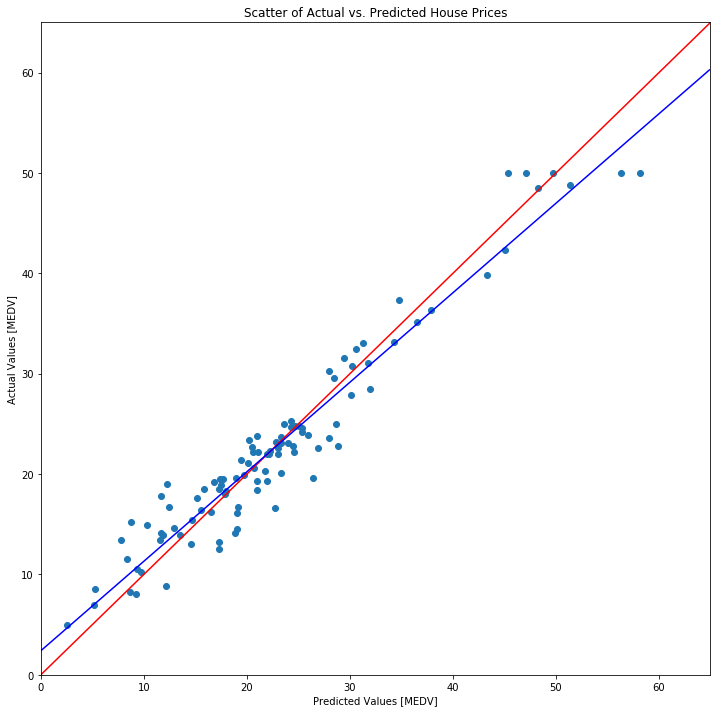

101/101 [==============================] - 0s 1ms/sample - loss: 8.4160 - mean_squared_error: 8.4160 - mean_absolute_error: 2.2528
The r-squared value for this evaluation is:  0.932
The slope of the line in this evaluation is:  0.892
The y-intercept in this evaluation is;  2.396
Loss:  8.415984474786438
Mean squared error:  8.415984
Mean absolute error:  2.2528346


In [52]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_4)

There is a good correlation between the predicted and actual values using this activation function, however the best fit lit is not close to $y = x$. It seems to be better at predicting in the range $20-40,000. It is not as good outside this range. The mean absolute error is not quite as low as for the sigmoid or tanh functions.

#### Activation functions summary

The sigmoid and tanh activation functions provided better predictions that the linear and rectified linear unit function on this test data set. The tanh function was particularly good at reducing the loss function with less epochs.


#### Testing Different Optimisers

In this section we will use the sigmoid activation function from the first model, but we will experiment with some different optimisers. In the original model we used the 'adam' optimiser. There are 2 others that I would like to test:
1. Stochastic Gradient Descent, which was introduced to us during the course lectures
1. RMSprop, which I came across while working though a tensorflow tutorial

As with the activation functions we will rebuild and compile the model using these and determine if these improve the predictions.

#### Stochastic Gradient Descent (SGD)

First we re-build the model using the sigmoid activation function and 'SGD' optimiser. Then we retrain it with the training dataset.

In [53]:
# build the model
model_5 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_5.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mse','mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_5.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 484us/sample - loss: 139.5747 - mean_squared_error: 139.5747 - mean_absolute_error: 8.3550
Epoch 2/1000
405/405 [==============================] - 0s 86us/sample - loss: 63.3176 - mean_squared_error: 63.3176 - mean_absolute_error: 5.7128
Epoch 3/1000
405/405 [==============================] - 0s 71us/sample - loss: 53.0852 - mean_squared_error: 53.0852 - mean_absolute_error: 5.1788
Epoch 4/1000
405/405 [==============================] - 0s 66us/sample - loss: 43.9247 - mean_squared_error: 43.9247 - mean_absolute_error: 4.5565
Epoch 5/1000
405/405 [==============================] - 0s 81us/sample - loss: 38.5216 - mean_squared_error: 38.5216 - mean_absolute_error: 4.2635
Epoch 6/1000
405/405 [==============================] - 0s 81us/sample - loss: 31.1974 - mean_squared_error: 31.1974 - mean_absolute_error: 3.6834
Epoch 7/1000
405/405 [==============================] - 0s 74us/sample - loss: 28.5844 - mean_squared_error: 28.584

405/405 [==============================] - 0s 104us/sample - loss: 12.7001 - mean_squared_error: 12.7001 - mean_absolute_error: 2.5452
Epoch 57/1000
405/405 [==============================] - 0s 104us/sample - loss: 12.3568 - mean_squared_error: 12.3568 - mean_absolute_error: 2.4959
Epoch 58/1000
405/405 [==============================] - 0s 85us/sample - loss: 13.0549 - mean_squared_error: 13.0549 - mean_absolute_error: 2.5843
Epoch 59/1000
405/405 [==============================] - 0s 71us/sample - loss: 12.7549 - mean_squared_error: 12.7549 - mean_absolute_error: 2.5285
Epoch 60/1000
405/405 [==============================] - 0s 74us/sample - loss: 12.3895 - mean_squared_error: 12.3895 - mean_absolute_error: 2.4983
Epoch 61/1000
405/405 [==============================] - 0s 81us/sample - loss: 12.2926 - mean_squared_error: 12.2926 - mean_absolute_error: 2.4877
Epoch 62/1000
405/405 [==============================] - 0s 84us/sample - loss: 12.1183 - mean_squared_error: 12.1183 - mean

405/405 [==============================] - 0s 67us/sample - loss: 8.5308 - mean_squared_error: 8.5308 - mean_absolute_error: 2.1359
Epoch 112/1000
405/405 [==============================] - 0s 66us/sample - loss: 8.6855 - mean_squared_error: 8.6855 - mean_absolute_error: 2.0904
Epoch 113/1000
405/405 [==============================] - 0s 59us/sample - loss: 8.8429 - mean_squared_error: 8.8429 - mean_absolute_error: 2.1866
Epoch 114/1000
405/405 [==============================] - 0s 61us/sample - loss: 8.7378 - mean_squared_error: 8.7378 - mean_absolute_error: 2.1345
Epoch 115/1000
405/405 [==============================] - 0s 64us/sample - loss: 8.4922 - mean_squared_error: 8.4922 - mean_absolute_error: 2.1426
Epoch 116/1000
405/405 [==============================] - 0s 69us/sample - loss: 8.9330 - mean_squared_error: 8.9330 - mean_absolute_error: 2.1907
Epoch 117/1000
405/405 [==============================] - 0s 79us/sample - loss: 8.5781 - mean_squared_error: 8.5781 - mean_absolute_

405/405 [==============================] - 0s 74us/sample - loss: 6.9040 - mean_squared_error: 6.9040 - mean_absolute_error: 1.9767
Epoch 167/1000
405/405 [==============================] - 0s 77us/sample - loss: 6.9391 - mean_squared_error: 6.9391 - mean_absolute_error: 1.9477
Epoch 168/1000
405/405 [==============================] - 0s 63us/sample - loss: 6.8987 - mean_squared_error: 6.8987 - mean_absolute_error: 1.9301
Epoch 169/1000
405/405 [==============================] - 0s 62us/sample - loss: 7.2720 - mean_squared_error: 7.2720 - mean_absolute_error: 2.0080
Epoch 170/1000
405/405 [==============================] - 0s 60us/sample - loss: 7.2762 - mean_squared_error: 7.2762 - mean_absolute_error: 1.9731
Epoch 171/1000
405/405 [==============================] - 0s 60us/sample - loss: 6.8403 - mean_squared_error: 6.8403 - mean_absolute_error: 1.9575
Epoch 172/1000
405/405 [==============================] - 0s 66us/sample - loss: 6.8844 - mean_squared_error: 6.8844 - mean_absolute_

405/405 [==============================] - 0s 61us/sample - loss: 5.7603 - mean_squared_error: 5.7603 - mean_absolute_error: 1.7605
Epoch 222/1000
405/405 [==============================] - 0s 64us/sample - loss: 5.9017 - mean_squared_error: 5.9017 - mean_absolute_error: 1.8133
Epoch 223/1000
405/405 [==============================] - 0s 63us/sample - loss: 5.9192 - mean_squared_error: 5.9192 - mean_absolute_error: 1.7924
Epoch 224/1000
405/405 [==============================] - 0s 65us/sample - loss: 5.8071 - mean_squared_error: 5.8071 - mean_absolute_error: 1.7960
Epoch 225/1000
405/405 [==============================] - 0s 63us/sample - loss: 5.8480 - mean_squared_error: 5.8480 - mean_absolute_error: 1.8190
Epoch 226/1000
405/405 [==============================] - 0s 63us/sample - loss: 5.8763 - mean_squared_error: 5.8763 - mean_absolute_error: 1.7767
Epoch 227/1000
405/405 [==============================] - 0s 62us/sample - loss: 6.0301 - mean_squared_error: 6.0301 - mean_absolute_

405/405 [==============================] - 0s 102us/sample - loss: 4.9149 - mean_squared_error: 4.9149 - mean_absolute_error: 1.6159
Epoch 277/1000
405/405 [==============================] - 0s 112us/sample - loss: 5.0363 - mean_squared_error: 5.0363 - mean_absolute_error: 1.6280
Epoch 278/1000
405/405 [==============================] - 0s 60us/sample - loss: 5.6965 - mean_squared_error: 5.6965 - mean_absolute_error: 1.7660
Epoch 279/1000
405/405 [==============================] - 0s 67us/sample - loss: 5.1229 - mean_squared_error: 5.1229 - mean_absolute_error: 1.6521
Epoch 280/1000
405/405 [==============================] - 0s 62us/sample - loss: 4.8383 - mean_squared_error: 4.8383 - mean_absolute_error: 1.6419
Epoch 281/1000
405/405 [==============================] - 0s 64us/sample - loss: 4.9315 - mean_squared_error: 4.9315 - mean_absolute_error: 1.6289
Epoch 282/1000
405/405 [==============================] - 0s 57us/sample - loss: 4.7809 - mean_squared_error: 4.7809 - mean_absolut

405/405 [==============================] - 0s 70us/sample - loss: 4.3857 - mean_squared_error: 4.3857 - mean_absolute_error: 1.5375
Epoch 332/1000
405/405 [==============================] - 0s 68us/sample - loss: 4.2800 - mean_squared_error: 4.2800 - mean_absolute_error: 1.5056
Epoch 333/1000
405/405 [==============================] - 0s 62us/sample - loss: 4.3575 - mean_squared_error: 4.3575 - mean_absolute_error: 1.5327
Epoch 334/1000
405/405 [==============================] - 0s 64us/sample - loss: 4.3666 - mean_squared_error: 4.3666 - mean_absolute_error: 1.5358
Epoch 335/1000
405/405 [==============================] - 0s 61us/sample - loss: 4.2140 - mean_squared_error: 4.2140 - mean_absolute_error: 1.5360
Epoch 336/1000
405/405 [==============================] - 0s 62us/sample - loss: 4.4956 - mean_squared_error: 4.4956 - mean_absolute_error: 1.5540
Epoch 337/1000
405/405 [==============================] - 0s 75us/sample - loss: 4.3149 - mean_squared_error: 4.3149 - mean_absolute_

405/405 [==============================] - 0s 67us/sample - loss: 3.8514 - mean_squared_error: 3.8514 - mean_absolute_error: 1.4353
Epoch 387/1000
405/405 [==============================] - 0s 70us/sample - loss: 3.7887 - mean_squared_error: 3.7887 - mean_absolute_error: 1.4419
Epoch 388/1000
405/405 [==============================] - 0s 65us/sample - loss: 3.9113 - mean_squared_error: 3.9113 - mean_absolute_error: 1.4586
Epoch 389/1000
405/405 [==============================] - 0s 62us/sample - loss: 3.8847 - mean_squared_error: 3.8847 - mean_absolute_error: 1.4626
Epoch 390/1000
405/405 [==============================] - 0s 62us/sample - loss: 3.8997 - mean_squared_error: 3.8997 - mean_absolute_error: 1.4623
Epoch 391/1000
405/405 [==============================] - 0s 62us/sample - loss: 3.9363 - mean_squared_error: 3.9363 - mean_absolute_error: 1.4593
Epoch 392/1000
405/405 [==============================] - 0s 61us/sample - loss: 3.9035 - mean_squared_error: 3.9035 - mean_absolute_

405/405 [==============================] - 0s 86us/sample - loss: 3.6088 - mean_squared_error: 3.6089 - mean_absolute_error: 1.4114
Epoch 442/1000
405/405 [==============================] - 0s 86us/sample - loss: 3.5631 - mean_squared_error: 3.5631 - mean_absolute_error: 1.3857
Epoch 443/1000
405/405 [==============================] - 0s 78us/sample - loss: 3.4230 - mean_squared_error: 3.4230 - mean_absolute_error: 1.3675
Epoch 444/1000
405/405 [==============================] - 0s 79us/sample - loss: 3.5819 - mean_squared_error: 3.5819 - mean_absolute_error: 1.3738
Epoch 445/1000
405/405 [==============================] - 0s 81us/sample - loss: 3.4690 - mean_squared_error: 3.4690 - mean_absolute_error: 1.3746
Epoch 446/1000
405/405 [==============================] - 0s 80us/sample - loss: 3.7633 - mean_squared_error: 3.7633 - mean_absolute_error: 1.4444
Epoch 447/1000
405/405 [==============================] - 0s 72us/sample - loss: 3.4163 - mean_squared_error: 3.4163 - mean_absolute_

405/405 [==============================] - 0s 65us/sample - loss: 3.1213 - mean_squared_error: 3.1213 - mean_absolute_error: 1.3073
Epoch 497/1000
405/405 [==============================] - 0s 67us/sample - loss: 3.1152 - mean_squared_error: 3.1152 - mean_absolute_error: 1.2996
Epoch 498/1000
405/405 [==============================] - 0s 63us/sample - loss: 3.0433 - mean_squared_error: 3.0433 - mean_absolute_error: 1.2878
Epoch 499/1000
405/405 [==============================] - 0s 61us/sample - loss: 3.2036 - mean_squared_error: 3.2036 - mean_absolute_error: 1.3204
Epoch 500/1000
405/405 [==============================] - 0s 65us/sample - loss: 3.0207 - mean_squared_error: 3.0207 - mean_absolute_error: 1.2742
Epoch 501/1000
405/405 [==============================] - 0s 64us/sample - loss: 3.0027 - mean_squared_error: 3.0027 - mean_absolute_error: 1.2688
Epoch 502/1000
405/405 [==============================] - 0s 64us/sample - loss: 3.4087 - mean_squared_error: 3.4087 - mean_absolute_

405/405 [==============================] - 0s 63us/sample - loss: 2.8079 - mean_squared_error: 2.8079 - mean_absolute_error: 1.2384
Epoch 552/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.7833 - mean_squared_error: 2.7833 - mean_absolute_error: 1.2144
Epoch 553/1000
405/405 [==============================] - 0s 61us/sample - loss: 2.7372 - mean_squared_error: 2.7372 - mean_absolute_error: 1.2163
Epoch 554/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.7772 - mean_squared_error: 2.7772 - mean_absolute_error: 1.2215
Epoch 555/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.7665 - mean_squared_error: 2.7665 - mean_absolute_error: 1.2288
Epoch 556/1000
405/405 [==============================] - 0s 70us/sample - loss: 2.9395 - mean_squared_error: 2.9395 - mean_absolute_error: 1.2681
Epoch 557/1000
405/405 [==============================] - 0s 83us/sample - loss: 2.8706 - mean_squared_error: 2.8706 - mean_absolute_

405/405 [==============================] - 0s 102us/sample - loss: 2.4874 - mean_squared_error: 2.4874 - mean_absolute_error: 1.1416
Epoch 607/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.5907 - mean_squared_error: 2.5907 - mean_absolute_error: 1.1900
Epoch 608/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.4801 - mean_squared_error: 2.4801 - mean_absolute_error: 1.1519
Epoch 609/1000
405/405 [==============================] - 0s 97us/sample - loss: 2.4640 - mean_squared_error: 2.4640 - mean_absolute_error: 1.1533
Epoch 610/1000
405/405 [==============================] - 0s 84us/sample - loss: 2.4522 - mean_squared_error: 2.4522 - mean_absolute_error: 1.1330
Epoch 611/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.6343 - mean_squared_error: 2.6343 - mean_absolute_error: 1.1813
Epoch 612/1000
405/405 [==============================] - 0s 69us/sample - loss: 2.5142 - mean_squared_error: 2.5142 - mean_absolut

405/405 [==============================] - 0s 81us/sample - loss: 2.3657 - mean_squared_error: 2.3657 - mean_absolute_error: 1.1375
Epoch 662/1000
405/405 [==============================] - 0s 102us/sample - loss: 2.4065 - mean_squared_error: 2.4065 - mean_absolute_error: 1.1327
Epoch 663/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.3196 - mean_squared_error: 2.3196 - mean_absolute_error: 1.1196
Epoch 664/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.4056 - mean_squared_error: 2.4056 - mean_absolute_error: 1.1335
Epoch 665/1000
405/405 [==============================] - 0s 69us/sample - loss: 2.5590 - mean_squared_error: 2.5590 - mean_absolute_error: 1.1791
Epoch 666/1000
405/405 [==============================] - 0s 68us/sample - loss: 2.3226 - mean_squared_error: 2.3226 - mean_absolute_error: 1.1064
Epoch 667/1000
405/405 [==============================] - 0s 75us/sample - loss: 2.2623 - mean_squared_error: 2.2623 - mean_absolute

405/405 [==============================] - 0s 65us/sample - loss: 2.1079 - mean_squared_error: 2.1079 - mean_absolute_error: 1.0831
Epoch 717/1000
405/405 [==============================] - 0s 68us/sample - loss: 2.2347 - mean_squared_error: 2.2347 - mean_absolute_error: 1.0975
Epoch 718/1000
405/405 [==============================] - 0s 65us/sample - loss: 2.1515 - mean_squared_error: 2.1515 - mean_absolute_error: 1.0678
Epoch 719/1000
405/405 [==============================] - 0s 62us/sample - loss: 2.1786 - mean_squared_error: 2.1786 - mean_absolute_error: 1.0907
Epoch 720/1000
405/405 [==============================] - 0s 65us/sample - loss: 2.2279 - mean_squared_error: 2.2279 - mean_absolute_error: 1.0866
Epoch 721/1000
405/405 [==============================] - 0s 64us/sample - loss: 2.1101 - mean_squared_error: 2.1101 - mean_absolute_error: 1.0687
Epoch 722/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.1470 - mean_squared_error: 2.1470 - mean_absolute_

405/405 [==============================] - 0s 97us/sample - loss: 1.9939 - mean_squared_error: 1.9939 - mean_absolute_error: 1.0239
Epoch 772/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.0627 - mean_squared_error: 2.0627 - mean_absolute_error: 1.0415
Epoch 773/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.0219 - mean_squared_error: 2.0219 - mean_absolute_error: 1.0301
Epoch 774/1000
405/405 [==============================] - 0s 82us/sample - loss: 2.0915 - mean_squared_error: 2.0915 - mean_absolute_error: 1.0786
Epoch 775/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.0827 - mean_squared_error: 2.0827 - mean_absolute_error: 1.0544
Epoch 776/1000
405/405 [==============================] - 0s 75us/sample - loss: 2.0016 - mean_squared_error: 2.0016 - mean_absolute_error: 1.0250
Epoch 777/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.0497 - mean_squared_error: 2.0497 - mean_absolute_

405/405 [==============================] - 0s 77us/sample - loss: 1.9363 - mean_squared_error: 1.9363 - mean_absolute_error: 1.0072
Epoch 827/1000
405/405 [==============================] - 0s 82us/sample - loss: 1.9349 - mean_squared_error: 1.9349 - mean_absolute_error: 1.0021
Epoch 828/1000
405/405 [==============================] - 0s 66us/sample - loss: 1.9102 - mean_squared_error: 1.9102 - mean_absolute_error: 1.0059
Epoch 829/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.9904 - mean_squared_error: 1.9904 - mean_absolute_error: 1.0477
Epoch 830/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.9817 - mean_squared_error: 1.9817 - mean_absolute_error: 1.0410
Epoch 831/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.8703 - mean_squared_error: 1.8703 - mean_absolute_error: 0.9887
Epoch 832/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.9527 - mean_squared_error: 1.9527 - mean_absolute_

405/405 [==============================] - 0s 70us/sample - loss: 1.9901 - mean_squared_error: 1.9901 - mean_absolute_error: 1.0295
Epoch 882/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.1710 - mean_squared_error: 2.1710 - mean_absolute_error: 1.1207
Epoch 883/1000
405/405 [==============================] - 0s 73us/sample - loss: 1.8472 - mean_squared_error: 1.8472 - mean_absolute_error: 1.0074
Epoch 884/1000
405/405 [==============================] - 0s 77us/sample - loss: 1.7995 - mean_squared_error: 1.7995 - mean_absolute_error: 0.9755
Epoch 885/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.8228 - mean_squared_error: 1.8228 - mean_absolute_error: 0.9741
Epoch 886/1000
405/405 [==============================] - 0s 68us/sample - loss: 1.7570 - mean_squared_error: 1.7570 - mean_absolute_error: 0.9739
Epoch 887/1000
405/405 [==============================] - 0s 67us/sample - loss: 2.0497 - mean_squared_error: 2.0497 - mean_absolute_

405/405 [==============================] - 0s 69us/sample - loss: 1.8539 - mean_squared_error: 1.8539 - mean_absolute_error: 1.0126
Epoch 937/1000
405/405 [==============================] - 0s 76us/sample - loss: 1.7380 - mean_squared_error: 1.7380 - mean_absolute_error: 0.9884
Epoch 938/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.6772 - mean_squared_error: 1.6772 - mean_absolute_error: 0.9434
Epoch 939/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.6995 - mean_squared_error: 1.6995 - mean_absolute_error: 0.9458
Epoch 940/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.7886 - mean_squared_error: 1.7886 - mean_absolute_error: 0.9864
Epoch 941/1000
405/405 [==============================] - 0s 70us/sample - loss: 1.8307 - mean_squared_error: 1.8307 - mean_absolute_error: 1.0003
Epoch 942/1000
405/405 [==============================] - 0s 74us/sample - loss: 1.7260 - mean_squared_error: 1.7260 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 1.5856 - mean_squared_error: 1.5856 - mean_absolute_error: 0.9194
Epoch 992/1000
405/405 [==============================] - 0s 77us/sample - loss: 1.7559 - mean_squared_error: 1.7559 - mean_absolute_error: 0.9572
Epoch 993/1000
405/405 [==============================] - 0s 65us/sample - loss: 1.6672 - mean_squared_error: 1.6672 - mean_absolute_error: 0.9447
Epoch 994/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.6095 - mean_squared_error: 1.6095 - mean_absolute_error: 0.9327
Epoch 995/1000
405/405 [==============================] - 0s 68us/sample - loss: 1.6906 - mean_squared_error: 1.6906 - mean_absolute_error: 0.9395
Epoch 996/1000
405/405 [==============================] - 0s 69us/sample - loss: 1.6871 - mean_squared_error: 1.6871 - mean_absolute_error: 0.9590
Epoch 997/1000
405/405 [==============================] - 0s 78us/sample - loss: 1.7405 - mean_squared_error: 1.7405 - mean_absolute_

The optimiser did get the loss function to come down, but it was quite slow and took numerous epochs to get it close to 1. Next we will plot and evaluate.

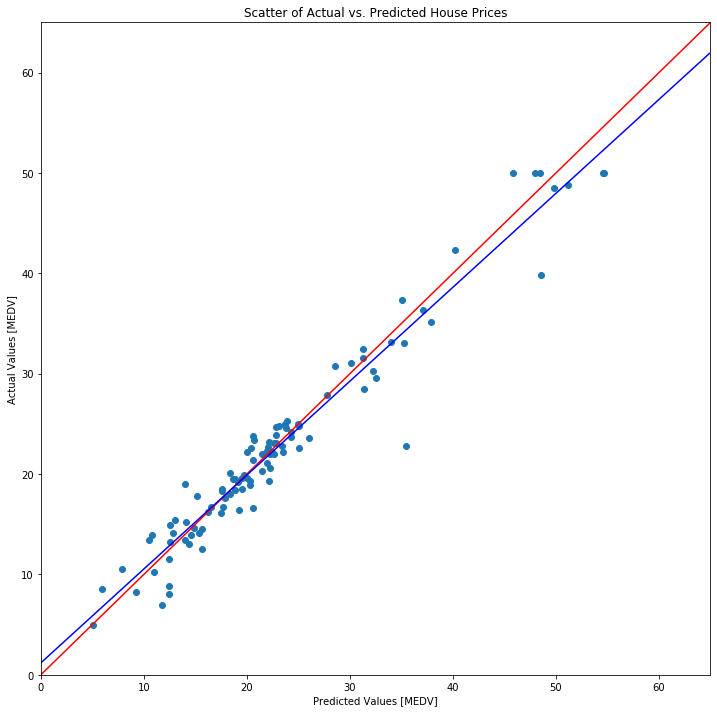

101/101 [==============================] - 0s 106us/sample - loss: 6.1391 - mean_squared_error: 6.1391 - mean_absolute_error: 1.7203
The r-squared value for this evaluation is:  0.946
The slope of the line in this evaluation is:  0.936
The y-intercept in this evaluation is;  1.184
Loss:  6.1390701520560995
Mean squared error:  6.13907
Mean absolute error:  1.7202917


In [60]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets, model_5)

The $r^2$ for the correlation is not as good as for the adam optimiser. Also the points are much more scatter at the extremes. The mean absolute error is high using this optimiser. For this reason I would suggest that the adam has performed better than the sgd optimser.

#### RMSProp optimiser

Finally we will rebuild and train the model using the RMSProp optimiser.

In [61]:
# build the model
model_6 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_6.compile(optimizer='RMSProp', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_6.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 635us/sample - loss: 529.7460 - mean_squared_error: 529.7460 - mean_absolute_error: 21.2242
Epoch 2/1000
405/405 [==============================] - 0s 84us/sample - loss: 461.1399 - mean_squared_error: 461.1399 - mean_absolute_error: 19.5446
Epoch 3/1000
405/405 [==============================] - 0s 82us/sample - loss: 412.8837 - mean_squared_error: 412.8837 - mean_absolute_error: 18.2924
Epoch 4/1000
405/405 [==============================] - 0s 87us/sample - loss: 373.1773 - mean_squared_error: 373.1773 - mean_absolute_error: 17.2167
Epoch 5/1000
405/405 [==============================] - 0s 81us/sample - loss: 341.0247 - mean_squared_error: 341.0247 - mean_absolute_error: 16.2593
Epoch 6/1000
405/405 [==============================] - 0s 85us/sample - loss: 314.4893 - mean_squared_error: 314.4893 - mean_absolute_error: 15.4447
Epoch 7/1000
405/405 [==============================] - 0s 77us/sample - loss: 291.6907 - mean_squa

Epoch 56/1000
405/405 [==============================] - 0s 89us/sample - loss: 37.1188 - mean_squared_error: 37.1188 - mean_absolute_error: 4.1415
Epoch 57/1000
405/405 [==============================] - 0s 78us/sample - loss: 36.4596 - mean_squared_error: 36.4596 - mean_absolute_error: 4.1183
Epoch 58/1000
405/405 [==============================] - 0s 76us/sample - loss: 35.9508 - mean_squared_error: 35.9508 - mean_absolute_error: 4.0732
Epoch 59/1000
405/405 [==============================] - 0s 68us/sample - loss: 35.2543 - mean_squared_error: 35.2543 - mean_absolute_error: 4.0840
Epoch 60/1000
405/405 [==============================] - 0s 71us/sample - loss: 34.6560 - mean_squared_error: 34.6560 - mean_absolute_error: 3.9935
Epoch 61/1000
405/405 [==============================] - 0s 68us/sample - loss: 34.0916 - mean_squared_error: 34.0916 - mean_absolute_error: 4.0388
Epoch 62/1000
405/405 [==============================] - 0s 69us/sample - loss: 33.6492 - mean_squared_error: 33

405/405 [==============================] - 0s 70us/sample - loss: 22.7193 - mean_squared_error: 22.7193 - mean_absolute_error: 3.2978
Epoch 112/1000
405/405 [==============================] - 0s 81us/sample - loss: 22.6540 - mean_squared_error: 22.6540 - mean_absolute_error: 3.3081
Epoch 113/1000
405/405 [==============================] - 0s 75us/sample - loss: 22.7660 - mean_squared_error: 22.7660 - mean_absolute_error: 3.3164
Epoch 114/1000
405/405 [==============================] - 0s 72us/sample - loss: 22.5042 - mean_squared_error: 22.5042 - mean_absolute_error: 3.2910
Epoch 115/1000
405/405 [==============================] - 0s 59us/sample - loss: 22.2543 - mean_squared_error: 22.2543 - mean_absolute_error: 3.2585
Epoch 116/1000
405/405 [==============================] - 0s 60us/sample - loss: 22.1032 - mean_squared_error: 22.1032 - mean_absolute_error: 3.2475
Epoch 117/1000
405/405 [==============================] - 0s 68us/sample - loss: 22.2060 - mean_squared_error: 22.2060 - 

405/405 [==============================] - 0s 68us/sample - loss: 16.0215 - mean_squared_error: 16.0215 - mean_absolute_error: 2.7887
Epoch 167/1000
405/405 [==============================] - 0s 65us/sample - loss: 16.2277 - mean_squared_error: 16.2277 - mean_absolute_error: 2.7611
Epoch 168/1000
405/405 [==============================] - 0s 65us/sample - loss: 15.9368 - mean_squared_error: 15.9368 - mean_absolute_error: 2.7352
Epoch 169/1000
405/405 [==============================] - 0s 64us/sample - loss: 15.9153 - mean_squared_error: 15.9153 - mean_absolute_error: 2.7318
Epoch 170/1000
405/405 [==============================] - 0s 62us/sample - loss: 15.6599 - mean_squared_error: 15.6599 - mean_absolute_error: 2.7127
Epoch 171/1000
405/405 [==============================] - 0s 69us/sample - loss: 15.6415 - mean_squared_error: 15.6415 - mean_absolute_error: 2.7511
Epoch 172/1000
405/405 [==============================] - 0s 68us/sample - loss: 15.6783 - mean_squared_error: 15.6783 - 

405/405 [==============================] - 0s 69us/sample - loss: 12.1249 - mean_squared_error: 12.1249 - mean_absolute_error: 2.4270
Epoch 222/1000
405/405 [==============================] - 0s 70us/sample - loss: 12.0639 - mean_squared_error: 12.0639 - mean_absolute_error: 2.4027
Epoch 223/1000
405/405 [==============================] - 0s 66us/sample - loss: 12.1101 - mean_squared_error: 12.1101 - mean_absolute_error: 2.3944
Epoch 224/1000
405/405 [==============================] - 0s 65us/sample - loss: 11.9624 - mean_squared_error: 11.9624 - mean_absolute_error: 2.4124
Epoch 225/1000
405/405 [==============================] - 0s 67us/sample - loss: 11.7659 - mean_squared_error: 11.7659 - mean_absolute_error: 2.3484
Epoch 226/1000
405/405 [==============================] - 0s 68us/sample - loss: 11.8663 - mean_squared_error: 11.8663 - mean_absolute_error: 2.4101
Epoch 227/1000
405/405 [==============================] - 0s 65us/sample - loss: 11.7837 - mean_squared_error: 11.7837 - 

405/405 [==============================] - 0s 69us/sample - loss: 9.8236 - mean_squared_error: 9.8236 - mean_absolute_error: 2.1954
Epoch 277/1000
405/405 [==============================] - 0s 75us/sample - loss: 9.8120 - mean_squared_error: 9.8120 - mean_absolute_error: 2.1864
Epoch 278/1000
405/405 [==============================] - 0s 63us/sample - loss: 10.0268 - mean_squared_error: 10.0268 - mean_absolute_error: 2.2201
Epoch 279/1000
405/405 [==============================] - 0s 68us/sample - loss: 9.8278 - mean_squared_error: 9.8278 - mean_absolute_error: 2.2150
Epoch 280/1000
405/405 [==============================] - 0s 69us/sample - loss: 9.6733 - mean_squared_error: 9.6733 - mean_absolute_error: 2.1734
Epoch 281/1000
405/405 [==============================] - 0s 67us/sample - loss: 9.8060 - mean_squared_error: 9.8060 - mean_absolute_error: 2.2065
Epoch 282/1000
405/405 [==============================] - 0s 64us/sample - loss: 9.7856 - mean_squared_error: 9.7856 - mean_absolut

405/405 [==============================] - 0s 68us/sample - loss: 8.5329 - mean_squared_error: 8.5329 - mean_absolute_error: 2.0852
Epoch 332/1000
405/405 [==============================] - 0s 72us/sample - loss: 8.4238 - mean_squared_error: 8.4238 - mean_absolute_error: 2.0771
Epoch 333/1000
405/405 [==============================] - 0s 63us/sample - loss: 8.5206 - mean_squared_error: 8.5206 - mean_absolute_error: 2.0997
Epoch 334/1000
405/405 [==============================] - 0s 67us/sample - loss: 8.5485 - mean_squared_error: 8.5485 - mean_absolute_error: 2.0768
Epoch 335/1000
405/405 [==============================] - 0s 76us/sample - loss: 8.4563 - mean_squared_error: 8.4563 - mean_absolute_error: 2.0690
Epoch 336/1000
405/405 [==============================] - 0s 78us/sample - loss: 8.3813 - mean_squared_error: 8.3813 - mean_absolute_error: 2.0589
Epoch 337/1000
405/405 [==============================] - 0s 102us/sample - loss: 8.3783 - mean_squared_error: 8.3783 - mean_absolute

405/405 [==============================] - 0s 76us/sample - loss: 7.3880 - mean_squared_error: 7.3880 - mean_absolute_error: 1.9576
Epoch 387/1000
405/405 [==============================] - 0s 79us/sample - loss: 7.3709 - mean_squared_error: 7.3709 - mean_absolute_error: 1.9793
Epoch 388/1000
405/405 [==============================] - 0s 66us/sample - loss: 7.3821 - mean_squared_error: 7.3821 - mean_absolute_error: 1.9562
Epoch 389/1000
405/405 [==============================] - 0s 68us/sample - loss: 7.4742 - mean_squared_error: 7.4742 - mean_absolute_error: 1.9804
Epoch 390/1000
405/405 [==============================] - 0s 68us/sample - loss: 7.2539 - mean_squared_error: 7.2539 - mean_absolute_error: 1.9677
Epoch 391/1000
405/405 [==============================] - 0s 67us/sample - loss: 7.3150 - mean_squared_error: 7.3150 - mean_absolute_error: 1.9635
Epoch 392/1000
405/405 [==============================] - 0s 70us/sample - loss: 7.3715 - mean_squared_error: 7.3715 - mean_absolute_

405/405 [==============================] - 0s 61us/sample - loss: 6.6144 - mean_squared_error: 6.6144 - mean_absolute_error: 1.8837
Epoch 442/1000
405/405 [==============================] - 0s 64us/sample - loss: 6.6210 - mean_squared_error: 6.6210 - mean_absolute_error: 1.8661
Epoch 443/1000
405/405 [==============================] - 0s 63us/sample - loss: 6.5569 - mean_squared_error: 6.5569 - mean_absolute_error: 1.8768
Epoch 444/1000
405/405 [==============================] - 0s 60us/sample - loss: 6.5551 - mean_squared_error: 6.5551 - mean_absolute_error: 1.8580
Epoch 445/1000
405/405 [==============================] - 0s 62us/sample - loss: 6.7186 - mean_squared_error: 6.7186 - mean_absolute_error: 1.8896
Epoch 446/1000
405/405 [==============================] - 0s 76us/sample - loss: 6.4852 - mean_squared_error: 6.4852 - mean_absolute_error: 1.8721
Epoch 447/1000
405/405 [==============================] - 0s 75us/sample - loss: 6.5527 - mean_squared_error: 6.5527 - mean_absolute_

405/405 [==============================] - 0s 70us/sample - loss: 5.9656 - mean_squared_error: 5.9656 - mean_absolute_error: 1.7908
Epoch 497/1000
405/405 [==============================] - 0s 76us/sample - loss: 6.1863 - mean_squared_error: 6.1863 - mean_absolute_error: 1.8413
Epoch 498/1000
405/405 [==============================] - 0s 60us/sample - loss: 6.1810 - mean_squared_error: 6.1810 - mean_absolute_error: 1.8142
Epoch 499/1000
405/405 [==============================] - 0s 68us/sample - loss: 5.9914 - mean_squared_error: 5.9914 - mean_absolute_error: 1.7999
Epoch 500/1000
405/405 [==============================] - 0s 68us/sample - loss: 6.0196 - mean_squared_error: 6.0196 - mean_absolute_error: 1.7927
Epoch 501/1000
405/405 [==============================] - 0s 71us/sample - loss: 6.0182 - mean_squared_error: 6.0182 - mean_absolute_error: 1.8098
Epoch 502/1000
405/405 [==============================] - 0s 73us/sample - loss: 5.8358 - mean_squared_error: 5.8358 - mean_absolute_

405/405 [==============================] - 0s 66us/sample - loss: 5.7037 - mean_squared_error: 5.7037 - mean_absolute_error: 1.7523
Epoch 552/1000
405/405 [==============================] - 0s 68us/sample - loss: 5.6647 - mean_squared_error: 5.6647 - mean_absolute_error: 1.7564
Epoch 553/1000
405/405 [==============================] - 0s 61us/sample - loss: 5.6441 - mean_squared_error: 5.6441 - mean_absolute_error: 1.7267
Epoch 554/1000
405/405 [==============================] - 0s 66us/sample - loss: 5.7661 - mean_squared_error: 5.7661 - mean_absolute_error: 1.7613
Epoch 555/1000
405/405 [==============================] - 0s 66us/sample - loss: 5.6579 - mean_squared_error: 5.6579 - mean_absolute_error: 1.7480
Epoch 556/1000
405/405 [==============================] - 0s 68us/sample - loss: 5.6288 - mean_squared_error: 5.6288 - mean_absolute_error: 1.7562
Epoch 557/1000
405/405 [==============================] - 0s 67us/sample - loss: 5.5718 - mean_squared_error: 5.5718 - mean_absolute_

405/405 [==============================] - 0s 67us/sample - loss: 5.3577 - mean_squared_error: 5.3577 - mean_absolute_error: 1.7072
Epoch 607/1000
405/405 [==============================] - 0s 66us/sample - loss: 5.3040 - mean_squared_error: 5.3040 - mean_absolute_error: 1.6818
Epoch 608/1000
405/405 [==============================] - 0s 61us/sample - loss: 5.3395 - mean_squared_error: 5.3395 - mean_absolute_error: 1.6848
Epoch 609/1000
405/405 [==============================] - 0s 67us/sample - loss: 5.3296 - mean_squared_error: 5.3296 - mean_absolute_error: 1.6871
Epoch 610/1000
405/405 [==============================] - 0s 63us/sample - loss: 5.3157 - mean_squared_error: 5.3157 - mean_absolute_error: 1.7090
Epoch 611/1000
405/405 [==============================] - 0s 62us/sample - loss: 5.1994 - mean_squared_error: 5.1994 - mean_absolute_error: 1.6717
Epoch 612/1000
405/405 [==============================] - 0s 70us/sample - loss: 5.3441 - mean_squared_error: 5.3441 - mean_absolute_

405/405 [==============================] - 0s 68us/sample - loss: 5.0300 - mean_squared_error: 5.0300 - mean_absolute_error: 1.6458
Epoch 662/1000
405/405 [==============================] - 0s 66us/sample - loss: 4.9935 - mean_squared_error: 4.9935 - mean_absolute_error: 1.6381
Epoch 663/1000
405/405 [==============================] - 0s 69us/sample - loss: 5.0364 - mean_squared_error: 5.0364 - mean_absolute_error: 1.6691
Epoch 664/1000
405/405 [==============================] - 0s 64us/sample - loss: 5.0419 - mean_squared_error: 5.0419 - mean_absolute_error: 1.6409
Epoch 665/1000
405/405 [==============================] - 0s 65us/sample - loss: 5.0000 - mean_squared_error: 5.0000 - mean_absolute_error: 1.6341
Epoch 666/1000
405/405 [==============================] - 0s 67us/sample - loss: 5.1064 - mean_squared_error: 5.1064 - mean_absolute_error: 1.6748
Epoch 667/1000
405/405 [==============================] - 0s 70us/sample - loss: 4.9711 - mean_squared_error: 4.9711 - mean_absolute_

405/405 [==============================] - 0s 67us/sample - loss: 4.7809 - mean_squared_error: 4.7809 - mean_absolute_error: 1.6180
Epoch 717/1000
405/405 [==============================] - 0s 91us/sample - loss: 4.7892 - mean_squared_error: 4.7892 - mean_absolute_error: 1.6140
Epoch 718/1000
405/405 [==============================] - 0s 65us/sample - loss: 4.7082 - mean_squared_error: 4.7082 - mean_absolute_error: 1.5788
Epoch 719/1000
405/405 [==============================] - 0s 66us/sample - loss: 4.7768 - mean_squared_error: 4.7768 - mean_absolute_error: 1.6068
Epoch 720/1000
405/405 [==============================] - 0s 60us/sample - loss: 4.8170 - mean_squared_error: 4.8170 - mean_absolute_error: 1.6192
Epoch 721/1000
405/405 [==============================] - 0s 61us/sample - loss: 4.6744 - mean_squared_error: 4.6744 - mean_absolute_error: 1.5754
Epoch 722/1000
405/405 [==============================] - 0s 61us/sample - loss: 4.7642 - mean_squared_error: 4.7642 - mean_absolute_

405/405 [==============================] - 0s 70us/sample - loss: 4.5140 - mean_squared_error: 4.5140 - mean_absolute_error: 1.5547
Epoch 772/1000
405/405 [==============================] - 0s 68us/sample - loss: 4.4587 - mean_squared_error: 4.4587 - mean_absolute_error: 1.5500
Epoch 773/1000
405/405 [==============================] - 0s 60us/sample - loss: 4.5507 - mean_squared_error: 4.5507 - mean_absolute_error: 1.5703
Epoch 774/1000
405/405 [==============================] - 0s 71us/sample - loss: 4.4099 - mean_squared_error: 4.4099 - mean_absolute_error: 1.5436
Epoch 775/1000
405/405 [==============================] - 0s 65us/sample - loss: 4.5761 - mean_squared_error: 4.5761 - mean_absolute_error: 1.5713
Epoch 776/1000
405/405 [==============================] - 0s 63us/sample - loss: 4.5461 - mean_squared_error: 4.5461 - mean_absolute_error: 1.5721
Epoch 777/1000
405/405 [==============================] - 0s 70us/sample - loss: 4.5243 - mean_squared_error: 4.5243 - mean_absolute_

405/405 [==============================] - 0s 65us/sample - loss: 4.4027 - mean_squared_error: 4.4027 - mean_absolute_error: 1.5593
Epoch 827/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.1789 - mean_squared_error: 4.1789 - mean_absolute_error: 1.4939
Epoch 828/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.2721 - mean_squared_error: 4.2721 - mean_absolute_error: 1.5264
Epoch 829/1000
405/405 [==============================] - 0s 63us/sample - loss: 4.1848 - mean_squared_error: 4.1848 - mean_absolute_error: 1.4877
Epoch 830/1000
405/405 [==============================] - 0s 60us/sample - loss: 4.2080 - mean_squared_error: 4.2080 - mean_absolute_error: 1.5192
Epoch 831/1000
405/405 [==============================] - 0s 65us/sample - loss: 4.2983 - mean_squared_error: 4.2983 - mean_absolute_error: 1.5203
Epoch 832/1000
405/405 [==============================] - 0s 70us/sample - loss: 4.1381 - mean_squared_error: 4.1381 - mean_absolute_

405/405 [==============================] - 0s 65us/sample - loss: 4.0684 - mean_squared_error: 4.0684 - mean_absolute_error: 1.4837
Epoch 882/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.0365 - mean_squared_error: 4.0365 - mean_absolute_error: 1.4754
Epoch 883/1000
405/405 [==============================] - 0s 67us/sample - loss: 3.9903 - mean_squared_error: 3.9903 - mean_absolute_error: 1.4641
Epoch 884/1000
405/405 [==============================] - 0s 67us/sample - loss: 3.9442 - mean_squared_error: 3.9442 - mean_absolute_error: 1.4662
Epoch 885/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.0171 - mean_squared_error: 4.0171 - mean_absolute_error: 1.4761
Epoch 886/1000
405/405 [==============================] - 0s 73us/sample - loss: 3.9773 - mean_squared_error: 3.9773 - mean_absolute_error: 1.4564
Epoch 887/1000
405/405 [==============================] - 0s 69us/sample - loss: 4.0732 - mean_squared_error: 4.0732 - mean_absolute_

405/405 [==============================] - 0s 63us/sample - loss: 3.7637 - mean_squared_error: 3.7637 - mean_absolute_error: 1.4246
Epoch 937/1000
405/405 [==============================] - 0s 76us/sample - loss: 3.7991 - mean_squared_error: 3.7991 - mean_absolute_error: 1.4304
Epoch 938/1000
405/405 [==============================] - 0s 61us/sample - loss: 3.9074 - mean_squared_error: 3.9074 - mean_absolute_error: 1.4606
Epoch 939/1000
405/405 [==============================] - 0s 66us/sample - loss: 3.8685 - mean_squared_error: 3.8685 - mean_absolute_error: 1.4589
Epoch 940/1000
405/405 [==============================] - 0s 67us/sample - loss: 3.8222 - mean_squared_error: 3.8222 - mean_absolute_error: 1.4215
Epoch 941/1000
405/405 [==============================] - 0s 70us/sample - loss: 3.7747 - mean_squared_error: 3.7747 - mean_absolute_error: 1.4353
Epoch 942/1000
405/405 [==============================] - 0s 72us/sample - loss: 3.7807 - mean_squared_error: 3.7807 - mean_absolute_

405/405 [==============================] - 0s 63us/sample - loss: 3.6971 - mean_squared_error: 3.6971 - mean_absolute_error: 1.4024
Epoch 992/1000
405/405 [==============================] - 0s 66us/sample - loss: 3.5814 - mean_squared_error: 3.5814 - mean_absolute_error: 1.4118
Epoch 993/1000
405/405 [==============================] - 0s 69us/sample - loss: 3.5414 - mean_squared_error: 3.5414 - mean_absolute_error: 1.3780
Epoch 994/1000
405/405 [==============================] - 0s 60us/sample - loss: 3.7523 - mean_squared_error: 3.7523 - mean_absolute_error: 1.4310
Epoch 995/1000
405/405 [==============================] - 0s 69us/sample - loss: 3.5030 - mean_squared_error: 3.5030 - mean_absolute_error: 1.3719
Epoch 996/1000
405/405 [==============================] - 0s 70us/sample - loss: 3.6507 - mean_squared_error: 3.6507 - mean_absolute_error: 1.4239
Epoch 997/1000
405/405 [==============================] - 0s 67us/sample - loss: 3.5455 - mean_squared_error: 3.5455 - mean_absolute_

Then we evaluate the impact of the RMSProp optimiser on the predictions.

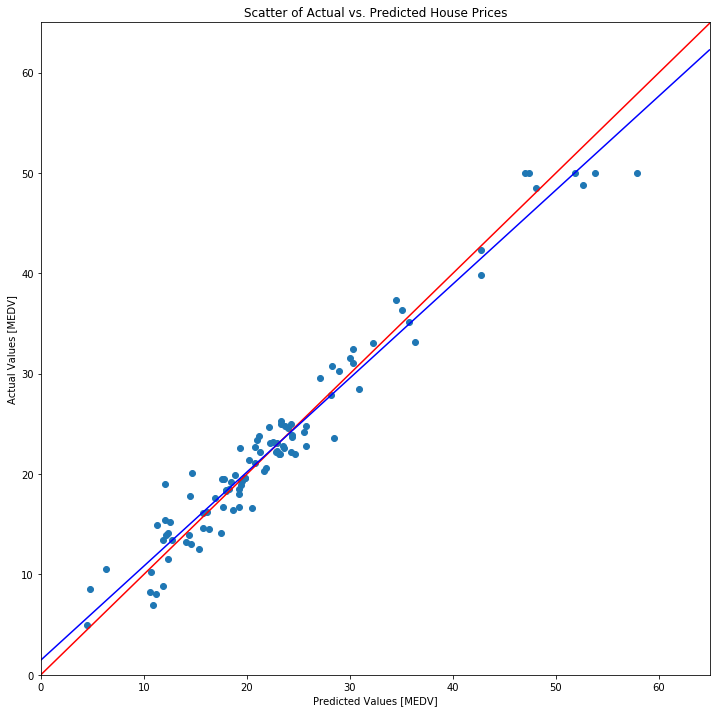

101/101 [==============================] - 0s 1ms/sample - loss: 5.3181 - mean_squared_error: 5.3181 - mean_absolute_error: 1.7988
The r-squared value for this evaluation is:  0.953
The slope of the line in this evaluation is:  0.937
The y-intercept in this evaluation is;  1.461
Loss:  5.318073102743319
Mean squared error:  5.318073
Mean absolute error:  1.7987868


In [62]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_6)

The $r^2$ value is good, and the line is relatively good, however the model seems to be poor at predicting for the higher values. The mean absolute error is not as good as when the adam optimiser was used.

#### Summary of optimisers

Of the 3 optimisers tested - the adam optimiser seems to work best with this dataset.

#### Adding More Layers to the Model

Until this point, all the shapes of the models were the same - 64 neurons per hidden layer, and 2 hidden layers, in this section we'll add some more layers and evaluate the impact of that.

#### Modelling 3 Hidden Layers
First we will add 1 hidden layer, again we will have 64 neurons per layer, the sigmoid activation function and the adam optimiser.

In [63]:
# build the model
model_7 = build_model(64,'sigmoid',3,train_dataset)
# compile the model define the loss function and optimiser
model_7.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_7.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 841us/sample - loss: 573.1802 - mean_squared_error: 573.1802 - mean_absolute_error: 22.1956
Epoch 2/1000
405/405 [==============================] - 0s 88us/sample - loss: 507.4890 - mean_squared_error: 507.4890 - mean_absolute_error: 20.6775
Epoch 3/1000
405/405 [==============================] - 0s 98us/sample - loss: 447.6218 - mean_squared_error: 447.6218 - mean_absolute_error: 19.1927
Epoch 4/1000
405/405 [==============================] - 0s 94us/sample - loss: 400.5926 - mean_squared_error: 400.5927 - mean_absolute_error: 17.9271
Epoch 5/1000
405/405 [==============================] - 0s 87us/sample - loss: 367.1414 - mean_squared_error: 367.1414 - mean_absolute_error: 16.9623
Epoch 6/1000
405/405 [==============================] - 0s 100us/sample - loss: 342.1513 - mean_squared_error: 342.1513 - mean_absolute_error: 16.2233
Epoch 7/1000
405/405 [==============================] - 0s 95us/sample - loss: 321.9087 - mean_squ

405/405 [==============================] - 0s 124us/sample - loss: 77.2154 - mean_squared_error: 77.2154 - mean_absolute_error: 6.1451
Epoch 56/1000
405/405 [==============================] - 0s 109us/sample - loss: 76.5254 - mean_squared_error: 76.5254 - mean_absolute_error: 6.1077
Epoch 57/1000
405/405 [==============================] - 0s 88us/sample - loss: 75.7852 - mean_squared_error: 75.7852 - mean_absolute_error: 6.0694
Epoch 58/1000
405/405 [==============================] - 0s 83us/sample - loss: 75.1125 - mean_squared_error: 75.1125 - mean_absolute_error: 6.0254
Epoch 59/1000
405/405 [==============================] - 0s 82us/sample - loss: 74.3491 - mean_squared_error: 74.3491 - mean_absolute_error: 5.9772
Epoch 60/1000
405/405 [==============================] - 0s 80us/sample - loss: 73.5671 - mean_squared_error: 73.5671 - mean_absolute_error: 5.9337
Epoch 61/1000
405/405 [==============================] - 0s 82us/sample - loss: 72.8223 - mean_squared_error: 72.8223 - mean

405/405 [==============================] - 0s 96us/sample - loss: 35.0563 - mean_squared_error: 35.0563 - mean_absolute_error: 3.8849
Epoch 111/1000
405/405 [==============================] - 0s 91us/sample - loss: 34.4650 - mean_squared_error: 34.4650 - mean_absolute_error: 3.7684
Epoch 112/1000
405/405 [==============================] - 0s 76us/sample - loss: 34.0054 - mean_squared_error: 34.0054 - mean_absolute_error: 3.7831
Epoch 113/1000
405/405 [==============================] - 0s 79us/sample - loss: 33.4203 - mean_squared_error: 33.4203 - mean_absolute_error: 3.6942
Epoch 114/1000
405/405 [==============================] - 0s 76us/sample - loss: 32.9507 - mean_squared_error: 32.9507 - mean_absolute_error: 3.7218
Epoch 115/1000
405/405 [==============================] - 0s 77us/sample - loss: 32.4832 - mean_squared_error: 32.4832 - mean_absolute_error: 3.6278
Epoch 116/1000
405/405 [==============================] - 0s 85us/sample - loss: 32.0112 - mean_squared_error: 32.0112 - 

405/405 [==============================] - 0s 114us/sample - loss: 17.7890 - mean_squared_error: 17.7890 - mean_absolute_error: 2.7006
Epoch 165/1000
405/405 [==============================] - 0s 129us/sample - loss: 17.7772 - mean_squared_error: 17.7772 - mean_absolute_error: 2.7228
Epoch 166/1000
405/405 [==============================] - 0s 96us/sample - loss: 17.5961 - mean_squared_error: 17.5961 - mean_absolute_error: 2.6907
Epoch 167/1000
405/405 [==============================] - 0s 100us/sample - loss: 17.3327 - mean_squared_error: 17.3327 - mean_absolute_error: 2.6886
Epoch 168/1000
405/405 [==============================] - 0s 106us/sample - loss: 17.1936 - mean_squared_error: 17.1936 - mean_absolute_error: 2.6664
Epoch 169/1000
405/405 [==============================] - 0s 103us/sample - loss: 17.0004 - mean_squared_error: 17.0004 - mean_absolute_error: 2.6756
Epoch 170/1000
405/405 [==============================] - 0s 110us/sample - loss: 16.8357 - mean_squared_error: 16.8

405/405 [==============================] - 0s 91us/sample - loss: 11.5174 - mean_squared_error: 11.5174 - mean_absolute_error: 2.2760
Epoch 219/1000
405/405 [==============================] - 0s 98us/sample - loss: 11.4742 - mean_squared_error: 11.4742 - mean_absolute_error: 2.2969
Epoch 220/1000
405/405 [==============================] - 0s 93us/sample - loss: 11.4116 - mean_squared_error: 11.4116 - mean_absolute_error: 2.2938
Epoch 221/1000
405/405 [==============================] - 0s 88us/sample - loss: 11.1902 - mean_squared_error: 11.1902 - mean_absolute_error: 2.2589
Epoch 222/1000
405/405 [==============================] - 0s 81us/sample - loss: 11.1010 - mean_squared_error: 11.1010 - mean_absolute_error: 2.2592
Epoch 223/1000
405/405 [==============================] - 0s 81us/sample - loss: 11.0164 - mean_squared_error: 11.0164 - mean_absolute_error: 2.2575
Epoch 224/1000
405/405 [==============================] - 0s 77us/sample - loss: 10.8158 - mean_squared_error: 10.8158 - 

405/405 [==============================] - 0s 86us/sample - loss: 7.6367 - mean_squared_error: 7.6367 - mean_absolute_error: 1.9806
Epoch 274/1000
405/405 [==============================] - 0s 78us/sample - loss: 7.5967 - mean_squared_error: 7.5967 - mean_absolute_error: 1.9746
Epoch 275/1000
405/405 [==============================] - 0s 80us/sample - loss: 7.6823 - mean_squared_error: 7.6823 - mean_absolute_error: 2.0070
Epoch 276/1000
405/405 [==============================] - 0s 79us/sample - loss: 7.4360 - mean_squared_error: 7.4360 - mean_absolute_error: 1.9597
Epoch 277/1000
405/405 [==============================] - 0s 79us/sample - loss: 7.5356 - mean_squared_error: 7.5356 - mean_absolute_error: 1.9795
Epoch 278/1000
405/405 [==============================] - 0s 89us/sample - loss: 7.4627 - mean_squared_error: 7.4627 - mean_absolute_error: 1.9673
Epoch 279/1000
405/405 [==============================] - 0s 78us/sample - loss: 7.3148 - mean_squared_error: 7.3148 - mean_absolute_

405/405 [==============================] - 0s 84us/sample - loss: 5.9091 - mean_squared_error: 5.9091 - mean_absolute_error: 1.8072
Epoch 329/1000
405/405 [==============================] - 0s 94us/sample - loss: 6.2531 - mean_squared_error: 6.2531 - mean_absolute_error: 1.8610
Epoch 330/1000
405/405 [==============================] - 0s 80us/sample - loss: 5.9769 - mean_squared_error: 5.9769 - mean_absolute_error: 1.8119
Epoch 331/1000
405/405 [==============================] - 0s 80us/sample - loss: 5.9536 - mean_squared_error: 5.9536 - mean_absolute_error: 1.7957
Epoch 332/1000
405/405 [==============================] - 0s 79us/sample - loss: 5.9124 - mean_squared_error: 5.9124 - mean_absolute_error: 1.7880
Epoch 333/1000
405/405 [==============================] - 0s 86us/sample - loss: 5.7697 - mean_squared_error: 5.7697 - mean_absolute_error: 1.7605
Epoch 334/1000
405/405 [==============================] - 0s 80us/sample - loss: 5.7180 - mean_squared_error: 5.7180 - mean_absolute_

405/405 [==============================] - 0s 99us/sample - loss: 4.9650 - mean_squared_error: 4.9650 - mean_absolute_error: 1.6720
Epoch 384/1000
405/405 [==============================] - 0s 99us/sample - loss: 4.8283 - mean_squared_error: 4.8283 - mean_absolute_error: 1.6474
Epoch 385/1000
405/405 [==============================] - 0s 94us/sample - loss: 4.8021 - mean_squared_error: 4.8021 - mean_absolute_error: 1.6258
Epoch 386/1000
405/405 [==============================] - 0s 96us/sample - loss: 4.7870 - mean_squared_error: 4.7870 - mean_absolute_error: 1.6209
Epoch 387/1000
405/405 [==============================] - 0s 89us/sample - loss: 4.8270 - mean_squared_error: 4.8270 - mean_absolute_error: 1.6401
Epoch 388/1000
405/405 [==============================] - 0s 90us/sample - loss: 4.8069 - mean_squared_error: 4.8069 - mean_absolute_error: 1.6206
Epoch 389/1000
405/405 [==============================] - 0s 108us/sample - loss: 4.8443 - mean_squared_error: 4.8443 - mean_absolute

405/405 [==============================] - 0s 103us/sample - loss: 4.1693 - mean_squared_error: 4.1693 - mean_absolute_error: 1.5176
Epoch 439/1000
405/405 [==============================] - 0s 99us/sample - loss: 4.2061 - mean_squared_error: 4.2061 - mean_absolute_error: 1.5186
Epoch 440/1000
405/405 [==============================] - 0s 104us/sample - loss: 4.1865 - mean_squared_error: 4.1865 - mean_absolute_error: 1.5136
Epoch 441/1000
405/405 [==============================] - 0s 92us/sample - loss: 4.1502 - mean_squared_error: 4.1502 - mean_absolute_error: 1.5002
Epoch 442/1000
405/405 [==============================] - 0s 81us/sample - loss: 4.2377 - mean_squared_error: 4.2377 - mean_absolute_error: 1.5360
Epoch 443/1000
405/405 [==============================] - 0s 78us/sample - loss: 4.1221 - mean_squared_error: 4.1221 - mean_absolute_error: 1.5019
Epoch 444/1000
405/405 [==============================] - 0s 76us/sample - loss: 4.1741 - mean_squared_error: 4.1741 - mean_absolut

405/405 [==============================] - 0s 84us/sample - loss: 3.7583 - mean_squared_error: 3.7583 - mean_absolute_error: 1.4301
Epoch 494/1000
405/405 [==============================] - 0s 91us/sample - loss: 3.8574 - mean_squared_error: 3.8574 - mean_absolute_error: 1.4727
Epoch 495/1000
405/405 [==============================] - 0s 73us/sample - loss: 3.8796 - mean_squared_error: 3.8796 - mean_absolute_error: 1.4795
Epoch 496/1000
405/405 [==============================] - 0s 72us/sample - loss: 3.7837 - mean_squared_error: 3.7837 - mean_absolute_error: 1.4473
Epoch 497/1000
405/405 [==============================] - 0s 79us/sample - loss: 3.7814 - mean_squared_error: 3.7814 - mean_absolute_error: 1.4556
Epoch 498/1000
405/405 [==============================] - 0s 79us/sample - loss: 3.7371 - mean_squared_error: 3.7371 - mean_absolute_error: 1.4414
Epoch 499/1000
405/405 [==============================] - 0s 89us/sample - loss: 3.7205 - mean_squared_error: 3.7205 - mean_absolute_

405/405 [==============================] - 0s 86us/sample - loss: 3.6699 - mean_squared_error: 3.6699 - mean_absolute_error: 1.4119
Epoch 549/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.6171 - mean_squared_error: 3.6171 - mean_absolute_error: 1.4174
Epoch 550/1000
405/405 [==============================] - 0s 89us/sample - loss: 3.5685 - mean_squared_error: 3.5685 - mean_absolute_error: 1.3934
Epoch 551/1000
405/405 [==============================] - 0s 76us/sample - loss: 3.5822 - mean_squared_error: 3.5822 - mean_absolute_error: 1.4069
Epoch 552/1000
405/405 [==============================] - 0s 79us/sample - loss: 3.5567 - mean_squared_error: 3.5567 - mean_absolute_error: 1.4166
Epoch 553/1000
405/405 [==============================] - 0s 90us/sample - loss: 3.4704 - mean_squared_error: 3.4704 - mean_absolute_error: 1.4048
Epoch 554/1000
405/405 [==============================] - 0s 82us/sample - loss: 3.4190 - mean_squared_error: 3.4190 - mean_absolute_

405/405 [==============================] - 0s 94us/sample - loss: 3.3375 - mean_squared_error: 3.3375 - mean_absolute_error: 1.3731
Epoch 604/1000
405/405 [==============================] - 0s 87us/sample - loss: 3.5815 - mean_squared_error: 3.5815 - mean_absolute_error: 1.4098
Epoch 605/1000
405/405 [==============================] - 0s 99us/sample - loss: 3.2977 - mean_squared_error: 3.2977 - mean_absolute_error: 1.3713
Epoch 606/1000
405/405 [==============================] - 0s 85us/sample - loss: 3.1796 - mean_squared_error: 3.1796 - mean_absolute_error: 1.3075
Epoch 607/1000
405/405 [==============================] - 0s 88us/sample - loss: 3.1911 - mean_squared_error: 3.1911 - mean_absolute_error: 1.3341
Epoch 608/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.2327 - mean_squared_error: 3.2327 - mean_absolute_error: 1.3432
Epoch 609/1000
405/405 [==============================] - 0s 89us/sample - loss: 3.2573 - mean_squared_error: 3.2573 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 2.9882 - mean_squared_error: 2.9882 - mean_absolute_error: 1.3074
Epoch 659/1000
405/405 [==============================] - 0s 87us/sample - loss: 3.0997 - mean_squared_error: 3.0997 - mean_absolute_error: 1.3099
Epoch 660/1000
405/405 [==============================] - 0s 82us/sample - loss: 3.0392 - mean_squared_error: 3.0392 - mean_absolute_error: 1.2923
Epoch 661/1000
405/405 [==============================] - 0s 83us/sample - loss: 3.0773 - mean_squared_error: 3.0773 - mean_absolute_error: 1.3056
Epoch 662/1000
405/405 [==============================] - 0s 81us/sample - loss: 3.0238 - mean_squared_error: 3.0238 - mean_absolute_error: 1.2703
Epoch 663/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.9822 - mean_squared_error: 2.9822 - mean_absolute_error: 1.2863
Epoch 664/1000
405/405 [==============================] - 0s 86us/sample - loss: 3.0174 - mean_squared_error: 3.0174 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 2.9136 - mean_squared_error: 2.9136 - mean_absolute_error: 1.2915
Epoch 714/1000
405/405 [==============================] - 0s 99us/sample - loss: 2.8093 - mean_squared_error: 2.8093 - mean_absolute_error: 1.2399
Epoch 715/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.7914 - mean_squared_error: 2.7914 - mean_absolute_error: 1.2412
Epoch 716/1000
405/405 [==============================] - 0s 86us/sample - loss: 2.7971 - mean_squared_error: 2.7971 - mean_absolute_error: 1.2425
Epoch 717/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.7725 - mean_squared_error: 2.7725 - mean_absolute_error: 1.2303
Epoch 718/1000
405/405 [==============================] - 0s 84us/sample - loss: 2.8219 - mean_squared_error: 2.8219 - mean_absolute_error: 1.2511
Epoch 719/1000
405/405 [==============================] - 0s 74us/sample - loss: 2.7457 - mean_squared_error: 2.7457 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 2.6135 - mean_squared_error: 2.6135 - mean_absolute_error: 1.1871
Epoch 769/1000
405/405 [==============================] - 0s 87us/sample - loss: 2.5783 - mean_squared_error: 2.5783 - mean_absolute_error: 1.1804
Epoch 770/1000
405/405 [==============================] - 0s 75us/sample - loss: 2.5958 - mean_squared_error: 2.5958 - mean_absolute_error: 1.1786
Epoch 771/1000
405/405 [==============================] - 0s 79us/sample - loss: 2.5581 - mean_squared_error: 2.5581 - mean_absolute_error: 1.1816
Epoch 772/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.5463 - mean_squared_error: 2.5463 - mean_absolute_error: 1.1807
Epoch 773/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.5602 - mean_squared_error: 2.5602 - mean_absolute_error: 1.1789
Epoch 774/1000
405/405 [==============================] - 0s 85us/sample - loss: 2.6639 - mean_squared_error: 2.6639 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 2.4356 - mean_squared_error: 2.4356 - mean_absolute_error: 1.1379
Epoch 824/1000
405/405 [==============================] - 0s 105us/sample - loss: 2.4497 - mean_squared_error: 2.4497 - mean_absolute_error: 1.1469
Epoch 825/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.4519 - mean_squared_error: 2.4519 - mean_absolute_error: 1.1530
Epoch 826/1000
405/405 [==============================] - 0s 103us/sample - loss: 2.4390 - mean_squared_error: 2.4390 - mean_absolute_error: 1.1625
Epoch 827/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.4413 - mean_squared_error: 2.4413 - mean_absolute_error: 1.1528
Epoch 828/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.3876 - mean_squared_error: 2.3876 - mean_absolute_error: 1.1357
Epoch 829/1000
405/405 [==============================] - 0s 117us/sample - loss: 2.3911 - mean_squared_error: 2.3911 - mean_abso

405/405 [==============================] - 0s 87us/sample - loss: 2.3061 - mean_squared_error: 2.3061 - mean_absolute_error: 1.1191
Epoch 879/1000
405/405 [==============================] - 0s 97us/sample - loss: 2.3552 - mean_squared_error: 2.3552 - mean_absolute_error: 1.1436
Epoch 880/1000
405/405 [==============================] - 0s 88us/sample - loss: 2.2868 - mean_squared_error: 2.2868 - mean_absolute_error: 1.1127
Epoch 881/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.3946 - mean_squared_error: 2.3946 - mean_absolute_error: 1.1536
Epoch 882/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.2824 - mean_squared_error: 2.2824 - mean_absolute_error: 1.1202
Epoch 883/1000
405/405 [==============================] - 0s 84us/sample - loss: 2.3434 - mean_squared_error: 2.3434 - mean_absolute_error: 1.1394
Epoch 884/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.2778 - mean_squared_error: 2.2778 - mean_absolute_

405/405 [==============================] - 0s 77us/sample - loss: 2.4046 - mean_squared_error: 2.4046 - mean_absolute_error: 1.1645
Epoch 934/1000
405/405 [==============================] - 0s 81us/sample - loss: 2.2406 - mean_squared_error: 2.2406 - mean_absolute_error: 1.1022
Epoch 935/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.1993 - mean_squared_error: 2.1993 - mean_absolute_error: 1.0876
Epoch 936/1000
405/405 [==============================] - 0s 70us/sample - loss: 2.2210 - mean_squared_error: 2.2210 - mean_absolute_error: 1.0909
Epoch 937/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.1551 - mean_squared_error: 2.1551 - mean_absolute_error: 1.0766
Epoch 938/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.2313 - mean_squared_error: 2.2313 - mean_absolute_error: 1.1008
Epoch 939/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.2780 - mean_squared_error: 2.2780 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 2.0799 - mean_squared_error: 2.0799 - mean_absolute_error: 1.0594
Epoch 989/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.0605 - mean_squared_error: 2.0605 - mean_absolute_error: 1.0513
Epoch 990/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.0576 - mean_squared_error: 2.0576 - mean_absolute_error: 1.0453
Epoch 991/1000
405/405 [==============================] - 0s 72us/sample - loss: 2.1190 - mean_squared_error: 2.1190 - mean_absolute_error: 1.0838
Epoch 992/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.0976 - mean_squared_error: 2.0976 - mean_absolute_error: 1.0805
Epoch 993/1000
405/405 [==============================] - 0s 74us/sample - loss: 2.0450 - mean_squared_error: 2.0450 - mean_absolute_error: 1.0636
Epoch 994/1000
405/405 [==============================] - 0s 73us/sample - loss: 2.0681 - mean_squared_error: 2.0681 - mean_absolute_

And then we evaluate:

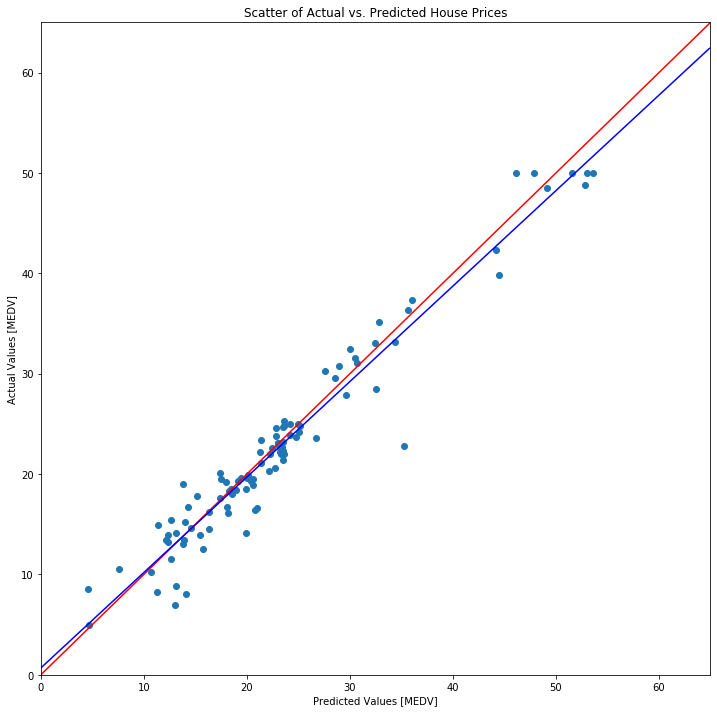

101/101 [==============================] - 0s 125us/sample - loss: 6.3988 - mean_squared_error: 6.3988 - mean_absolute_error: 1.7955
The r-squared value for this evaluation is:  0.942
The slope of the line in this evaluation is:  0.951
The y-intercept in this evaluation is;  0.68
Loss:  6.398812983295705
Mean squared error:  6.398813
Mean absolute error:  1.795525


In [66]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_7)

The $r^2$ value for this model is good, but the mean absolute error is not as good as for 2 hidden layers.

#### Modelling 5 Hidden Layers
Adding one extra layer has not made a significant change to the performance of the model, lets try to add some more! In the next model we'll have 5 hidden layers

In [65]:
# build the model
model_8 = build_model(64,'sigmoid',5,train_dataset)
# compile the model define the loss function and optimiser
model_8.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_8.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 1s 1ms/sample - loss: 543.7435 - mean_squared_error: 543.7435 - mean_absolute_error: 21.5406
Epoch 2/1000
405/405 [==============================] - 0s 138us/sample - loss: 478.5648 - mean_squared_error: 478.5648 - mean_absolute_error: 19.9720
Epoch 3/1000
405/405 [==============================] - 0s 139us/sample - loss: 421.5978 - mean_squared_error: 421.5977 - mean_absolute_error: 18.4841
Epoch 4/1000
405/405 [==============================] - 0s 137us/sample - loss: 375.1541 - mean_squared_error: 375.1541 - mean_absolute_error: 17.1910
Epoch 5/1000
405/405 [==============================] - 0s 156us/sample - loss: 340.5015 - mean_squared_error: 340.5016 - mean_absolute_error: 16.1766
Epoch 6/1000
405/405 [==============================] - 0s 131us/sample - loss: 315.2135 - mean_squared_error: 315.2135 - mean_absolute_error: 15.3726
Epoch 7/1000
405/405 [==============================] - 0s 136us/sample - loss: 294.5595 - mean_

405/405 [==============================] - 0s 91us/sample - loss: 80.1445 - mean_squared_error: 80.1445 - mean_absolute_error: 6.3956
Epoch 56/1000
405/405 [==============================] - 0s 98us/sample - loss: 80.0722 - mean_squared_error: 80.0722 - mean_absolute_error: 6.3996
Epoch 57/1000
405/405 [==============================] - 0s 93us/sample - loss: 80.0287 - mean_squared_error: 80.0287 - mean_absolute_error: 6.4065
Epoch 58/1000
405/405 [==============================] - 0s 94us/sample - loss: 79.9788 - mean_squared_error: 79.9788 - mean_absolute_error: 6.4132
Epoch 59/1000
405/405 [==============================] - 0s 105us/sample - loss: 79.9179 - mean_squared_error: 79.9179 - mean_absolute_error: 6.4159
Epoch 60/1000
405/405 [==============================] - 0s 101us/sample - loss: 79.8974 - mean_squared_error: 79.8974 - mean_absolute_error: 6.4214
Epoch 61/1000
405/405 [==============================] - 0s 115us/sample - loss: 79.8639 - mean_squared_error: 79.8639 - mea

405/405 [==============================] - 0s 91us/sample - loss: 79.6977 - mean_squared_error: 79.6977 - mean_absolute_error: 6.4876
Epoch 111/1000
405/405 [==============================] - 0s 91us/sample - loss: 79.6994 - mean_squared_error: 79.6994 - mean_absolute_error: 6.4881
Epoch 112/1000
405/405 [==============================] - 0s 97us/sample - loss: 79.7122 - mean_squared_error: 79.7122 - mean_absolute_error: 6.4922
Epoch 113/1000
405/405 [==============================] - 0s 98us/sample - loss: 79.7032 - mean_squared_error: 79.7032 - mean_absolute_error: 6.4897
Epoch 114/1000
405/405 [==============================] - 0s 98us/sample - loss: 79.6965 - mean_squared_error: 79.6965 - mean_absolute_error: 6.4871
Epoch 115/1000
405/405 [==============================] - 0s 102us/sample - loss: 79.7052 - mean_squared_error: 79.7052 - mean_absolute_error: 6.4884
Epoch 116/1000
405/405 [==============================] - 0s 103us/sample - loss: 79.7050 - mean_squared_error: 79.7050 

405/405 [==============================] - 0s 98us/sample - loss: 77.8904 - mean_squared_error: 77.8904 - mean_absolute_error: 6.3624
Epoch 166/1000
405/405 [==============================] - 0s 102us/sample - loss: 74.8843 - mean_squared_error: 74.8843 - mean_absolute_error: 6.1311
Epoch 167/1000
405/405 [==============================] - 0s 93us/sample - loss: 68.5218 - mean_squared_error: 68.5218 - mean_absolute_error: 5.6089
Epoch 168/1000
405/405 [==============================] - 0s 98us/sample - loss: 62.5274 - mean_squared_error: 62.5274 - mean_absolute_error: 5.1661
Epoch 169/1000
405/405 [==============================] - 0s 89us/sample - loss: 59.0001 - mean_squared_error: 59.0001 - mean_absolute_error: 5.0325
Epoch 170/1000
405/405 [==============================] - 0s 91us/sample - loss: 56.7849 - mean_squared_error: 56.7849 - mean_absolute_error: 4.8734
Epoch 171/1000
405/405 [==============================] - 0s 89us/sample - loss: 54.3155 - mean_squared_error: 54.3155 -

405/405 [==============================] - 0s 94us/sample - loss: 18.0913 - mean_squared_error: 18.0913 - mean_absolute_error: 2.7614
Epoch 221/1000
405/405 [==============================] - 0s 91us/sample - loss: 17.7484 - mean_squared_error: 17.7484 - mean_absolute_error: 2.7329
Epoch 222/1000
405/405 [==============================] - 0s 92us/sample - loss: 17.7956 - mean_squared_error: 17.7956 - mean_absolute_error: 2.7955
Epoch 223/1000
405/405 [==============================] - 0s 88us/sample - loss: 17.5923 - mean_squared_error: 17.5923 - mean_absolute_error: 2.7234
Epoch 224/1000
405/405 [==============================] - 0s 93us/sample - loss: 17.1906 - mean_squared_error: 17.1906 - mean_absolute_error: 2.7040
Epoch 225/1000
405/405 [==============================] - 0s 100us/sample - loss: 17.2797 - mean_squared_error: 17.2797 - mean_absolute_error: 2.7051
Epoch 226/1000
405/405 [==============================] - 0s 91us/sample - loss: 17.2003 - mean_squared_error: 17.2003 -

405/405 [==============================] - 0s 98us/sample - loss: 11.3505 - mean_squared_error: 11.3505 - mean_absolute_error: 2.3191
Epoch 276/1000
405/405 [==============================] - 0s 102us/sample - loss: 11.2584 - mean_squared_error: 11.2584 - mean_absolute_error: 2.3187
Epoch 277/1000
405/405 [==============================] - 0s 90us/sample - loss: 11.1629 - mean_squared_error: 11.1629 - mean_absolute_error: 2.3035
Epoch 278/1000
405/405 [==============================] - 0s 89us/sample - loss: 10.9931 - mean_squared_error: 10.9931 - mean_absolute_error: 2.2975
Epoch 279/1000
405/405 [==============================] - 0s 111us/sample - loss: 10.8488 - mean_squared_error: 10.8488 - mean_absolute_error: 2.2468
Epoch 280/1000
405/405 [==============================] - 0s 88us/sample - loss: 10.6709 - mean_squared_error: 10.6709 - mean_absolute_error: 2.2532
Epoch 281/1000
405/405 [==============================] - 0s 91us/sample - loss: 10.8500 - mean_squared_error: 10.8500 

405/405 [==============================] - 0s 89us/sample - loss: 8.2976 - mean_squared_error: 8.2976 - mean_absolute_error: 2.0259
Epoch 331/1000
405/405 [==============================] - 0s 98us/sample - loss: 8.0832 - mean_squared_error: 8.0832 - mean_absolute_error: 1.9450
Epoch 332/1000
405/405 [==============================] - 0s 90us/sample - loss: 8.0179 - mean_squared_error: 8.0179 - mean_absolute_error: 1.9456
Epoch 333/1000
405/405 [==============================] - 0s 89us/sample - loss: 7.9986 - mean_squared_error: 7.9986 - mean_absolute_error: 1.9463
Epoch 334/1000
405/405 [==============================] - 0s 93us/sample - loss: 7.9450 - mean_squared_error: 7.9450 - mean_absolute_error: 1.9570
Epoch 335/1000
405/405 [==============================] - 0s 90us/sample - loss: 7.9033 - mean_squared_error: 7.9033 - mean_absolute_error: 1.9328
Epoch 336/1000
405/405 [==============================] - 0s 91us/sample - loss: 7.8073 - mean_squared_error: 7.8073 - mean_absolute_

405/405 [==============================] - 0s 99us/sample - loss: 6.4333 - mean_squared_error: 6.4333 - mean_absolute_error: 1.7684
Epoch 386/1000
405/405 [==============================] - 0s 103us/sample - loss: 6.2492 - mean_squared_error: 6.2492 - mean_absolute_error: 1.7602
Epoch 387/1000
405/405 [==============================] - 0s 97us/sample - loss: 6.1443 - mean_squared_error: 6.1443 - mean_absolute_error: 1.7857
Epoch 388/1000
405/405 [==============================] - 0s 95us/sample - loss: 5.9505 - mean_squared_error: 5.9505 - mean_absolute_error: 1.7464
Epoch 389/1000
405/405 [==============================] - 0s 92us/sample - loss: 5.7466 - mean_squared_error: 5.7466 - mean_absolute_error: 1.7230
Epoch 390/1000
405/405 [==============================] - 0s 102us/sample - loss: 5.7526 - mean_squared_error: 5.7526 - mean_absolute_error: 1.7133
Epoch 391/1000
405/405 [==============================] - 0s 107us/sample - loss: 5.7351 - mean_squared_error: 5.7351 - mean_absolu

405/405 [==============================] - 0s 94us/sample - loss: 4.5338 - mean_squared_error: 4.5338 - mean_absolute_error: 1.5844
Epoch 441/1000
405/405 [==============================] - 0s 98us/sample - loss: 4.4208 - mean_squared_error: 4.4208 - mean_absolute_error: 1.5527
Epoch 442/1000
405/405 [==============================] - 0s 99us/sample - loss: 4.4215 - mean_squared_error: 4.4215 - mean_absolute_error: 1.5901
Epoch 443/1000
405/405 [==============================] - 0s 100us/sample - loss: 4.5136 - mean_squared_error: 4.5136 - mean_absolute_error: 1.5722
Epoch 444/1000
405/405 [==============================] - 0s 101us/sample - loss: 4.3246 - mean_squared_error: 4.3246 - mean_absolute_error: 1.5671
Epoch 445/1000
405/405 [==============================] - 0s 97us/sample - loss: 4.3501 - mean_squared_error: 4.3501 - mean_absolute_error: 1.5637
Epoch 446/1000
405/405 [==============================] - 0s 89us/sample - loss: 4.2163 - mean_squared_error: 4.2163 - mean_absolut

405/405 [==============================] - 0s 92us/sample - loss: 3.8134 - mean_squared_error: 3.8134 - mean_absolute_error: 1.4631
Epoch 496/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.7821 - mean_squared_error: 3.7821 - mean_absolute_error: 1.4463
Epoch 497/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.8050 - mean_squared_error: 3.8050 - mean_absolute_error: 1.4699
Epoch 498/1000
405/405 [==============================] - 0s 93us/sample - loss: 3.8741 - mean_squared_error: 3.8741 - mean_absolute_error: 1.4758
Epoch 499/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.8209 - mean_squared_error: 3.8209 - mean_absolute_error: 1.4489
Epoch 500/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.6792 - mean_squared_error: 3.6792 - mean_absolute_error: 1.4175
Epoch 501/1000
405/405 [==============================] - 0s 93us/sample - loss: 3.8361 - mean_squared_error: 3.8361 - mean_absolute_

405/405 [==============================] - 0s 97us/sample - loss: 3.3777 - mean_squared_error: 3.3777 - mean_absolute_error: 1.3528
Epoch 551/1000
405/405 [==============================] - 0s 92us/sample - loss: 3.4596 - mean_squared_error: 3.4596 - mean_absolute_error: 1.3817
Epoch 552/1000
405/405 [==============================] - 0s 89us/sample - loss: 3.5047 - mean_squared_error: 3.5047 - mean_absolute_error: 1.3824
Epoch 553/1000
405/405 [==============================] - 0s 93us/sample - loss: 3.4486 - mean_squared_error: 3.4486 - mean_absolute_error: 1.3816
Epoch 554/1000
405/405 [==============================] - 0s 95us/sample - loss: 3.4436 - mean_squared_error: 3.4436 - mean_absolute_error: 1.3871
Epoch 555/1000
405/405 [==============================] - 0s 87us/sample - loss: 3.3704 - mean_squared_error: 3.3704 - mean_absolute_error: 1.3592
Epoch 556/1000
405/405 [==============================] - 0s 93us/sample - loss: 3.4763 - mean_squared_error: 3.4763 - mean_absolute_

405/405 [==============================] - 0s 101us/sample - loss: 3.2062 - mean_squared_error: 3.2062 - mean_absolute_error: 1.3199
Epoch 606/1000
405/405 [==============================] - 0s 102us/sample - loss: 3.1538 - mean_squared_error: 3.1538 - mean_absolute_error: 1.3008
Epoch 607/1000
405/405 [==============================] - 0s 90us/sample - loss: 3.1865 - mean_squared_error: 3.1865 - mean_absolute_error: 1.3115
Epoch 608/1000
405/405 [==============================] - 0s 91us/sample - loss: 3.2462 - mean_squared_error: 3.2462 - mean_absolute_error: 1.3210
Epoch 609/1000
405/405 [==============================] - 0s 95us/sample - loss: 3.3302 - mean_squared_error: 3.3302 - mean_absolute_error: 1.3457
Epoch 610/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.0753 - mean_squared_error: 3.0753 - mean_absolute_error: 1.2872
Epoch 611/1000
405/405 [==============================] - 0s 90us/sample - loss: 3.2244 - mean_squared_error: 3.2244 - mean_absolut

405/405 [==============================] - 0s 100us/sample - loss: 2.9916 - mean_squared_error: 2.9916 - mean_absolute_error: 1.2644
Epoch 661/1000
405/405 [==============================] - 0s 97us/sample - loss: 3.0116 - mean_squared_error: 3.0116 - mean_absolute_error: 1.2613
Epoch 662/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.9941 - mean_squared_error: 2.9941 - mean_absolute_error: 1.2549
Epoch 663/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.9645 - mean_squared_error: 2.9645 - mean_absolute_error: 1.2525
Epoch 664/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.9352 - mean_squared_error: 2.9352 - mean_absolute_error: 1.2481
Epoch 665/1000
405/405 [==============================] - 0s 91us/sample - loss: 3.0615 - mean_squared_error: 3.0615 - mean_absolute_error: 1.2824
Epoch 666/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.9779 - mean_squared_error: 2.9779 - mean_absolute

405/405 [==============================] - 0s 95us/sample - loss: 3.1474 - mean_squared_error: 3.1474 - mean_absolute_error: 1.2769
Epoch 716/1000
405/405 [==============================] - 0s 104us/sample - loss: 2.8946 - mean_squared_error: 2.8946 - mean_absolute_error: 1.2378
Epoch 717/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.8808 - mean_squared_error: 2.8808 - mean_absolute_error: 1.2446
Epoch 718/1000
405/405 [==============================] - 0s 94us/sample - loss: 3.1035 - mean_squared_error: 3.1035 - mean_absolute_error: 1.2834
Epoch 719/1000
405/405 [==============================] - 0s 98us/sample - loss: 2.8808 - mean_squared_error: 2.8808 - mean_absolute_error: 1.2499
Epoch 720/1000
405/405 [==============================] - 0s 97us/sample - loss: 2.8670 - mean_squared_error: 2.8670 - mean_absolute_error: 1.2426
Epoch 721/1000
405/405 [==============================] - 0s 91us/sample - loss: 2.8762 - mean_squared_error: 2.8762 - mean_absolute

405/405 [==============================] - 0s 91us/sample - loss: 3.1215 - mean_squared_error: 3.1215 - mean_absolute_error: 1.3163
Epoch 771/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.7428 - mean_squared_error: 2.7428 - mean_absolute_error: 1.1954
Epoch 772/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.7292 - mean_squared_error: 2.7292 - mean_absolute_error: 1.2038
Epoch 773/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.7496 - mean_squared_error: 2.7496 - mean_absolute_error: 1.1936
Epoch 774/1000
405/405 [==============================] - 0s 95us/sample - loss: 2.7651 - mean_squared_error: 2.7651 - mean_absolute_error: 1.2079
Epoch 775/1000
405/405 [==============================] - 0s 95us/sample - loss: 2.7616 - mean_squared_error: 2.7616 - mean_absolute_error: 1.2253
Epoch 776/1000
405/405 [==============================] - 0s 95us/sample - loss: 2.8664 - mean_squared_error: 2.8664 - mean_absolute_

405/405 [==============================] - 0s 102us/sample - loss: 2.7444 - mean_squared_error: 2.7444 - mean_absolute_error: 1.2047
Epoch 826/1000
405/405 [==============================] - 0s 98us/sample - loss: 2.5916 - mean_squared_error: 2.5916 - mean_absolute_error: 1.1650
Epoch 827/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.6115 - mean_squared_error: 2.6115 - mean_absolute_error: 1.1610
Epoch 828/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.6589 - mean_squared_error: 2.6589 - mean_absolute_error: 1.2002
Epoch 829/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.5766 - mean_squared_error: 2.5766 - mean_absolute_error: 1.1826
Epoch 830/1000
405/405 [==============================] - 0s 105us/sample - loss: 2.9644 - mean_squared_error: 2.9644 - mean_absolute_error: 1.2997
Epoch 831/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.8831 - mean_squared_error: 2.8831 - mean_absolu

405/405 [==============================] - 0s 107us/sample - loss: 2.5777 - mean_squared_error: 2.5777 - mean_absolute_error: 1.1784
Epoch 881/1000
405/405 [==============================] - 0s 111us/sample - loss: 2.6801 - mean_squared_error: 2.6801 - mean_absolute_error: 1.1953
Epoch 882/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.6126 - mean_squared_error: 2.6126 - mean_absolute_error: 1.1888
Epoch 883/1000
405/405 [==============================] - 0s 91us/sample - loss: 2.5093 - mean_squared_error: 2.5093 - mean_absolute_error: 1.1502
Epoch 884/1000
405/405 [==============================] - 0s 107us/sample - loss: 2.4645 - mean_squared_error: 2.4645 - mean_absolute_error: 1.1355
Epoch 885/1000
405/405 [==============================] - 0s 107us/sample - loss: 2.7513 - mean_squared_error: 2.7513 - mean_absolute_error: 1.2284
Epoch 886/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.8085 - mean_squared_error: 2.8085 - mean_abs

405/405 [==============================] - 0s 101us/sample - loss: 2.8269 - mean_squared_error: 2.8269 - mean_absolute_error: 1.2526
Epoch 936/1000
405/405 [==============================] - 0s 102us/sample - loss: 3.0790 - mean_squared_error: 3.0790 - mean_absolute_error: 1.3024
Epoch 937/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.7449 - mean_squared_error: 2.7449 - mean_absolute_error: 1.2446
Epoch 938/1000
405/405 [==============================] - 0s 91us/sample - loss: 2.4700 - mean_squared_error: 2.4700 - mean_absolute_error: 1.1585
Epoch 939/1000
405/405 [==============================] - 0s 100us/sample - loss: 2.4003 - mean_squared_error: 2.4003 - mean_absolute_error: 1.1190
Epoch 940/1000
405/405 [==============================] - 0s 96us/sample - loss: 2.3926 - mean_squared_error: 2.3926 - mean_absolute_error: 1.1370
Epoch 941/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.5352 - mean_squared_error: 2.5352 - mean_absolu

405/405 [==============================] - 0s 104us/sample - loss: 2.4492 - mean_squared_error: 2.4492 - mean_absolute_error: 1.1429
Epoch 991/1000
405/405 [==============================] - 0s 107us/sample - loss: 2.2614 - mean_squared_error: 2.2614 - mean_absolute_error: 1.0864
Epoch 992/1000
405/405 [==============================] - 0s 91us/sample - loss: 2.3285 - mean_squared_error: 2.3285 - mean_absolute_error: 1.1092
Epoch 993/1000
405/405 [==============================] - 0s 93us/sample - loss: 2.4115 - mean_squared_error: 2.4115 - mean_absolute_error: 1.1461
Epoch 994/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.5249 - mean_squared_error: 2.5249 - mean_absolute_error: 1.1687
Epoch 995/1000
405/405 [==============================] - 0s 94us/sample - loss: 2.4208 - mean_squared_error: 2.4208 - mean_absolute_error: 1.1300
Epoch 996/1000
405/405 [==============================] - 0s 92us/sample - loss: 2.2964 - mean_squared_error: 2.2964 - mean_absolut

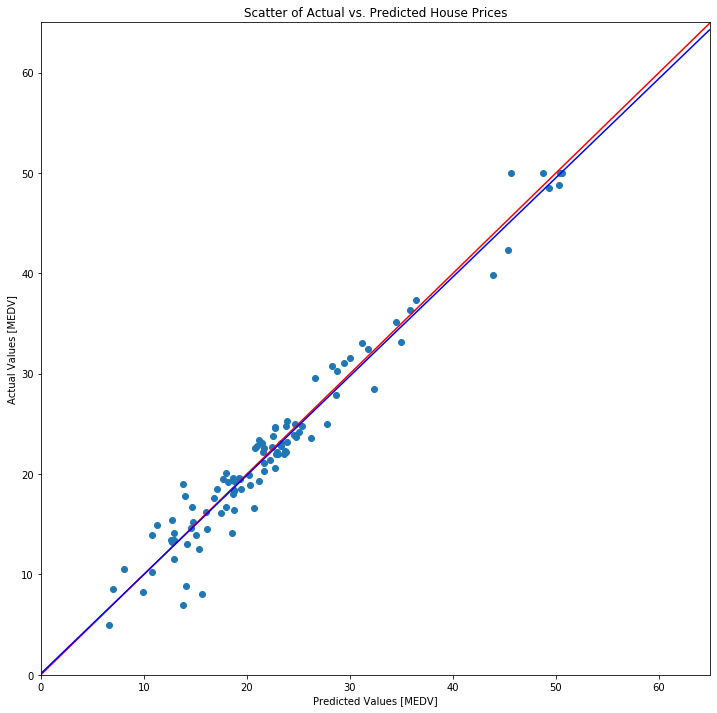

101/101 [==============================] - 0s 2ms/sample - loss: 4.6022 - mean_squared_error: 4.6022 - mean_absolute_error: 1.6405
The r-squared value for this evaluation is:  0.956
The slope of the line in this evaluation is:  0.988
The y-intercept in this evaluation is;  0.116
Loss:  4.602198553557443
Mean squared error:  4.6021986
Mean absolute error:  1.6404825


In [67]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_8)

That seems to have improved the model - but it's not as accurate for lower values - note the scatter of the data points for values below 20k. The mean absolute error is not too bad for this model which would hint that it is making reasonable predictions. We will now test the model with 10 hidden layers to evaluate the impact.

#### Modelling 10 Hidden Layers

In [68]:
# build the model
model_9 = build_model(64,'sigmoid',10,train_dataset)
# compile the model define the loss function and optimiser
model_9.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_9.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/sample - loss: 542.2104 - mean_squared_error: 542.2103 - mean_absolute_error: 21.5095
Epoch 2/1000
405/405 [==============================] - 0s 137us/sample - loss: 473.9963 - mean_squared_error: 473.9963 - mean_absolute_error: 19.8455
Epoch 3/1000
405/405 [==============================] - 0s 139us/sample - loss: 412.5938 - mean_squared_error: 412.5938 - mean_absolute_error: 18.2456
Epoch 4/1000
405/405 [==============================] - 0s 138us/sample - loss: 366.3422 - mean_squared_error: 366.3422 - mean_absolute_error: 16.9132
Epoch 5/1000
405/405 [==============================] - 0s 135us/sample - loss: 333.4588 - mean_squared_error: 333.4588 - mean_absolute_error: 15.9470
Epoch 6/1000
405/405 [==============================] - 0s 133us/sample - loss: 309.9795 - mean_squared_error: 309.9795 - mean_absolute_error: 15.2083
Epoch 7/1000
405/405 [==============================] - 0s 154us/sample - loss: 290.6612 - mean_

405/405 [==============================] - 0s 135us/sample - loss: 80.0466 - mean_squared_error: 80.0466 - mean_absolute_error: 6.4022
Epoch 56/1000
405/405 [==============================] - 0s 126us/sample - loss: 79.9935 - mean_squared_error: 79.9935 - mean_absolute_error: 6.4088
Epoch 57/1000
405/405 [==============================] - 0s 125us/sample - loss: 79.9320 - mean_squared_error: 79.9320 - mean_absolute_error: 6.4139
Epoch 58/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.8912 - mean_squared_error: 79.8912 - mean_absolute_error: 6.4202
Epoch 59/1000
405/405 [==============================] - 0s 175us/sample - loss: 79.8598 - mean_squared_error: 79.8598 - mean_absolute_error: 6.4271
Epoch 60/1000
405/405 [==============================] - 0s 194us/sample - loss: 79.8323 - mean_squared_error: 79.8323 - mean_absolute_error: 6.4322
Epoch 61/1000
405/405 [==============================] - 0s 190us/sample - loss: 79.8006 - mean_squared_error: 79.8006 -

405/405 [==============================] - 0s 138us/sample - loss: 79.7109 - mean_squared_error: 79.7109 - mean_absolute_error: 6.4861
Epoch 111/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.7019 - mean_squared_error: 79.7019 - mean_absolute_error: 6.4861
Epoch 112/1000
405/405 [==============================] - 0s 126us/sample - loss: 79.7412 - mean_squared_error: 79.7412 - mean_absolute_error: 6.4823
Epoch 113/1000
405/405 [==============================] - 0s 133us/sample - loss: 79.7252 - mean_squared_error: 79.7252 - mean_absolute_error: 6.4863
Epoch 114/1000
405/405 [==============================] - 0s 133us/sample - loss: 79.7090 - mean_squared_error: 79.7090 - mean_absolute_error: 6.4896
Epoch 115/1000
405/405 [==============================] - 0s 168us/sample - loss: 79.7121 - mean_squared_error: 79.7121 - mean_absolute_error: 6.4885
Epoch 116/1000
405/405 [==============================] - 0s 166us/sample - loss: 79.7319 - mean_squared_error: 79.

405/405 [==============================] - 0s 138us/sample - loss: 79.7075 - mean_squared_error: 79.7075 - mean_absolute_error: 6.4904
Epoch 165/1000
405/405 [==============================] - 0s 127us/sample - loss: 79.7317 - mean_squared_error: 79.7317 - mean_absolute_error: 6.4869
Epoch 166/1000
405/405 [==============================] - 0s 132us/sample - loss: 79.7078 - mean_squared_error: 79.7078 - mean_absolute_error: 6.4859
Epoch 167/1000
405/405 [==============================] - 0s 177us/sample - loss: 79.7048 - mean_squared_error: 79.7048 - mean_absolute_error: 6.4864
Epoch 168/1000
405/405 [==============================] - 0s 180us/sample - loss: 79.7054 - mean_squared_error: 79.7054 - mean_absolute_error: 6.4877
Epoch 169/1000
405/405 [==============================] - 0s 163us/sample - loss: 79.7067 - mean_squared_error: 79.7067 - mean_absolute_error: 6.4896
Epoch 170/1000
405/405 [==============================] - 0s 163us/sample - loss: 79.7042 - mean_squared_error: 79.

405/405 [==============================] - 0s 130us/sample - loss: 79.7149 - mean_squared_error: 79.7149 - mean_absolute_error: 6.4808
Epoch 219/1000
405/405 [==============================] - 0s 134us/sample - loss: 79.7140 - mean_squared_error: 79.7140 - mean_absolute_error: 6.4797
Epoch 220/1000
405/405 [==============================] - 0s 135us/sample - loss: 79.7183 - mean_squared_error: 79.7183 - mean_absolute_error: 6.4869
Epoch 221/1000
405/405 [==============================] - 0s 128us/sample - loss: 79.7098 - mean_squared_error: 79.7098 - mean_absolute_error: 6.4874
Epoch 222/1000
405/405 [==============================] - 0s 133us/sample - loss: 79.7062 - mean_squared_error: 79.7062 - mean_absolute_error: 6.4869
Epoch 223/1000
405/405 [==============================] - 0s 141us/sample - loss: 79.7033 - mean_squared_error: 79.7033 - mean_absolute_error: 6.4855
Epoch 224/1000
405/405 [==============================] - 0s 137us/sample - loss: 79.7139 - mean_squared_error: 79.

405/405 [==============================] - 0s 133us/sample - loss: 79.7391 - mean_squared_error: 79.7391 - mean_absolute_error: 6.4824
Epoch 273/1000
405/405 [==============================] - 0s 127us/sample - loss: 79.7052 - mean_squared_error: 79.7052 - mean_absolute_error: 6.4824
Epoch 274/1000
405/405 [==============================] - 0s 123us/sample - loss: 79.7238 - mean_squared_error: 79.7238 - mean_absolute_error: 6.4819
Epoch 275/1000
405/405 [==============================] - 0s 126us/sample - loss: 79.7093 - mean_squared_error: 79.7093 - mean_absolute_error: 6.4858
Epoch 276/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.7036 - mean_squared_error: 79.7036 - mean_absolute_error: 6.4873
Epoch 277/1000
405/405 [==============================] - 0s 127us/sample - loss: 79.7122 - mean_squared_error: 79.7122 - mean_absolute_error: 6.4873
Epoch 278/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.7170 - mean_squared_error: 79.

405/405 [==============================] - 0s 126us/sample - loss: 79.7221 - mean_squared_error: 79.7221 - mean_absolute_error: 6.4870
Epoch 327/1000
405/405 [==============================] - 0s 128us/sample - loss: 79.7292 - mean_squared_error: 79.7292 - mean_absolute_error: 6.4891
Epoch 328/1000
405/405 [==============================] - 0s 127us/sample - loss: 79.7089 - mean_squared_error: 79.7089 - mean_absolute_error: 6.4865
Epoch 329/1000
405/405 [==============================] - 0s 132us/sample - loss: 79.7111 - mean_squared_error: 79.7111 - mean_absolute_error: 6.4915
Epoch 330/1000
405/405 [==============================] - 0s 131us/sample - loss: 79.7469 - mean_squared_error: 79.7469 - mean_absolute_error: 6.4962
Epoch 331/1000
405/405 [==============================] - 0s 125us/sample - loss: 79.7448 - mean_squared_error: 79.7448 - mean_absolute_error: 6.4897
Epoch 332/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.7110 - mean_squared_error: 79.

405/405 [==============================] - 0s 126us/sample - loss: 79.7281 - mean_squared_error: 79.7281 - mean_absolute_error: 6.4935
Epoch 381/1000
405/405 [==============================] - 0s 135us/sample - loss: 79.7160 - mean_squared_error: 79.7160 - mean_absolute_error: 6.4932
Epoch 382/1000
405/405 [==============================] - 0s 131us/sample - loss: 79.7193 - mean_squared_error: 79.7193 - mean_absolute_error: 6.4916
Epoch 383/1000
405/405 [==============================] - 0s 128us/sample - loss: 79.7158 - mean_squared_error: 79.7158 - mean_absolute_error: 6.4876
Epoch 384/1000
405/405 [==============================] - 0s 128us/sample - loss: 79.7265 - mean_squared_error: 79.7265 - mean_absolute_error: 6.4940
Epoch 385/1000
405/405 [==============================] - 0s 123us/sample - loss: 79.7323 - mean_squared_error: 79.7322 - mean_absolute_error: 6.4910
Epoch 386/1000
405/405 [==============================] - 0s 130us/sample - loss: 79.7039 - mean_squared_error: 79.

405/405 [==============================] - 0s 143us/sample - loss: 79.7121 - mean_squared_error: 79.7121 - mean_absolute_error: 6.4939
Epoch 435/1000
405/405 [==============================] - 0s 158us/sample - loss: 79.8320 - mean_squared_error: 79.8320 - mean_absolute_error: 6.4781
Epoch 436/1000
405/405 [==============================] - 0s 141us/sample - loss: 79.7181 - mean_squared_error: 79.7181 - mean_absolute_error: 6.4753
Epoch 437/1000
405/405 [==============================] - 0s 156us/sample - loss: 79.7260 - mean_squared_error: 79.7260 - mean_absolute_error: 6.4820
Epoch 438/1000
405/405 [==============================] - 0s 134us/sample - loss: 79.7201 - mean_squared_error: 79.7201 - mean_absolute_error: 6.4861
Epoch 439/1000
405/405 [==============================] - 0s 140us/sample - loss: 79.7042 - mean_squared_error: 79.7042 - mean_absolute_error: 6.4833
Epoch 440/1000
405/405 [==============================] - 0s 135us/sample - loss: 79.7149 - mean_squared_error: 79.

405/405 [==============================] - 0s 141us/sample - loss: 79.7322 - mean_squared_error: 79.7322 - mean_absolute_error: 6.4832
Epoch 489/1000
405/405 [==============================] - 0s 143us/sample - loss: 79.7130 - mean_squared_error: 79.7130 - mean_absolute_error: 6.4835
Epoch 490/1000
405/405 [==============================] - 0s 186us/sample - loss: 79.7205 - mean_squared_error: 79.7206 - mean_absolute_error: 6.4817
Epoch 491/1000
405/405 [==============================] - 0s 191us/sample - loss: 79.7305 - mean_squared_error: 79.7305 - mean_absolute_error: 6.4779
Epoch 492/1000
405/405 [==============================] - 0s 184us/sample - loss: 79.7258 - mean_squared_error: 79.7258 - mean_absolute_error: 6.4802
Epoch 493/1000
405/405 [==============================] - 0s 152us/sample - loss: 79.7596 - mean_squared_error: 79.7596 - mean_absolute_error: 6.4941
Epoch 494/1000
405/405 [==============================] - 0s 136us/sample - loss: 79.7232 - mean_squared_error: 79.

405/405 [==============================] - 0s 139us/sample - loss: 41.4650 - mean_squared_error: 41.4650 - mean_absolute_error: 4.6349
Epoch 543/1000
405/405 [==============================] - 0s 142us/sample - loss: 40.9376 - mean_squared_error: 40.9376 - mean_absolute_error: 4.6660
Epoch 544/1000
405/405 [==============================] - 0s 153us/sample - loss: 40.0861 - mean_squared_error: 40.0861 - mean_absolute_error: 4.5769
Epoch 545/1000
405/405 [==============================] - 0s 134us/sample - loss: 40.6198 - mean_squared_error: 40.6198 - mean_absolute_error: 4.5405
Epoch 546/1000
405/405 [==============================] - 0s 131us/sample - loss: 40.0553 - mean_squared_error: 40.0553 - mean_absolute_error: 4.6567
Epoch 547/1000
405/405 [==============================] - 0s 135us/sample - loss: 39.7779 - mean_squared_error: 39.7779 - mean_absolute_error: 4.6014
Epoch 548/1000
405/405 [==============================] - 0s 142us/sample - loss: 39.1957 - mean_squared_error: 39.

405/405 [==============================] - 0s 137us/sample - loss: 20.4008 - mean_squared_error: 20.4008 - mean_absolute_error: 3.0257
Epoch 597/1000
405/405 [==============================] - 0s 139us/sample - loss: 20.1002 - mean_squared_error: 20.1002 - mean_absolute_error: 3.0465
Epoch 598/1000
405/405 [==============================] - 0s 133us/sample - loss: 20.9832 - mean_squared_error: 20.9832 - mean_absolute_error: 3.0759
Epoch 599/1000
405/405 [==============================] - 0s 129us/sample - loss: 20.9076 - mean_squared_error: 20.9076 - mean_absolute_error: 3.0364
Epoch 600/1000
405/405 [==============================] - 0s 133us/sample - loss: 19.7075 - mean_squared_error: 19.7075 - mean_absolute_error: 2.9810
Epoch 601/1000
405/405 [==============================] - 0s 127us/sample - loss: 19.6206 - mean_squared_error: 19.6206 - mean_absolute_error: 2.9734
Epoch 602/1000
405/405 [==============================] - 0s 136us/sample - loss: 19.4738 - mean_squared_error: 19.

405/405 [==============================] - 0s 132us/sample - loss: 14.7498 - mean_squared_error: 14.7498 - mean_absolute_error: 2.6313
Epoch 651/1000
405/405 [==============================] - 0s 144us/sample - loss: 14.9310 - mean_squared_error: 14.9310 - mean_absolute_error: 2.6573
Epoch 652/1000
405/405 [==============================] - 0s 138us/sample - loss: 14.7274 - mean_squared_error: 14.7274 - mean_absolute_error: 2.6470
Epoch 653/1000
405/405 [==============================] - 0s 136us/sample - loss: 15.5455 - mean_squared_error: 15.5455 - mean_absolute_error: 2.6836
Epoch 654/1000
405/405 [==============================] - 0s 136us/sample - loss: 15.3399 - mean_squared_error: 15.3399 - mean_absolute_error: 2.6967
Epoch 655/1000
405/405 [==============================] - 0s 131us/sample - loss: 14.7875 - mean_squared_error: 14.7875 - mean_absolute_error: 2.6148
Epoch 656/1000
405/405 [==============================] - 0s 131us/sample - loss: 14.7710 - mean_squared_error: 14.

405/405 [==============================] - 0s 159us/sample - loss: 13.1472 - mean_squared_error: 13.1472 - mean_absolute_error: 2.4499
Epoch 705/1000
405/405 [==============================] - 0s 141us/sample - loss: 13.1119 - mean_squared_error: 13.1119 - mean_absolute_error: 2.4420
Epoch 706/1000
405/405 [==============================] - 0s 135us/sample - loss: 13.1584 - mean_squared_error: 13.1584 - mean_absolute_error: 2.4583
Epoch 707/1000
405/405 [==============================] - 0s 140us/sample - loss: 13.1969 - mean_squared_error: 13.1969 - mean_absolute_error: 2.4496
Epoch 708/1000
405/405 [==============================] - 0s 142us/sample - loss: 13.3918 - mean_squared_error: 13.3918 - mean_absolute_error: 2.4797
Epoch 709/1000
405/405 [==============================] - 0s 130us/sample - loss: 13.3752 - mean_squared_error: 13.3752 - mean_absolute_error: 2.4684
Epoch 710/1000
405/405 [==============================] - 0s 129us/sample - loss: 13.2068 - mean_squared_error: 13.

405/405 [==============================] - 0s 165us/sample - loss: 12.3351 - mean_squared_error: 12.3351 - mean_absolute_error: 2.3467
Epoch 759/1000
405/405 [==============================] - 0s 150us/sample - loss: 12.4462 - mean_squared_error: 12.4462 - mean_absolute_error: 2.3324
Epoch 760/1000
405/405 [==============================] - 0s 137us/sample - loss: 12.4242 - mean_squared_error: 12.4242 - mean_absolute_error: 2.3291
Epoch 761/1000
405/405 [==============================] - 0s 142us/sample - loss: 13.1279 - mean_squared_error: 13.1279 - mean_absolute_error: 2.4449
Epoch 762/1000
405/405 [==============================] - 0s 136us/sample - loss: 13.5143 - mean_squared_error: 13.5143 - mean_absolute_error: 2.5350
Epoch 763/1000
405/405 [==============================] - 0s 136us/sample - loss: 12.9752 - mean_squared_error: 12.9752 - mean_absolute_error: 2.4101
Epoch 764/1000
405/405 [==============================] - 0s 134us/sample - loss: 12.7872 - mean_squared_error: 12.

405/405 [==============================] - 0s 135us/sample - loss: 12.0292 - mean_squared_error: 12.0292 - mean_absolute_error: 2.2949
Epoch 813/1000
405/405 [==============================] - 0s 153us/sample - loss: 11.8632 - mean_squared_error: 11.8632 - mean_absolute_error: 2.2904
Epoch 814/1000
405/405 [==============================] - 0s 187us/sample - loss: 11.9874 - mean_squared_error: 11.9874 - mean_absolute_error: 2.2909
Epoch 815/1000
405/405 [==============================] - 0s 134us/sample - loss: 12.0402 - mean_squared_error: 12.0402 - mean_absolute_error: 2.3030
Epoch 816/1000
405/405 [==============================] - 0s 136us/sample - loss: 12.0306 - mean_squared_error: 12.0306 - mean_absolute_error: 2.3519
Epoch 817/1000
405/405 [==============================] - 0s 134us/sample - loss: 11.7599 - mean_squared_error: 11.7599 - mean_absolute_error: 2.2890
Epoch 818/1000
405/405 [==============================] - 0s 132us/sample - loss: 11.8172 - mean_squared_error: 11.

405/405 [==============================] - 0s 135us/sample - loss: 10.8785 - mean_squared_error: 10.8785 - mean_absolute_error: 2.2366
Epoch 867/1000
405/405 [==============================] - 0s 154us/sample - loss: 10.7789 - mean_squared_error: 10.7789 - mean_absolute_error: 2.1710
Epoch 868/1000
405/405 [==============================] - 0s 139us/sample - loss: 10.8763 - mean_squared_error: 10.8763 - mean_absolute_error: 2.2548
Epoch 869/1000
405/405 [==============================] - 0s 143us/sample - loss: 11.0931 - mean_squared_error: 11.0931 - mean_absolute_error: 2.2288
Epoch 870/1000
405/405 [==============================] - 0s 143us/sample - loss: 10.7143 - mean_squared_error: 10.7143 - mean_absolute_error: 2.2041
Epoch 871/1000
405/405 [==============================] - 0s 144us/sample - loss: 10.9042 - mean_squared_error: 10.9042 - mean_absolute_error: 2.2351
Epoch 872/1000
405/405 [==============================] - 0s 151us/sample - loss: 10.9322 - mean_squared_error: 10.

405/405 [==============================] - 0s 140us/sample - loss: 9.7405 - mean_squared_error: 9.7405 - mean_absolute_error: 2.1676
Epoch 922/1000
405/405 [==============================] - 0s 138us/sample - loss: 9.6184 - mean_squared_error: 9.6184 - mean_absolute_error: 2.1760
Epoch 923/1000
405/405 [==============================] - 0s 139us/sample - loss: 9.5457 - mean_squared_error: 9.5457 - mean_absolute_error: 2.1294
Epoch 924/1000
405/405 [==============================] - 0s 145us/sample - loss: 9.1231 - mean_squared_error: 9.1231 - mean_absolute_error: 2.0941
Epoch 925/1000
405/405 [==============================] - 0s 148us/sample - loss: 9.2549 - mean_squared_error: 9.2549 - mean_absolute_error: 2.1407
Epoch 926/1000
405/405 [==============================] - 0s 137us/sample - loss: 9.1433 - mean_squared_error: 9.1433 - mean_absolute_error: 2.1169
Epoch 927/1000
405/405 [==============================] - 0s 147us/sample - loss: 9.0744 - mean_squared_error: 9.0744 - mean_ab

Epoch 976/1000
405/405 [==============================] - 0s 146us/sample - loss: 8.9703 - mean_squared_error: 8.9703 - mean_absolute_error: 2.0953
Epoch 977/1000
405/405 [==============================] - 0s 160us/sample - loss: 8.9317 - mean_squared_error: 8.9317 - mean_absolute_error: 2.0786
Epoch 978/1000
405/405 [==============================] - 0s 144us/sample - loss: 8.9037 - mean_squared_error: 8.9037 - mean_absolute_error: 2.0489
Epoch 979/1000
405/405 [==============================] - 0s 130us/sample - loss: 9.0647 - mean_squared_error: 9.0647 - mean_absolute_error: 2.1325
Epoch 980/1000
405/405 [==============================] - 0s 139us/sample - loss: 9.2535 - mean_squared_error: 9.2535 - mean_absolute_error: 2.1112
Epoch 981/1000
405/405 [==============================] - 0s 143us/sample - loss: 9.3967 - mean_squared_error: 9.3967 - mean_absolute_error: 2.2211
Epoch 982/1000
405/405 [==============================] - 0s 178us/sample - loss: 9.6562 - mean_squared_error: 9

And then evaluate:

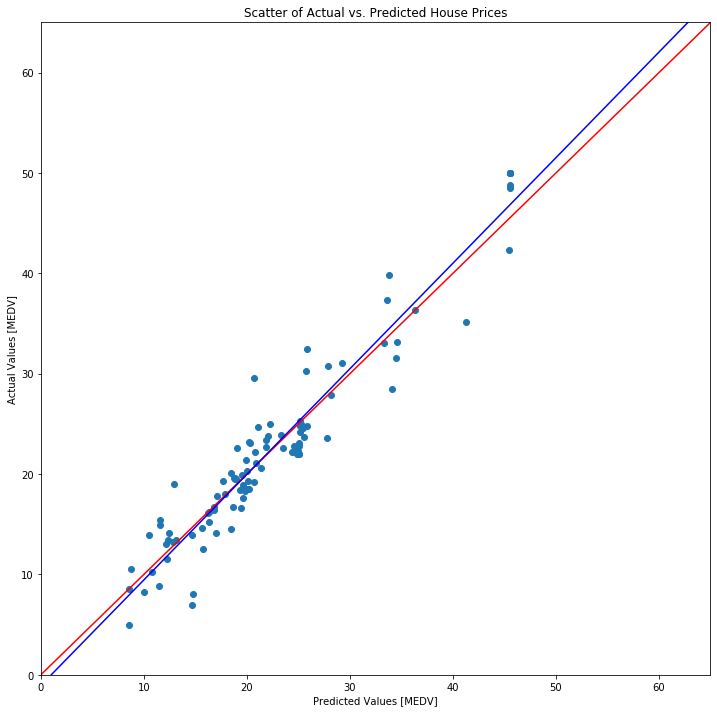

101/101 [==============================] - 0s 2ms/sample - loss: 8.3234 - mean_squared_error: 8.3234 - mean_absolute_error: 2.2100
The r-squared value for this evaluation is:  0.922
The slope of the line in this evaluation is:  1.052
The y-intercept in this evaluation is;  -1.065
Loss:  8.323394964237025
Mean squared error:  8.323395
Mean absolute error:  2.209979


In [69]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_9)

Adding more layers has not improved the model. The mean absolute error is over 2 and the $r^2$ value for the correlation between the actual and predicted values is poor. Next, we can look at changing the number of neurons per layer. So far we have only considered 64 neurons per layer. In this section we will test 10 and 100.

#### Modelling 10 Neurons per Layer

In this section we will build and evaluate a model with 10 neurons per layer, we will used 2 hidden layers, and the sigmoid function and the adam optimser.

In [70]:
# build the model
model_10 = build_model(10,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_10.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_10.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 1ms/sample - loss: 640.7014 - mean_squared_error: 640.7014 - mean_absolute_error: 23.6900
Epoch 2/1000
405/405 [==============================] - 0s 90us/sample - loss: 632.6593 - mean_squared_error: 632.6593 - mean_absolute_error: 23.5257
Epoch 3/1000
405/405 [==============================] - 0s 95us/sample - loss: 624.9509 - mean_squared_error: 624.9509 - mean_absolute_error: 23.3656
Epoch 4/1000
405/405 [==============================] - 0s 81us/sample - loss: 617.5199 - mean_squared_error: 617.5199 - mean_absolute_error: 23.2097
Epoch 5/1000
405/405 [==============================] - 0s 89us/sample - loss: 610.2663 - mean_squared_error: 610.2663 - mean_absolute_error: 23.0597
Epoch 6/1000
405/405 [==============================] - 0s 80us/sample - loss: 603.4907 - mean_squared_error: 603.4907 - mean_absolute_error: 22.9145
Epoch 7/1000
405/405 [==============================] - 0s 93us/sample - loss: 596.8581 - mean_square

405/405 [==============================] - 0s 75us/sample - loss: 409.3435 - mean_squared_error: 409.3435 - mean_absolute_error: 18.1968
Epoch 56/1000
405/405 [==============================] - 0s 75us/sample - loss: 405.2142 - mean_squared_error: 405.2142 - mean_absolute_error: 18.0815
Epoch 57/1000
405/405 [==============================] - 0s 75us/sample - loss: 401.0628 - mean_squared_error: 401.0628 - mean_absolute_error: 17.9675
Epoch 58/1000
405/405 [==============================] - 0s 72us/sample - loss: 397.0064 - mean_squared_error: 397.0064 - mean_absolute_error: 17.8551
Epoch 59/1000
405/405 [==============================] - 0s 71us/sample - loss: 393.0902 - mean_squared_error: 393.0901 - mean_absolute_error: 17.7434
Epoch 60/1000
405/405 [==============================] - 0s 69us/sample - loss: 389.1454 - mean_squared_error: 389.1454 - mean_absolute_error: 17.6331
Epoch 61/1000
405/405 [==============================] - 0s 67us/sample - loss: 385.3432 - mean_squared_erro

405/405 [==============================] - 0s 76us/sample - loss: 245.5365 - mean_squared_error: 245.5365 - mean_absolute_error: 13.0471
Epoch 110/1000
405/405 [==============================] - 0s 79us/sample - loss: 241.7328 - mean_squared_error: 241.7328 - mean_absolute_error: 12.9158
Epoch 111/1000
405/405 [==============================] - 0s 76us/sample - loss: 238.0591 - mean_squared_error: 238.0591 - mean_absolute_error: 12.7822
Epoch 112/1000
405/405 [==============================] - 0s 70us/sample - loss: 234.2968 - mean_squared_error: 234.2968 - mean_absolute_error: 12.6462
Epoch 113/1000
405/405 [==============================] - 0s 78us/sample - loss: 230.4947 - mean_squared_error: 230.4947 - mean_absolute_error: 12.5129
Epoch 114/1000
405/405 [==============================] - 0s 85us/sample - loss: 226.9186 - mean_squared_error: 226.9187 - mean_absolute_error: 12.3783
Epoch 115/1000
405/405 [==============================] - 0s 86us/sample - loss: 223.1892 - mean_square

405/405 [==============================] - 0s 92us/sample - loss: 106.2533 - mean_squared_error: 106.2533 - mean_absolute_error: 7.1875
Epoch 164/1000
405/405 [==============================] - 0s 85us/sample - loss: 105.0414 - mean_squared_error: 105.0414 - mean_absolute_error: 7.1255
Epoch 165/1000
405/405 [==============================] - 0s 77us/sample - loss: 103.9045 - mean_squared_error: 103.9045 - mean_absolute_error: 7.0650
Epoch 166/1000
405/405 [==============================] - 0s 85us/sample - loss: 102.7687 - mean_squared_error: 102.7687 - mean_absolute_error: 7.0076
Epoch 167/1000
405/405 [==============================] - 0s 79us/sample - loss: 101.6471 - mean_squared_error: 101.6471 - mean_absolute_error: 6.9504
Epoch 168/1000
405/405 [==============================] - 0s 76us/sample - loss: 100.5834 - mean_squared_error: 100.5834 - mean_absolute_error: 6.8960
Epoch 169/1000
405/405 [==============================] - 0s 83us/sample - loss: 99.5285 - mean_squared_error

405/405 [==============================] - 0s 79us/sample - loss: 66.7038 - mean_squared_error: 66.7038 - mean_absolute_error: 5.1222
Epoch 219/1000
405/405 [==============================] - 0s 80us/sample - loss: 66.2713 - mean_squared_error: 66.2713 - mean_absolute_error: 5.1025
Epoch 220/1000
405/405 [==============================] - 0s 67us/sample - loss: 65.8706 - mean_squared_error: 65.8706 - mean_absolute_error: 5.0831
Epoch 221/1000
405/405 [==============================] - 0s 68us/sample - loss: 65.4651 - mean_squared_error: 65.4651 - mean_absolute_error: 5.0666
Epoch 222/1000
405/405 [==============================] - 0s 80us/sample - loss: 65.0738 - mean_squared_error: 65.0738 - mean_absolute_error: 5.0470
Epoch 223/1000
405/405 [==============================] - 0s 80us/sample - loss: 64.6781 - mean_squared_error: 64.6781 - mean_absolute_error: 5.0295
Epoch 224/1000
405/405 [==============================] - 0s 73us/sample - loss: 64.2934 - mean_squared_error: 64.2934 - 

405/405 [==============================] - 0s 69us/sample - loss: 51.6835 - mean_squared_error: 51.6835 - mean_absolute_error: 4.5920
Epoch 274/1000
405/405 [==============================] - 0s 68us/sample - loss: 51.5270 - mean_squared_error: 51.5270 - mean_absolute_error: 4.5892
Epoch 275/1000
405/405 [==============================] - 0s 67us/sample - loss: 51.3577 - mean_squared_error: 51.3577 - mean_absolute_error: 4.5839
Epoch 276/1000
405/405 [==============================] - 0s 67us/sample - loss: 51.2228 - mean_squared_error: 51.2228 - mean_absolute_error: 4.5820
Epoch 277/1000
405/405 [==============================] - 0s 66us/sample - loss: 51.0681 - mean_squared_error: 51.0681 - mean_absolute_error: 4.5799
Epoch 278/1000
405/405 [==============================] - 0s 66us/sample - loss: 50.9096 - mean_squared_error: 50.9096 - mean_absolute_error: 4.5762
Epoch 279/1000
405/405 [==============================] - 0s 74us/sample - loss: 50.7568 - mean_squared_error: 50.7568 - 

405/405 [==============================] - 0s 69us/sample - loss: 45.2701 - mean_squared_error: 45.2701 - mean_absolute_error: 4.5244
Epoch 329/1000
405/405 [==============================] - 0s 69us/sample - loss: 45.1653 - mean_squared_error: 45.1653 - mean_absolute_error: 4.5218
Epoch 330/1000
405/405 [==============================] - 0s 69us/sample - loss: 45.0669 - mean_squared_error: 45.0669 - mean_absolute_error: 4.5193
Epoch 331/1000
405/405 [==============================] - 0s 73us/sample - loss: 44.9595 - mean_squared_error: 44.9595 - mean_absolute_error: 4.5173
Epoch 332/1000
405/405 [==============================] - 0s 72us/sample - loss: 44.8476 - mean_squared_error: 44.8476 - mean_absolute_error: 4.5116
Epoch 333/1000
405/405 [==============================] - 0s 74us/sample - loss: 44.7510 - mean_squared_error: 44.7510 - mean_absolute_error: 4.5094
Epoch 334/1000
405/405 [==============================] - 0s 71us/sample - loss: 44.6357 - mean_squared_error: 44.6357 - 

405/405 [==============================] - 0s 71us/sample - loss: 37.7070 - mean_squared_error: 37.7070 - mean_absolute_error: 4.0314
Epoch 384/1000
405/405 [==============================] - 0s 79us/sample - loss: 37.5552 - mean_squared_error: 37.5552 - mean_absolute_error: 4.0231
Epoch 385/1000
405/405 [==============================] - 0s 70us/sample - loss: 37.3691 - mean_squared_error: 37.3691 - mean_absolute_error: 4.0082
Epoch 386/1000
405/405 [==============================] - 0s 71us/sample - loss: 37.1936 - mean_squared_error: 37.1936 - mean_absolute_error: 3.9897
Epoch 387/1000
405/405 [==============================] - 0s 71us/sample - loss: 37.0241 - mean_squared_error: 37.0241 - mean_absolute_error: 3.9781
Epoch 388/1000
405/405 [==============================] - 0s 67us/sample - loss: 36.8607 - mean_squared_error: 36.8607 - mean_absolute_error: 3.9676
Epoch 389/1000
405/405 [==============================] - 0s 66us/sample - loss: 36.6898 - mean_squared_error: 36.6898 - 

405/405 [==============================] - 0s 75us/sample - loss: 29.2138 - mean_squared_error: 29.2138 - mean_absolute_error: 3.4707
Epoch 439/1000
405/405 [==============================] - 0s 73us/sample - loss: 29.0862 - mean_squared_error: 29.0862 - mean_absolute_error: 3.4605
Epoch 440/1000
405/405 [==============================] - 0s 71us/sample - loss: 28.9711 - mean_squared_error: 28.9711 - mean_absolute_error: 3.4523
Epoch 441/1000
405/405 [==============================] - 0s 67us/sample - loss: 28.8137 - mean_squared_error: 28.8137 - mean_absolute_error: 3.4438
Epoch 442/1000
405/405 [==============================] - 0s 67us/sample - loss: 28.6985 - mean_squared_error: 28.6985 - mean_absolute_error: 3.4378
Epoch 443/1000
405/405 [==============================] - 0s 66us/sample - loss: 28.5809 - mean_squared_error: 28.5809 - mean_absolute_error: 3.4246
Epoch 444/1000
405/405 [==============================] - 0s 71us/sample - loss: 28.4299 - mean_squared_error: 28.4299 - 

405/405 [==============================] - 0s 73us/sample - loss: 22.9640 - mean_squared_error: 22.9640 - mean_absolute_error: 3.0929
Epoch 494/1000
405/405 [==============================] - 0s 70us/sample - loss: 22.8771 - mean_squared_error: 22.8771 - mean_absolute_error: 3.0940
Epoch 495/1000
405/405 [==============================] - 0s 67us/sample - loss: 22.7710 - mean_squared_error: 22.7710 - mean_absolute_error: 3.0877
Epoch 496/1000
405/405 [==============================] - 0s 76us/sample - loss: 22.6875 - mean_squared_error: 22.6875 - mean_absolute_error: 3.0818
Epoch 497/1000
405/405 [==============================] - 0s 67us/sample - loss: 22.6066 - mean_squared_error: 22.6066 - mean_absolute_error: 3.0700
Epoch 498/1000
405/405 [==============================] - 0s 71us/sample - loss: 22.5088 - mean_squared_error: 22.5088 - mean_absolute_error: 3.0608
Epoch 499/1000
405/405 [==============================] - 0s 66us/sample - loss: 22.4121 - mean_squared_error: 22.4121 - 

405/405 [==============================] - 0s 83us/sample - loss: 18.7509 - mean_squared_error: 18.7509 - mean_absolute_error: 2.8507
Epoch 549/1000
405/405 [==============================] - 0s 72us/sample - loss: 18.6927 - mean_squared_error: 18.6927 - mean_absolute_error: 2.8417
Epoch 550/1000
405/405 [==============================] - 0s 78us/sample - loss: 18.6293 - mean_squared_error: 18.6293 - mean_absolute_error: 2.8369
Epoch 551/1000
405/405 [==============================] - 0s 76us/sample - loss: 18.5551 - mean_squared_error: 18.5551 - mean_absolute_error: 2.8299
Epoch 552/1000
405/405 [==============================] - 0s 92us/sample - loss: 18.5131 - mean_squared_error: 18.5131 - mean_absolute_error: 2.8303
Epoch 553/1000
405/405 [==============================] - 0s 79us/sample - loss: 18.4359 - mean_squared_error: 18.4359 - mean_absolute_error: 2.8272
Epoch 554/1000
405/405 [==============================] - 0s 84us/sample - loss: 18.3882 - mean_squared_error: 18.3882 - 

405/405 [==============================] - 0s 82us/sample - loss: 15.7827 - mean_squared_error: 15.7827 - mean_absolute_error: 2.6483
Epoch 604/1000
405/405 [==============================] - 0s 84us/sample - loss: 15.7468 - mean_squared_error: 15.7468 - mean_absolute_error: 2.6460
Epoch 605/1000
405/405 [==============================] - 0s 78us/sample - loss: 15.6931 - mean_squared_error: 15.6931 - mean_absolute_error: 2.6438
Epoch 606/1000
405/405 [==============================] - 0s 76us/sample - loss: 15.6467 - mean_squared_error: 15.6467 - mean_absolute_error: 2.6377
Epoch 607/1000
405/405 [==============================] - 0s 82us/sample - loss: 15.6028 - mean_squared_error: 15.6028 - mean_absolute_error: 2.6349
Epoch 608/1000
405/405 [==============================] - 0s 79us/sample - loss: 15.5589 - mean_squared_error: 15.5589 - mean_absolute_error: 2.6304
Epoch 609/1000
405/405 [==============================] - 0s 73us/sample - loss: 15.5162 - mean_squared_error: 15.5162 - 

405/405 [==============================] - 0s 71us/sample - loss: 13.7284 - mean_squared_error: 13.7284 - mean_absolute_error: 2.5079
Epoch 659/1000
405/405 [==============================] - 0s 83us/sample - loss: 13.7068 - mean_squared_error: 13.7068 - mean_absolute_error: 2.5124
Epoch 660/1000
405/405 [==============================] - 0s 70us/sample - loss: 13.6564 - mean_squared_error: 13.6564 - mean_absolute_error: 2.5114
Epoch 661/1000
405/405 [==============================] - 0s 69us/sample - loss: 13.6377 - mean_squared_error: 13.6377 - mean_absolute_error: 2.5114
Epoch 662/1000
405/405 [==============================] - 0s 68us/sample - loss: 13.6021 - mean_squared_error: 13.6021 - mean_absolute_error: 2.5058
Epoch 663/1000
405/405 [==============================] - 0s 71us/sample - loss: 13.5692 - mean_squared_error: 13.5692 - mean_absolute_error: 2.5004
Epoch 664/1000
405/405 [==============================] - 0s 71us/sample - loss: 13.5303 - mean_squared_error: 13.5303 - 

405/405 [==============================] - 0s 73us/sample - loss: 12.2308 - mean_squared_error: 12.2308 - mean_absolute_error: 2.4085
Epoch 714/1000
405/405 [==============================] - 0s 70us/sample - loss: 12.2151 - mean_squared_error: 12.2151 - mean_absolute_error: 2.4139
Epoch 715/1000
405/405 [==============================] - 0s 72us/sample - loss: 12.1928 - mean_squared_error: 12.1928 - mean_absolute_error: 2.4085
Epoch 716/1000
405/405 [==============================] - 0s 73us/sample - loss: 12.1669 - mean_squared_error: 12.1669 - mean_absolute_error: 2.4058
Epoch 717/1000
405/405 [==============================] - 0s 71us/sample - loss: 12.1416 - mean_squared_error: 12.1416 - mean_absolute_error: 2.4037
Epoch 718/1000
405/405 [==============================] - 0s 71us/sample - loss: 12.1138 - mean_squared_error: 12.1138 - mean_absolute_error: 2.4000
Epoch 719/1000
405/405 [==============================] - 0s 68us/sample - loss: 12.1016 - mean_squared_error: 12.1016 - 

405/405 [==============================] - 0s 70us/sample - loss: 11.1373 - mean_squared_error: 11.1373 - mean_absolute_error: 2.3230
Epoch 769/1000
405/405 [==============================] - 0s 75us/sample - loss: 11.1159 - mean_squared_error: 11.1159 - mean_absolute_error: 2.3234
Epoch 770/1000
405/405 [==============================] - 0s 77us/sample - loss: 11.1240 - mean_squared_error: 11.1240 - mean_absolute_error: 2.3277
Epoch 771/1000
405/405 [==============================] - 0s 69us/sample - loss: 11.0876 - mean_squared_error: 11.0876 - mean_absolute_error: 2.3223
Epoch 772/1000
405/405 [==============================] - 0s 70us/sample - loss: 11.0834 - mean_squared_error: 11.0834 - mean_absolute_error: 2.3190
Epoch 773/1000
405/405 [==============================] - 0s 67us/sample - loss: 11.0654 - mean_squared_error: 11.0654 - mean_absolute_error: 2.3207
Epoch 774/1000
405/405 [==============================] - 0s 73us/sample - loss: 11.0338 - mean_squared_error: 11.0338 - 

405/405 [==============================] - 0s 70us/sample - loss: 10.3066 - mean_squared_error: 10.3066 - mean_absolute_error: 2.2597
Epoch 824/1000
405/405 [==============================] - 0s 73us/sample - loss: 10.2914 - mean_squared_error: 10.2914 - mean_absolute_error: 2.2625
Epoch 825/1000
405/405 [==============================] - 0s 69us/sample - loss: 10.2951 - mean_squared_error: 10.2951 - mean_absolute_error: 2.2598
Epoch 826/1000
405/405 [==============================] - 0s 68us/sample - loss: 10.3012 - mean_squared_error: 10.3012 - mean_absolute_error: 2.2651
Epoch 827/1000
405/405 [==============================] - 0s 72us/sample - loss: 10.2605 - mean_squared_error: 10.2605 - mean_absolute_error: 2.2638
Epoch 828/1000
405/405 [==============================] - 0s 79us/sample - loss: 10.2532 - mean_squared_error: 10.2532 - mean_absolute_error: 2.2652
Epoch 829/1000
405/405 [==============================] - 0s 76us/sample - loss: 10.2221 - mean_squared_error: 10.2221 - 

405/405 [==============================] - 0s 70us/sample - loss: 9.6553 - mean_squared_error: 9.6553 - mean_absolute_error: 2.2034
Epoch 879/1000
405/405 [==============================] - 0s 70us/sample - loss: 9.6498 - mean_squared_error: 9.6498 - mean_absolute_error: 2.2040
Epoch 880/1000
405/405 [==============================] - 0s 70us/sample - loss: 9.6534 - mean_squared_error: 9.6534 - mean_absolute_error: 2.2099
Epoch 881/1000
405/405 [==============================] - 0s 72us/sample - loss: 9.6318 - mean_squared_error: 9.6318 - mean_absolute_error: 2.2081
Epoch 882/1000
405/405 [==============================] - 0s 71us/sample - loss: 9.6177 - mean_squared_error: 9.6177 - mean_absolute_error: 2.2075
Epoch 883/1000
405/405 [==============================] - 0s 70us/sample - loss: 9.6048 - mean_squared_error: 9.6048 - mean_absolute_error: 2.2057
Epoch 884/1000
405/405 [==============================] - 0s 74us/sample - loss: 9.5942 - mean_squared_error: 9.5942 - mean_absolute_

405/405 [==============================] - 0s 87us/sample - loss: 9.1384 - mean_squared_error: 9.1384 - mean_absolute_error: 2.1605
Epoch 934/1000
405/405 [==============================] - 0s 81us/sample - loss: 9.1182 - mean_squared_error: 9.1182 - mean_absolute_error: 2.1576
Epoch 935/1000
405/405 [==============================] - 0s 76us/sample - loss: 9.1028 - mean_squared_error: 9.1028 - mean_absolute_error: 2.1558
Epoch 936/1000
405/405 [==============================] - 0s 96us/sample - loss: 9.1108 - mean_squared_error: 9.1108 - mean_absolute_error: 2.1605
Epoch 937/1000
405/405 [==============================] - 0s 81us/sample - loss: 9.0856 - mean_squared_error: 9.0856 - mean_absolute_error: 2.1564
Epoch 938/1000
405/405 [==============================] - 0s 80us/sample - loss: 9.0828 - mean_squared_error: 9.0828 - mean_absolute_error: 2.1561
Epoch 939/1000
405/405 [==============================] - 0s 81us/sample - loss: 9.0761 - mean_squared_error: 9.0761 - mean_absolute_

405/405 [==============================] - 0s 80us/sample - loss: 8.6740 - mean_squared_error: 8.6740 - mean_absolute_error: 2.1250
Epoch 989/1000
405/405 [==============================] - 0s 90us/sample - loss: 8.6712 - mean_squared_error: 8.6712 - mean_absolute_error: 2.1207
Epoch 990/1000
405/405 [==============================] - 0s 83us/sample - loss: 8.6659 - mean_squared_error: 8.6659 - mean_absolute_error: 2.1203
Epoch 991/1000
405/405 [==============================] - 0s 89us/sample - loss: 8.6643 - mean_squared_error: 8.6643 - mean_absolute_error: 2.1244
Epoch 992/1000
405/405 [==============================] - 0s 95us/sample - loss: 8.6536 - mean_squared_error: 8.6536 - mean_absolute_error: 2.1232
Epoch 993/1000
405/405 [==============================] - 0s 87us/sample - loss: 8.6399 - mean_squared_error: 8.6399 - mean_absolute_error: 2.1183
Epoch 994/1000
405/405 [==============================] - 0s 75us/sample - loss: 8.6238 - mean_squared_error: 8.6238 - mean_absolute_

Then evaluate:

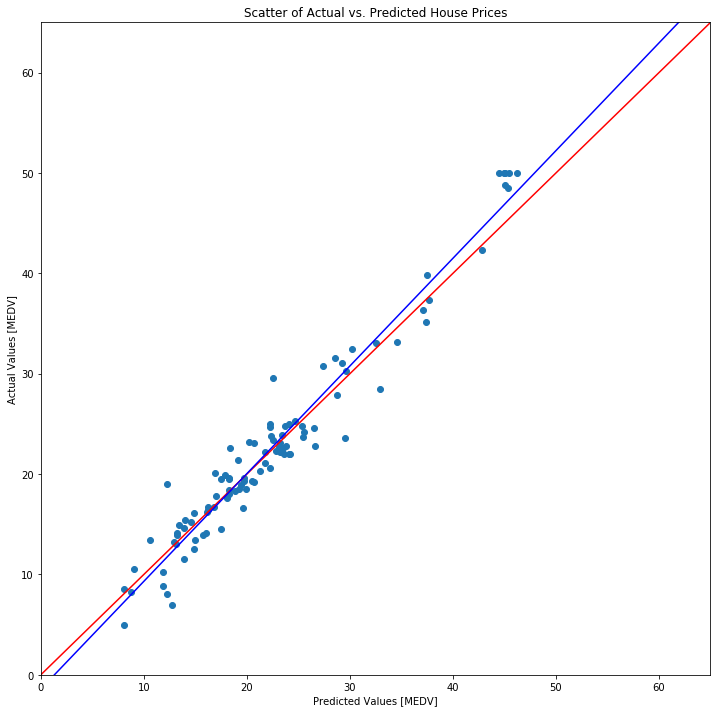

101/101 [==============================] - 0s 2ms/sample - loss: 5.8854 - mean_squared_error: 5.8854 - mean_absolute_error: 1.8496
The r-squared value for this evaluation is:  0.948
The slope of the line in this evaluation is:  1.073
The y-intercept in this evaluation is;  -1.415
Loss:  5.885433253675404
Mean squared error:  5.885433
Mean absolute error:  1.849566


In [71]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_10)

Using 10 neurons per layer has not improved the model. The $r^2$ is in line with previous predictions as is the mean absolute error. Next we will try 100 neurons per layer.

### Modelling 100 Neurons per Layer

In [72]:
# build the model
model_11 = build_model(100,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_11.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_11.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 973us/sample - loss: 559.6089 - mean_squared_error: 559.6089 - mean_absolute_error: 21.8854
Epoch 2/1000
405/405 [==============================] - 0s 117us/sample - loss: 461.6389 - mean_squared_error: 461.6389 - mean_absolute_error: 19.5472
Epoch 3/1000
405/405 [==============================] - 0s 96us/sample - loss: 389.0948 - mean_squared_error: 389.0948 - mean_absolute_error: 17.6496
Epoch 4/1000
405/405 [==============================] - 0s 113us/sample - loss: 338.4687 - mean_squared_error: 338.4688 - mean_absolute_error: 16.1824
Epoch 5/1000
405/405 [==============================] - 0s 94us/sample - loss: 301.9385 - mean_squared_error: 301.9385 - mean_absolute_error: 15.0220
Epoch 6/1000
405/405 [==============================] - 0s 93us/sample - loss: 272.3683 - mean_squared_error: 272.3683 - mean_absolute_error: 14.0578
Epoch 7/1000
405/405 [==============================] - 0s 133us/sample - loss: 248.0534 - mean_s

405/405 [==============================] - 0s 81us/sample - loss: 49.7044 - mean_squared_error: 49.7044 - mean_absolute_error: 4.7414
Epoch 56/1000
405/405 [==============================] - 0s 89us/sample - loss: 49.2694 - mean_squared_error: 49.2695 - mean_absolute_error: 4.7187
Epoch 57/1000
405/405 [==============================] - 0s 76us/sample - loss: 48.7827 - mean_squared_error: 48.7827 - mean_absolute_error: 4.6999
Epoch 58/1000
405/405 [==============================] - 0s 80us/sample - loss: 48.3810 - mean_squared_error: 48.3810 - mean_absolute_error: 4.7082
Epoch 59/1000
405/405 [==============================] - 0s 78us/sample - loss: 47.8757 - mean_squared_error: 47.8757 - mean_absolute_error: 4.6767
Epoch 60/1000
405/405 [==============================] - 0s 79us/sample - loss: 47.4869 - mean_squared_error: 47.4869 - mean_absolute_error: 4.6348
Epoch 61/1000
405/405 [==============================] - 0s 77us/sample - loss: 47.0055 - mean_squared_error: 47.0055 - mean_a

405/405 [==============================] - 0s 109us/sample - loss: 24.9016 - mean_squared_error: 24.9016 - mean_absolute_error: 3.2757
Epoch 111/1000
405/405 [==============================] - 0s 118us/sample - loss: 24.5817 - mean_squared_error: 24.5817 - mean_absolute_error: 3.2612
Epoch 112/1000
405/405 [==============================] - 0s 94us/sample - loss: 24.3189 - mean_squared_error: 24.3189 - mean_absolute_error: 3.2131
Epoch 113/1000
405/405 [==============================] - 0s 98us/sample - loss: 24.0874 - mean_squared_error: 24.0874 - mean_absolute_error: 3.2525
Epoch 114/1000
405/405 [==============================] - 0s 95us/sample - loss: 23.6712 - mean_squared_error: 23.6712 - mean_absolute_error: 3.1984
Epoch 115/1000
405/405 [==============================] - 0s 95us/sample - loss: 23.3966 - mean_squared_error: 23.3966 - mean_absolute_error: 3.1518
Epoch 116/1000
405/405 [==============================] - 0s 108us/sample - loss: 23.1749 - mean_squared_error: 23.1749

405/405 [==============================] - 0s 86us/sample - loss: 15.7941 - mean_squared_error: 15.7941 - mean_absolute_error: 2.7126
Epoch 165/1000
405/405 [==============================] - 0s 111us/sample - loss: 15.5929 - mean_squared_error: 15.5929 - mean_absolute_error: 2.6591
Epoch 166/1000
405/405 [==============================] - 0s 84us/sample - loss: 15.6045 - mean_squared_error: 15.6045 - mean_absolute_error: 2.6920
Epoch 167/1000
405/405 [==============================] - 0s 85us/sample - loss: 15.3950 - mean_squared_error: 15.3950 - mean_absolute_error: 2.6725
Epoch 168/1000
405/405 [==============================] - 0s 83us/sample - loss: 15.3917 - mean_squared_error: 15.3917 - mean_absolute_error: 2.6355
Epoch 169/1000
405/405 [==============================] - 0s 81us/sample - loss: 15.3641 - mean_squared_error: 15.3641 - mean_absolute_error: 2.6785
Epoch 170/1000
405/405 [==============================] - 0s 82us/sample - loss: 15.1967 - mean_squared_error: 15.1967 -

405/405 [==============================] - 0s 104us/sample - loss: 12.0107 - mean_squared_error: 12.0107 - mean_absolute_error: 2.4340
Epoch 219/1000
405/405 [==============================] - 0s 103us/sample - loss: 11.9687 - mean_squared_error: 11.9687 - mean_absolute_error: 2.4478
Epoch 220/1000
405/405 [==============================] - 0s 87us/sample - loss: 11.8861 - mean_squared_error: 11.8861 - mean_absolute_error: 2.4451
Epoch 221/1000
405/405 [==============================] - 0s 107us/sample - loss: 11.8345 - mean_squared_error: 11.8345 - mean_absolute_error: 2.4273
Epoch 222/1000
405/405 [==============================] - 0s 102us/sample - loss: 11.7930 - mean_squared_error: 11.7930 - mean_absolute_error: 2.4301
Epoch 223/1000
405/405 [==============================] - 0s 99us/sample - loss: 11.6767 - mean_squared_error: 11.6767 - mean_absolute_error: 2.4085
Epoch 224/1000
405/405 [==============================] - 0s 108us/sample - loss: 11.6468 - mean_squared_error: 11.64

405/405 [==============================] - 0s 119us/sample - loss: 9.4301 - mean_squared_error: 9.4301 - mean_absolute_error: 2.2104
Epoch 273/1000
405/405 [==============================] - 0s 131us/sample - loss: 9.5709 - mean_squared_error: 9.5709 - mean_absolute_error: 2.2394
Epoch 274/1000
405/405 [==============================] - 0s 108us/sample - loss: 9.4050 - mean_squared_error: 9.4050 - mean_absolute_error: 2.2341
Epoch 275/1000
405/405 [==============================] - 0s 95us/sample - loss: 9.4624 - mean_squared_error: 9.4623 - mean_absolute_error: 2.2463
Epoch 276/1000
405/405 [==============================] - 0s 100us/sample - loss: 9.3305 - mean_squared_error: 9.3305 - mean_absolute_error: 2.2163
Epoch 277/1000
405/405 [==============================] - 0s 82us/sample - loss: 9.2543 - mean_squared_error: 9.2543 - mean_absolute_error: 2.1943
Epoch 278/1000
405/405 [==============================] - 0s 91us/sample - loss: 9.2470 - mean_squared_error: 9.2470 - mean_absol

405/405 [==============================] - 0s 117us/sample - loss: 7.7707 - mean_squared_error: 7.7707 - mean_absolute_error: 2.0312
Epoch 328/1000
405/405 [==============================] - 0s 94us/sample - loss: 7.7361 - mean_squared_error: 7.7361 - mean_absolute_error: 2.0623
Epoch 329/1000
405/405 [==============================] - 0s 86us/sample - loss: 7.6379 - mean_squared_error: 7.6379 - mean_absolute_error: 2.0205
Epoch 330/1000
405/405 [==============================] - 0s 86us/sample - loss: 7.5866 - mean_squared_error: 7.5866 - mean_absolute_error: 2.0099
Epoch 331/1000
405/405 [==============================] - 0s 85us/sample - loss: 7.5825 - mean_squared_error: 7.5825 - mean_absolute_error: 2.0275
Epoch 332/1000
405/405 [==============================] - 0s 86us/sample - loss: 7.5756 - mean_squared_error: 7.5756 - mean_absolute_error: 2.0241
Epoch 333/1000
405/405 [==============================] - 0s 86us/sample - loss: 7.5225 - mean_squared_error: 7.5225 - mean_absolute

405/405 [==============================] - 0s 85us/sample - loss: 6.4658 - mean_squared_error: 6.4658 - mean_absolute_error: 1.8598
Epoch 383/1000
405/405 [==============================] - 0s 89us/sample - loss: 6.4660 - mean_squared_error: 6.4660 - mean_absolute_error: 1.8700
Epoch 384/1000
405/405 [==============================] - 0s 83us/sample - loss: 6.4397 - mean_squared_error: 6.4397 - mean_absolute_error: 1.8548
Epoch 385/1000
405/405 [==============================] - 0s 86us/sample - loss: 6.4669 - mean_squared_error: 6.4669 - mean_absolute_error: 1.8794
Epoch 386/1000
405/405 [==============================] - 0s 83us/sample - loss: 6.3706 - mean_squared_error: 6.3706 - mean_absolute_error: 1.8576
Epoch 387/1000
405/405 [==============================] - 0s 86us/sample - loss: 6.3859 - mean_squared_error: 6.3859 - mean_absolute_error: 1.8498
Epoch 388/1000
405/405 [==============================] - 0s 81us/sample - loss: 6.3551 - mean_squared_error: 6.3551 - mean_absolute_

405/405 [==============================] - 0s 129us/sample - loss: 5.6592 - mean_squared_error: 5.6592 - mean_absolute_error: 1.7278
Epoch 438/1000
405/405 [==============================] - 0s 128us/sample - loss: 5.6851 - mean_squared_error: 5.6851 - mean_absolute_error: 1.7421
Epoch 439/1000
405/405 [==============================] - 0s 77us/sample - loss: 5.5885 - mean_squared_error: 5.5885 - mean_absolute_error: 1.7224
Epoch 440/1000
405/405 [==============================] - 0s 80us/sample - loss: 5.6179 - mean_squared_error: 5.6179 - mean_absolute_error: 1.7175
Epoch 441/1000
405/405 [==============================] - 0s 85us/sample - loss: 5.5702 - mean_squared_error: 5.5702 - mean_absolute_error: 1.7199
Epoch 442/1000
405/405 [==============================] - 0s 82us/sample - loss: 5.5541 - mean_squared_error: 5.5541 - mean_absolute_error: 1.7093
Epoch 443/1000
405/405 [==============================] - 0s 83us/sample - loss: 5.6383 - mean_squared_error: 5.6383 - mean_absolut

405/405 [==============================] - 0s 115us/sample - loss: 5.0584 - mean_squared_error: 5.0584 - mean_absolute_error: 1.6574
Epoch 493/1000
405/405 [==============================] - 0s 104us/sample - loss: 5.0250 - mean_squared_error: 5.0250 - mean_absolute_error: 1.6359
Epoch 494/1000
405/405 [==============================] - 0s 80us/sample - loss: 5.0108 - mean_squared_error: 5.0108 - mean_absolute_error: 1.6331
Epoch 495/1000
405/405 [==============================] - 0s 85us/sample - loss: 4.9734 - mean_squared_error: 4.9734 - mean_absolute_error: 1.6291
Epoch 496/1000
405/405 [==============================] - 0s 81us/sample - loss: 4.9835 - mean_squared_error: 4.9835 - mean_absolute_error: 1.6257
Epoch 497/1000
405/405 [==============================] - 0s 86us/sample - loss: 5.0288 - mean_squared_error: 5.0288 - mean_absolute_error: 1.6536
Epoch 498/1000
405/405 [==============================] - 0s 81us/sample - loss: 5.0097 - mean_squared_error: 5.0097 - mean_absolut

405/405 [==============================] - 0s 100us/sample - loss: 4.5629 - mean_squared_error: 4.5629 - mean_absolute_error: 1.5764
Epoch 548/1000
405/405 [==============================] - 0s 131us/sample - loss: 4.5503 - mean_squared_error: 4.5503 - mean_absolute_error: 1.5494
Epoch 549/1000
405/405 [==============================] - 0s 106us/sample - loss: 4.5363 - mean_squared_error: 4.5363 - mean_absolute_error: 1.5588
Epoch 550/1000
405/405 [==============================] - 0s 104us/sample - loss: 4.5185 - mean_squared_error: 4.5185 - mean_absolute_error: 1.5498
Epoch 551/1000
405/405 [==============================] - 0s 99us/sample - loss: 4.5203 - mean_squared_error: 4.5203 - mean_absolute_error: 1.5561
Epoch 552/1000
405/405 [==============================] - 0s 97us/sample - loss: 4.5414 - mean_squared_error: 4.5414 - mean_absolute_error: 1.5685
Epoch 553/1000
405/405 [==============================] - 0s 105us/sample - loss: 4.5108 - mean_squared_error: 4.5108 - mean_abso

405/405 [==============================] - 0s 112us/sample - loss: 4.1654 - mean_squared_error: 4.1654 - mean_absolute_error: 1.4865
Epoch 603/1000
405/405 [==============================] - 0s 95us/sample - loss: 4.1621 - mean_squared_error: 4.1621 - mean_absolute_error: 1.4867
Epoch 604/1000
405/405 [==============================] - 0s 92us/sample - loss: 4.1365 - mean_squared_error: 4.1365 - mean_absolute_error: 1.4984
Epoch 605/1000
405/405 [==============================] - 0s 85us/sample - loss: 4.1161 - mean_squared_error: 4.1161 - mean_absolute_error: 1.4887
Epoch 606/1000
405/405 [==============================] - 0s 91us/sample - loss: 4.1222 - mean_squared_error: 4.1222 - mean_absolute_error: 1.4795
Epoch 607/1000
405/405 [==============================] - 0s 94us/sample - loss: 4.1327 - mean_squared_error: 4.1327 - mean_absolute_error: 1.4813
Epoch 608/1000
405/405 [==============================] - 0s 85us/sample - loss: 4.1016 - mean_squared_error: 4.1016 - mean_absolute

405/405 [==============================] - 0s 83us/sample - loss: 3.8094 - mean_squared_error: 3.8094 - mean_absolute_error: 1.4304
Epoch 658/1000
405/405 [==============================] - 0s 79us/sample - loss: 3.8307 - mean_squared_error: 3.8307 - mean_absolute_error: 1.4331
Epoch 659/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.7847 - mean_squared_error: 3.7847 - mean_absolute_error: 1.4333
Epoch 660/1000
405/405 [==============================] - 0s 82us/sample - loss: 3.7913 - mean_squared_error: 3.7913 - mean_absolute_error: 1.4235
Epoch 661/1000
405/405 [==============================] - 0s 80us/sample - loss: 3.7771 - mean_squared_error: 3.7771 - mean_absolute_error: 1.4215
Epoch 662/1000
405/405 [==============================] - 0s 80us/sample - loss: 3.7843 - mean_squared_error: 3.7843 - mean_absolute_error: 1.4318
Epoch 663/1000
405/405 [==============================] - 0s 75us/sample - loss: 3.7773 - mean_squared_error: 3.7773 - mean_absolute_

405/405 [==============================] - 0s 83us/sample - loss: 3.5009 - mean_squared_error: 3.5009 - mean_absolute_error: 1.3846
Epoch 713/1000
405/405 [==============================] - 0s 85us/sample - loss: 3.5249 - mean_squared_error: 3.5249 - mean_absolute_error: 1.3779
Epoch 714/1000
405/405 [==============================] - 0s 77us/sample - loss: 3.4541 - mean_squared_error: 3.4541 - mean_absolute_error: 1.3637
Epoch 715/1000
405/405 [==============================] - 0s 81us/sample - loss: 3.4614 - mean_squared_error: 3.4614 - mean_absolute_error: 1.3507
Epoch 716/1000
405/405 [==============================] - 0s 77us/sample - loss: 3.5654 - mean_squared_error: 3.5654 - mean_absolute_error: 1.3922
Epoch 717/1000
405/405 [==============================] - 0s 76us/sample - loss: 3.4516 - mean_squared_error: 3.4516 - mean_absolute_error: 1.3594
Epoch 718/1000
405/405 [==============================] - 0s 81us/sample - loss: 3.4694 - mean_squared_error: 3.4694 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 3.1956 - mean_squared_error: 3.1956 - mean_absolute_error: 1.3061
Epoch 768/1000
405/405 [==============================] - 0s 84us/sample - loss: 3.1862 - mean_squared_error: 3.1862 - mean_absolute_error: 1.3238
Epoch 769/1000
405/405 [==============================] - 0s 77us/sample - loss: 3.1623 - mean_squared_error: 3.1623 - mean_absolute_error: 1.3017
Epoch 770/1000
405/405 [==============================] - 0s 81us/sample - loss: 3.1641 - mean_squared_error: 3.1641 - mean_absolute_error: 1.3218
Epoch 771/1000
405/405 [==============================] - 0s 78us/sample - loss: 3.1686 - mean_squared_error: 3.1686 - mean_absolute_error: 1.3051
Epoch 772/1000
405/405 [==============================] - 0s 76us/sample - loss: 3.1853 - mean_squared_error: 3.1853 - mean_absolute_error: 1.3117
Epoch 773/1000
405/405 [==============================] - 0s 82us/sample - loss: 3.1469 - mean_squared_error: 3.1469 - mean_absolute_

405/405 [==============================] - 0s 83us/sample - loss: 2.9391 - mean_squared_error: 2.9391 - mean_absolute_error: 1.2732
Epoch 823/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.9214 - mean_squared_error: 2.9214 - mean_absolute_error: 1.2756
Epoch 824/1000
405/405 [==============================] - 0s 77us/sample - loss: 3.0868 - mean_squared_error: 3.0868 - mean_absolute_error: 1.2935
Epoch 825/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.9420 - mean_squared_error: 2.9420 - mean_absolute_error: 1.2572
Epoch 826/1000
405/405 [==============================] - 0s 90us/sample - loss: 2.9908 - mean_squared_error: 2.9908 - mean_absolute_error: 1.2753
Epoch 827/1000
405/405 [==============================] - 0s 82us/sample - loss: 2.9451 - mean_squared_error: 2.9451 - mean_absolute_error: 1.2623
Epoch 828/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.8947 - mean_squared_error: 2.8947 - mean_absolute_

405/405 [==============================] - 0s 79us/sample - loss: 2.6911 - mean_squared_error: 2.6911 - mean_absolute_error: 1.2108
Epoch 878/1000
405/405 [==============================] - 0s 89us/sample - loss: 2.7097 - mean_squared_error: 2.7097 - mean_absolute_error: 1.2123
Epoch 879/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.6978 - mean_squared_error: 2.6978 - mean_absolute_error: 1.2036
Epoch 880/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.6407 - mean_squared_error: 2.6407 - mean_absolute_error: 1.1839
Epoch 881/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.6823 - mean_squared_error: 2.6823 - mean_absolute_error: 1.2122
Epoch 882/1000
405/405 [==============================] - 0s 80us/sample - loss: 2.6804 - mean_squared_error: 2.6804 - mean_absolute_error: 1.1928
Epoch 883/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.6761 - mean_squared_error: 2.6761 - mean_absolute_

405/405 [==============================] - 0s 81us/sample - loss: 2.5492 - mean_squared_error: 2.5492 - mean_absolute_error: 1.1903
Epoch 933/1000
405/405 [==============================] - 0s 88us/sample - loss: 2.5089 - mean_squared_error: 2.5089 - mean_absolute_error: 1.1516
Epoch 934/1000
405/405 [==============================] - 0s 76us/sample - loss: 2.4371 - mean_squared_error: 2.4371 - mean_absolute_error: 1.1409
Epoch 935/1000
405/405 [==============================] - 0s 119us/sample - loss: 2.4558 - mean_squared_error: 2.4558 - mean_absolute_error: 1.1541
Epoch 936/1000
405/405 [==============================] - 0s 120us/sample - loss: 2.4290 - mean_squared_error: 2.4290 - mean_absolute_error: 1.1428
Epoch 937/1000
405/405 [==============================] - 0s 70us/sample - loss: 2.5009 - mean_squared_error: 2.5009 - mean_absolute_error: 1.1609
Epoch 938/1000
405/405 [==============================] - 0s 71us/sample - loss: 2.4334 - mean_squared_error: 2.4334 - mean_absolut

405/405 [==============================] - 0s 77us/sample - loss: 2.2806 - mean_squared_error: 2.2806 - mean_absolute_error: 1.0880
Epoch 988/1000
405/405 [==============================] - 0s 81us/sample - loss: 2.3346 - mean_squared_error: 2.3346 - mean_absolute_error: 1.1008
Epoch 989/1000
405/405 [==============================] - 0s 77us/sample - loss: 2.3651 - mean_squared_error: 2.3651 - mean_absolute_error: 1.1461
Epoch 990/1000
405/405 [==============================] - 0s 87us/sample - loss: 2.3422 - mean_squared_error: 2.3422 - mean_absolute_error: 1.1408
Epoch 991/1000
405/405 [==============================] - 0s 75us/sample - loss: 2.3336 - mean_squared_error: 2.3336 - mean_absolute_error: 1.1231
Epoch 992/1000
405/405 [==============================] - 0s 78us/sample - loss: 2.2573 - mean_squared_error: 2.2573 - mean_absolute_error: 1.0910
Epoch 993/1000
405/405 [==============================] - 0s 81us/sample - loss: 2.2627 - mean_squared_error: 2.2627 - mean_absolute_

Then evaluate:

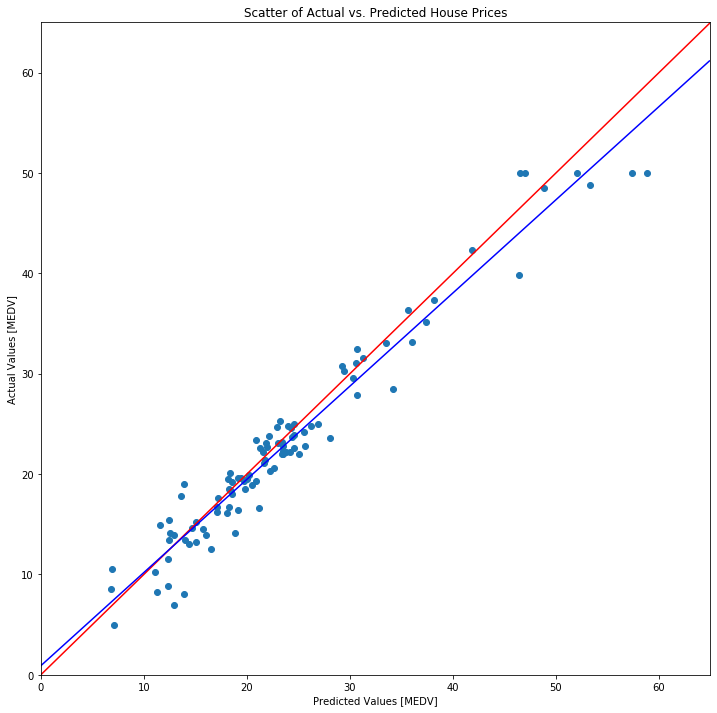

101/101 [==============================] - 0s 2ms/sample - loss: 6.4882 - mean_squared_error: 6.4882 - mean_absolute_error: 1.8780
The r-squared value for this evaluation is:  0.949
The slope of the line in this evaluation is:  0.929
The y-intercept in this evaluation is;  0.904
Loss:  6.488221423460706
Mean squared error:  6.4882216
Mean absolute error:  1.877981


In [73]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_11)

So adding more neurons has not made a significant difference to the model. Overall, the 2 things which seem to have had the biggest impact on the performance was the number of hidden layers, and using the hyperbolic tan activation function. The next step is to combine this to see if it makes for a good model.

#### Optimised Model using the entire dataset

From the experimentation I have learned the following for this dataset:
* tanh activation function performs best
* 10 hiddens layers seems to be a goods fit
* 64 neurons per layer seems about right
* the 'adam' optimiser works best

Pulling this all together we can see does it gives us a better model:

In [74]:
# build the model
model_12 = build_model(64,'tanh',10,train_dataset)
# compile the model define the loss function and optimiser
model_12.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_12.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 1s 2ms/sample - loss: 519.8371 - mean_squared_error: 519.8372 - mean_absolute_error: 21.3378
Epoch 2/1000
405/405 [==============================] - 0s 166us/sample - loss: 367.5385 - mean_squared_error: 367.5385 - mean_absolute_error: 17.3611
Epoch 3/1000
405/405 [==============================] - 0s 164us/sample - loss: 267.8828 - mean_squared_error: 267.8828 - mean_absolute_error: 13.8517
Epoch 4/1000
405/405 [==============================] - 0s 172us/sample - loss: 212.0720 - mean_squared_error: 212.0720 - mean_absolute_error: 11.7790
Epoch 5/1000
405/405 [==============================] - 0s 178us/sample - loss: 170.4096 - mean_squared_error: 170.4096 - mean_absolute_error: 10.1471
Epoch 6/1000
405/405 [==============================] - 0s 179us/sample - loss: 152.4353 - mean_squared_error: 152.4353 - mean_absolute_error: 9.4028
Epoch 7/1000
405/405 [==============================] - 0s 167us/sample - loss: 136.5753 - mean_s

405/405 [==============================] - 0s 136us/sample - loss: 79.7037 - mean_squared_error: 79.7037 - mean_absolute_error: 6.4869
Epoch 56/1000
405/405 [==============================] - 0s 132us/sample - loss: 79.7126 - mean_squared_error: 79.7126 - mean_absolute_error: 6.4887
Epoch 57/1000
405/405 [==============================] - 0s 131us/sample - loss: 79.7036 - mean_squared_error: 79.7036 - mean_absolute_error: 6.4868
Epoch 58/1000
405/405 [==============================] - 0s 129us/sample - loss: 79.7032 - mean_squared_error: 79.7032 - mean_absolute_error: 6.4849
Epoch 59/1000
405/405 [==============================] - 0s 178us/sample - loss: 79.7159 - mean_squared_error: 79.7159 - mean_absolute_error: 6.4883
Epoch 60/1000
405/405 [==============================] - 0s 195us/sample - loss: 79.7130 - mean_squared_error: 79.7130 - mean_absolute_error: 6.4853
Epoch 61/1000
405/405 [==============================] - 0s 181us/sample - loss: 79.7297 - mean_squared_error: 79.7297 -

405/405 [==============================] - 0s 185us/sample - loss: 12.7219 - mean_squared_error: 12.7219 - mean_absolute_error: 2.2286
Epoch 111/1000
405/405 [==============================] - 0s 174us/sample - loss: 12.5706 - mean_squared_error: 12.5706 - mean_absolute_error: 2.2629
Epoch 112/1000
405/405 [==============================] - 0s 157us/sample - loss: 12.1810 - mean_squared_error: 12.1810 - mean_absolute_error: 2.1757
Epoch 113/1000
405/405 [==============================] - 0s 164us/sample - loss: 12.0861 - mean_squared_error: 12.0861 - mean_absolute_error: 2.1872
Epoch 114/1000
405/405 [==============================] - 0s 159us/sample - loss: 13.6413 - mean_squared_error: 13.6413 - mean_absolute_error: 2.3710
Epoch 115/1000
405/405 [==============================] - 0s 166us/sample - loss: 12.6869 - mean_squared_error: 12.6869 - mean_absolute_error: 2.4076
Epoch 116/1000
405/405 [==============================] - 0s 136us/sample - loss: 12.4385 - mean_squared_error: 12.

405/405 [==============================] - 0s 163us/sample - loss: 7.9014 - mean_squared_error: 7.9014 - mean_absolute_error: 1.8196
Epoch 166/1000
405/405 [==============================] - 0s 185us/sample - loss: 6.5649 - mean_squared_error: 6.5649 - mean_absolute_error: 1.7711
Epoch 167/1000
405/405 [==============================] - 0s 146us/sample - loss: 6.1914 - mean_squared_error: 6.1914 - mean_absolute_error: 1.6911
Epoch 168/1000
405/405 [==============================] - 0s 144us/sample - loss: 6.4766 - mean_squared_error: 6.4766 - mean_absolute_error: 1.7297
Epoch 169/1000
405/405 [==============================] - 0s 180us/sample - loss: 6.1484 - mean_squared_error: 6.1484 - mean_absolute_error: 1.6937
Epoch 170/1000
405/405 [==============================] - 0s 168us/sample - loss: 5.8480 - mean_squared_error: 5.8480 - mean_absolute_error: 1.6168
Epoch 171/1000
405/405 [==============================] - 0s 159us/sample - loss: 5.9351 - mean_squared_error: 5.9351 - mean_ab

405/405 [==============================] - 0s 132us/sample - loss: 13.5851 - mean_squared_error: 13.5851 - mean_absolute_error: 2.6335
Epoch 221/1000
405/405 [==============================] - 0s 137us/sample - loss: 14.3657 - mean_squared_error: 14.3657 - mean_absolute_error: 2.7279
Epoch 222/1000
405/405 [==============================] - 0s 130us/sample - loss: 12.4752 - mean_squared_error: 12.4752 - mean_absolute_error: 2.4279
Epoch 223/1000
405/405 [==============================] - 0s 132us/sample - loss: 10.5711 - mean_squared_error: 10.5711 - mean_absolute_error: 2.2668
Epoch 224/1000
405/405 [==============================] - 0s 127us/sample - loss: 10.0704 - mean_squared_error: 10.0704 - mean_absolute_error: 2.2194
Epoch 225/1000
405/405 [==============================] - 0s 133us/sample - loss: 9.1828 - mean_squared_error: 9.1828 - mean_absolute_error: 2.0865
Epoch 226/1000
405/405 [==============================] - 0s 136us/sample - loss: 8.8428 - mean_squared_error: 8.8428

405/405 [==============================] - 0s 133us/sample - loss: 5.4024 - mean_squared_error: 5.4024 - mean_absolute_error: 1.5966
Epoch 276/1000
405/405 [==============================] - 0s 141us/sample - loss: 5.1884 - mean_squared_error: 5.1884 - mean_absolute_error: 1.5399
Epoch 277/1000
405/405 [==============================] - 0s 133us/sample - loss: 4.9736 - mean_squared_error: 4.9736 - mean_absolute_error: 1.4691
Epoch 278/1000
405/405 [==============================] - 0s 132us/sample - loss: 4.9035 - mean_squared_error: 4.9035 - mean_absolute_error: 1.4657
Epoch 279/1000
405/405 [==============================] - 0s 134us/sample - loss: 4.8681 - mean_squared_error: 4.8681 - mean_absolute_error: 1.4575
Epoch 280/1000
405/405 [==============================] - 0s 134us/sample - loss: 4.6935 - mean_squared_error: 4.6935 - mean_absolute_error: 1.3941
Epoch 281/1000
405/405 [==============================] - 0s 135us/sample - loss: 4.7252 - mean_squared_error: 4.7252 - mean_ab

405/405 [==============================] - 0s 134us/sample - loss: 4.7585 - mean_squared_error: 4.7585 - mean_absolute_error: 1.4087
Epoch 331/1000
405/405 [==============================] - 0s 139us/sample - loss: 4.1984 - mean_squared_error: 4.1984 - mean_absolute_error: 1.2836
Epoch 332/1000
405/405 [==============================] - 0s 136us/sample - loss: 4.0539 - mean_squared_error: 4.0539 - mean_absolute_error: 1.2488
Epoch 333/1000
405/405 [==============================] - 0s 134us/sample - loss: 4.0466 - mean_squared_error: 4.0466 - mean_absolute_error: 1.2336
Epoch 334/1000
405/405 [==============================] - 0s 135us/sample - loss: 4.0481 - mean_squared_error: 4.0481 - mean_absolute_error: 1.2297
Epoch 335/1000
405/405 [==============================] - 0s 133us/sample - loss: 3.9727 - mean_squared_error: 3.9727 - mean_absolute_error: 1.2081
Epoch 336/1000
405/405 [==============================] - 0s 130us/sample - loss: 3.9579 - mean_squared_error: 3.9579 - mean_ab

405/405 [==============================] - 0s 137us/sample - loss: 4.2348 - mean_squared_error: 4.2348 - mean_absolute_error: 1.2575
Epoch 386/1000
405/405 [==============================] - 0s 138us/sample - loss: 4.4261 - mean_squared_error: 4.4261 - mean_absolute_error: 1.3354
Epoch 387/1000
405/405 [==============================] - 0s 134us/sample - loss: 5.0214 - mean_squared_error: 5.0214 - mean_absolute_error: 1.3020
Epoch 388/1000
405/405 [==============================] - 0s 129us/sample - loss: 5.6894 - mean_squared_error: 5.6894 - mean_absolute_error: 1.3793
Epoch 389/1000
405/405 [==============================] - 0s 132us/sample - loss: 4.1997 - mean_squared_error: 4.1997 - mean_absolute_error: 1.3016
Epoch 390/1000
405/405 [==============================] - 0s 130us/sample - loss: 3.6379 - mean_squared_error: 3.6379 - mean_absolute_error: 1.2094
Epoch 391/1000
405/405 [==============================] - 0s 132us/sample - loss: 2.6011 - mean_squared_error: 2.6011 - mean_ab

405/405 [==============================] - 0s 134us/sample - loss: 1.5966 - mean_squared_error: 1.5966 - mean_absolute_error: 0.9033
Epoch 441/1000
405/405 [==============================] - 0s 138us/sample - loss: 1.3694 - mean_squared_error: 1.3694 - mean_absolute_error: 0.8557
Epoch 442/1000
405/405 [==============================] - 0s 131us/sample - loss: 1.3427 - mean_squared_error: 1.3427 - mean_absolute_error: 0.8521
Epoch 443/1000
405/405 [==============================] - 0s 132us/sample - loss: 1.2704 - mean_squared_error: 1.2704 - mean_absolute_error: 0.8147
Epoch 444/1000
405/405 [==============================] - 0s 135us/sample - loss: 1.5461 - mean_squared_error: 1.5461 - mean_absolute_error: 0.9271
Epoch 445/1000
405/405 [==============================] - 0s 129us/sample - loss: 1.4311 - mean_squared_error: 1.4311 - mean_absolute_error: 0.8887
Epoch 446/1000
405/405 [==============================] - 0s 129us/sample - loss: 1.3783 - mean_squared_error: 1.3783 - mean_ab

405/405 [==============================] - 0s 131us/sample - loss: 1.0924 - mean_squared_error: 1.0924 - mean_absolute_error: 0.7392
Epoch 496/1000
405/405 [==============================] - 0s 128us/sample - loss: 1.0452 - mean_squared_error: 1.0452 - mean_absolute_error: 0.7320
Epoch 497/1000
405/405 [==============================] - 0s 132us/sample - loss: 1.1699 - mean_squared_error: 1.1699 - mean_absolute_error: 0.7976
Epoch 498/1000
405/405 [==============================] - 0s 130us/sample - loss: 1.1986 - mean_squared_error: 1.1986 - mean_absolute_error: 0.7862
Epoch 499/1000
405/405 [==============================] - 0s 133us/sample - loss: 1.1296 - mean_squared_error: 1.1296 - mean_absolute_error: 0.7555
Epoch 500/1000
405/405 [==============================] - 0s 131us/sample - loss: 1.3594 - mean_squared_error: 1.3594 - mean_absolute_error: 0.8303
Epoch 501/1000
405/405 [==============================] - 0s 130us/sample - loss: 1.3557 - mean_squared_error: 1.3557 - mean_ab

405/405 [==============================] - 0s 148us/sample - loss: 0.9571 - mean_squared_error: 0.9571 - mean_absolute_error: 0.6907
Epoch 551/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.9576 - mean_squared_error: 0.9576 - mean_absolute_error: 0.7041
Epoch 552/1000
405/405 [==============================] - 0s 175us/sample - loss: 0.8903 - mean_squared_error: 0.8903 - mean_absolute_error: 0.6818
Epoch 553/1000
405/405 [==============================] - 0s 180us/sample - loss: 0.8875 - mean_squared_error: 0.8875 - mean_absolute_error: 0.6798
Epoch 554/1000
405/405 [==============================] - 0s 126us/sample - loss: 1.0023 - mean_squared_error: 1.0023 - mean_absolute_error: 0.7265
Epoch 555/1000
405/405 [==============================] - 0s 133us/sample - loss: 0.8475 - mean_squared_error: 0.8475 - mean_absolute_error: 0.6354
Epoch 556/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.8735 - mean_squared_error: 0.8735 - mean_ab

405/405 [==============================] - 0s 138us/sample - loss: 0.7700 - mean_squared_error: 0.7700 - mean_absolute_error: 0.6300
Epoch 606/1000
405/405 [==============================] - 0s 154us/sample - loss: 0.7373 - mean_squared_error: 0.7373 - mean_absolute_error: 0.6114
Epoch 607/1000
405/405 [==============================] - 0s 132us/sample - loss: 0.8507 - mean_squared_error: 0.8507 - mean_absolute_error: 0.6932
Epoch 608/1000
405/405 [==============================] - 0s 135us/sample - loss: 0.7303 - mean_squared_error: 0.7303 - mean_absolute_error: 0.6173
Epoch 609/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.7421 - mean_squared_error: 0.7421 - mean_absolute_error: 0.6230
Epoch 610/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.6292 - mean_squared_error: 0.6292 - mean_absolute_error: 0.5628
Epoch 611/1000
405/405 [==============================] - 0s 131us/sample - loss: 1.0158 - mean_squared_error: 1.0158 - mean_ab

405/405 [==============================] - 0s 160us/sample - loss: 0.6603 - mean_squared_error: 0.6603 - mean_absolute_error: 0.5937
Epoch 661/1000
405/405 [==============================] - 0s 142us/sample - loss: 0.5291 - mean_squared_error: 0.5291 - mean_absolute_error: 0.5365
Epoch 662/1000
405/405 [==============================] - 0s 135us/sample - loss: 0.4379 - mean_squared_error: 0.4379 - mean_absolute_error: 0.4851
Epoch 663/1000
405/405 [==============================] - 0s 134us/sample - loss: 0.4320 - mean_squared_error: 0.4320 - mean_absolute_error: 0.4896
Epoch 664/1000
405/405 [==============================] - 0s 136us/sample - loss: 0.4280 - mean_squared_error: 0.4280 - mean_absolute_error: 0.4738
Epoch 665/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.5114 - mean_squared_error: 0.5114 - mean_absolute_error: 0.5342
Epoch 666/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.5539 - mean_squared_error: 0.5539 - mean_ab

405/405 [==============================] - 0s 135us/sample - loss: 0.3546 - mean_squared_error: 0.3546 - mean_absolute_error: 0.4390
Epoch 716/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.3456 - mean_squared_error: 0.3456 - mean_absolute_error: 0.4348
Epoch 717/1000
405/405 [==============================] - 0s 129us/sample - loss: 0.4219 - mean_squared_error: 0.4219 - mean_absolute_error: 0.4843
Epoch 718/1000
405/405 [==============================] - 0s 130us/sample - loss: 0.5226 - mean_squared_error: 0.5226 - mean_absolute_error: 0.5670
Epoch 719/1000
405/405 [==============================] - 0s 128us/sample - loss: 0.4357 - mean_squared_error: 0.4357 - mean_absolute_error: 0.4939
Epoch 720/1000
405/405 [==============================] - 0s 132us/sample - loss: 0.3713 - mean_squared_error: 0.3713 - mean_absolute_error: 0.4466
Epoch 721/1000
405/405 [==============================] - 0s 134us/sample - loss: 0.3936 - mean_squared_error: 0.3936 - mean_ab

405/405 [==============================] - 0s 133us/sample - loss: 1.1449 - mean_squared_error: 1.1449 - mean_absolute_error: 0.7607
Epoch 771/1000
405/405 [==============================] - 0s 140us/sample - loss: 1.3163 - mean_squared_error: 1.3163 - mean_absolute_error: 0.7769
Epoch 772/1000
405/405 [==============================] - 0s 131us/sample - loss: 9.8052 - mean_squared_error: 9.8052 - mean_absolute_error: 1.5338
Epoch 773/1000
405/405 [==============================] - 0s 134us/sample - loss: 11.5849 - mean_squared_error: 11.5849 - mean_absolute_error: 2.2877
Epoch 774/1000
405/405 [==============================] - 0s 133us/sample - loss: 8.2181 - mean_squared_error: 8.2181 - mean_absolute_error: 2.1129
Epoch 775/1000
405/405 [==============================] - 0s 131us/sample - loss: 6.2861 - mean_squared_error: 6.2861 - mean_absolute_error: 1.7089
Epoch 776/1000
405/405 [==============================] - 0s 132us/sample - loss: 5.2190 - mean_squared_error: 5.2190 - mean_

405/405 [==============================] - 0s 128us/sample - loss: 0.1299 - mean_squared_error: 0.1299 - mean_absolute_error: 0.2588
Epoch 826/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.1408 - mean_squared_error: 0.1408 - mean_absolute_error: 0.2873
Epoch 827/1000
405/405 [==============================] - 0s 138us/sample - loss: 0.1276 - mean_squared_error: 0.1276 - mean_absolute_error: 0.2687
Epoch 828/1000
405/405 [==============================] - 0s 133us/sample - loss: 0.1277 - mean_squared_error: 0.1277 - mean_absolute_error: 0.2693
Epoch 829/1000
405/405 [==============================] - 0s 129us/sample - loss: 0.1209 - mean_squared_error: 0.1209 - mean_absolute_error: 0.2477
Epoch 830/1000
405/405 [==============================] - 0s 135us/sample - loss: 0.1292 - mean_squared_error: 0.1292 - mean_absolute_error: 0.2642
Epoch 831/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.1130 - mean_squared_error: 0.1130 - mean_ab

405/405 [==============================] - 0s 138us/sample - loss: 0.1260 - mean_squared_error: 0.1260 - mean_absolute_error: 0.2683
Epoch 881/1000
405/405 [==============================] - 0s 142us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - mean_absolute_error: 0.2352
Epoch 882/1000
405/405 [==============================] - 0s 137us/sample - loss: 0.1086 - mean_squared_error: 0.1086 - mean_absolute_error: 0.2434
Epoch 883/1000
405/405 [==============================] - 0s 133us/sample - loss: 0.1071 - mean_squared_error: 0.1071 - mean_absolute_error: 0.2383
Epoch 884/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - mean_absolute_error: 0.2261
Epoch 885/1000
405/405 [==============================] - 0s 129us/sample - loss: 0.0855 - mean_squared_error: 0.0855 - mean_absolute_error: 0.2164
Epoch 886/1000
405/405 [==============================] - 0s 135us/sample - loss: 0.0928 - mean_squared_error: 0.0928 - mean_ab

405/405 [==============================] - 0s 145us/sample - loss: 0.0907 - mean_squared_error: 0.0907 - mean_absolute_error: 0.2161
Epoch 935/1000
405/405 [==============================] - 0s 142us/sample - loss: 0.0865 - mean_squared_error: 0.0865 - mean_absolute_error: 0.2163
Epoch 936/1000
405/405 [==============================] - 0s 149us/sample - loss: 0.0765 - mean_squared_error: 0.0765 - mean_absolute_error: 0.1957
Epoch 937/1000
405/405 [==============================] - 0s 145us/sample - loss: 0.1017 - mean_squared_error: 0.1017 - mean_absolute_error: 0.2379
Epoch 938/1000
405/405 [==============================] - 0s 140us/sample - loss: 0.0881 - mean_squared_error: 0.0881 - mean_absolute_error: 0.2163
Epoch 939/1000
405/405 [==============================] - 0s 144us/sample - loss: 0.0812 - mean_squared_error: 0.0812 - mean_absolute_error: 0.2047
Epoch 940/1000
405/405 [==============================] - 0s 139us/sample - loss: 0.0868 - mean_squared_error: 0.0868 - mean_ab

405/405 [==============================] - 0s 134us/sample - loss: 0.5986 - mean_squared_error: 0.5986 - mean_absolute_error: 0.4571
Epoch 990/1000
405/405 [==============================] - 0s 132us/sample - loss: 0.6219 - mean_squared_error: 0.6219 - mean_absolute_error: 0.4674
Epoch 991/1000
405/405 [==============================] - 0s 132us/sample - loss: 0.4285 - mean_squared_error: 0.4285 - mean_absolute_error: 0.4353
Epoch 992/1000
405/405 [==============================] - 0s 131us/sample - loss: 0.3617 - mean_squared_error: 0.3617 - mean_absolute_error: 0.3752
Epoch 993/1000
405/405 [==============================] - 0s 134us/sample - loss: 0.3336 - mean_squared_error: 0.3336 - mean_absolute_error: 0.3613
Epoch 994/1000
405/405 [==============================] - 0s 132us/sample - loss: 0.3996 - mean_squared_error: 0.3996 - mean_absolute_error: 0.3890
Epoch 995/1000
405/405 [==============================] - 0s 130us/sample - loss: 0.3224 - mean_squared_error: 0.3224 - mean_ab

Then evaluate:

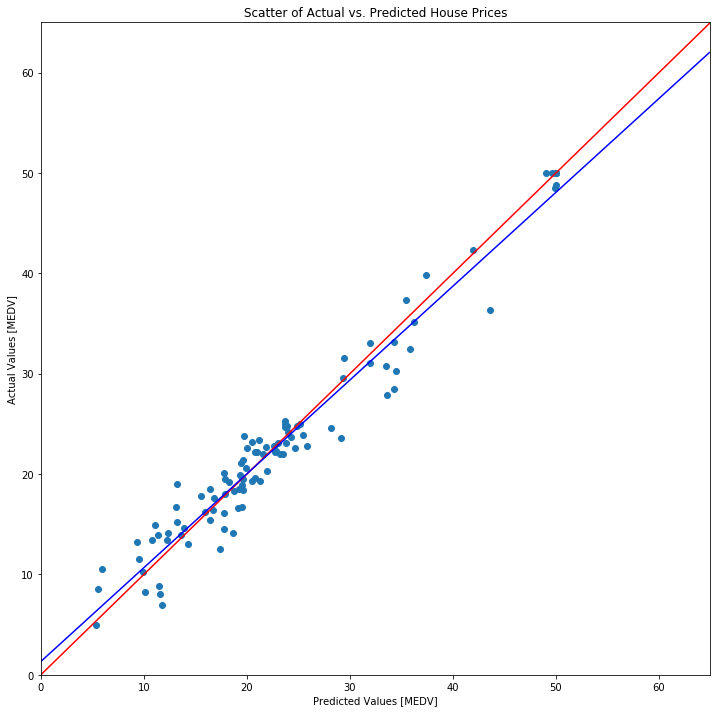

101/101 [==============================] - 0s 3ms/sample - loss: 5.7048 - mean_squared_error: 5.7048 - mean_absolute_error: 1.8145
The r-squared value for this evaluation is:  0.95
The slope of the line in this evaluation is:  0.935
The y-intercept in this evaluation is;  1.321
Loss:  5.704828488944781
Mean squared error:  5.7048287
Mean absolute error:  1.8145332


In [75]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_12)

The approach I took to tuning this model was to isolate the different aspects of the model and try to find which one works best. I then tried to pull all the best options for each feature together to see if this provided the best model overall. I wasn't surprised to find that this didn't give me the best solution! Training and tuning neural networks is tricky business and just because a particular activation function works well for a particular network shape - this is not to say that it will perform best once a different network shape is chosen.

Overall the best model I came across was model 3, where I used the tanh function with 2 hidden layers, 64 neurons per layer and the adam optimiser. 

### 4.4 Modifying the Dataset to improve the model

Until now, all of the models created have used the entire dataset for training. It might be possible to improve the performance of the model by using only some of the features. In the section 1 we looked at the relationships between the data and determined that the MEDV was correlated to both the LSTAT and RM features. In this section I'm going to try and train the model using only these features. In section 1 I created a new dataframe 'medv_df'. 

In [76]:
# select 80% of the dataset at random
train_dataset = medv_df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = medv_df.drop(train_dataset.index)

# check that the data is split correctly
print("There are %d data points in the entire set" % df["LSTAT"].count())
print("There are %d data points in the training set" % train_dataset["LSTAT"].count())
print("There are %d data points in the test set" % test_dataset["LSTAT"].count())

# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

# create the training stats for the normalisation 
# this allows up to find means and standard deviattions of each feature
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# normalise the 2 input datasets
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

There are 506 data points in the entire set
There are 405 data points in the training set
There are 101 data points in the test set


In [77]:
# build the model
model_13 = build_model(64,'sigmoid',2,train_dataset)
# compile the model define the loss function and optimiser
model_13.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_13.fit(normed_train_data, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 1ms/sample - loss: 497.1535 - mean_squared_error: 497.1534 - mean_absolute_error: 20.4254
Epoch 2/1000
405/405 [==============================] - 0s 102us/sample - loss: 442.4967 - mean_squared_error: 442.4967 - mean_absolute_error: 19.0508
Epoch 3/1000
405/405 [==============================] - 0s 101us/sample - loss: 395.3737 - mean_squared_error: 395.3737 - mean_absolute_error: 17.7732
Epoch 4/1000
405/405 [==============================] - 0s 101us/sample - loss: 355.7242 - mean_squared_error: 355.7242 - mean_absolute_error: 16.6272
Epoch 5/1000
405/405 [==============================] - 0s 100us/sample - loss: 322.4955 - mean_squared_error: 322.4955 - mean_absolute_error: 15.6230
Epoch 6/1000
405/405 [==============================] - 0s 102us/sample - loss: 295.2719 - mean_squared_error: 295.2719 - mean_absolute_error: 14.7418
Epoch 7/1000
405/405 [==============================] - 0s 94us/sample - loss: 271.3533 - mean_s

405/405 [==============================] - 0s 107us/sample - loss: 62.1191 - mean_squared_error: 62.1191 - mean_absolute_error: 5.3174
Epoch 56/1000
405/405 [==============================] - 0s 79us/sample - loss: 61.1219 - mean_squared_error: 61.1219 - mean_absolute_error: 5.2630
Epoch 57/1000
405/405 [==============================] - 0s 86us/sample - loss: 60.1682 - mean_squared_error: 60.1682 - mean_absolute_error: 5.2079
Epoch 58/1000
405/405 [==============================] - 0s 114us/sample - loss: 59.2463 - mean_squared_error: 59.2463 - mean_absolute_error: 5.1568
Epoch 59/1000
405/405 [==============================] - 0s 107us/sample - loss: 58.3400 - mean_squared_error: 58.3400 - mean_absolute_error: 5.1181
Epoch 60/1000
405/405 [==============================] - 0s 124us/sample - loss: 57.4557 - mean_squared_error: 57.4557 - mean_absolute_error: 5.0703
Epoch 61/1000
405/405 [==============================] - 0s 125us/sample - loss: 56.5605 - mean_squared_error: 56.5605 - m

405/405 [==============================] - 0s 127us/sample - loss: 35.4301 - mean_squared_error: 35.4301 - mean_absolute_error: 4.1456
Epoch 110/1000
405/405 [==============================] - 0s 114us/sample - loss: 35.2518 - mean_squared_error: 35.2518 - mean_absolute_error: 4.1039
Epoch 111/1000
405/405 [==============================] - 0s 98us/sample - loss: 35.0875 - mean_squared_error: 35.0875 - mean_absolute_error: 4.0937
Epoch 112/1000
405/405 [==============================] - 0s 128us/sample - loss: 34.9480 - mean_squared_error: 34.9480 - mean_absolute_error: 4.1280
Epoch 113/1000
405/405 [==============================] - 0s 148us/sample - loss: 34.8719 - mean_squared_error: 34.8719 - mean_absolute_error: 4.0849
Epoch 114/1000
405/405 [==============================] - 0s 107us/sample - loss: 34.4655 - mean_squared_error: 34.4655 - mean_absolute_error: 4.0734
Epoch 115/1000
405/405 [==============================] - 0s 115us/sample - loss: 34.2931 - mean_squared_error: 34.2

405/405 [==============================] - 0s 100us/sample - loss: 25.9195 - mean_squared_error: 25.9195 - mean_absolute_error: 3.4802
Epoch 164/1000
405/405 [==============================] - 0s 103us/sample - loss: 25.8247 - mean_squared_error: 25.8247 - mean_absolute_error: 3.4693
Epoch 165/1000
405/405 [==============================] - 0s 82us/sample - loss: 25.6924 - mean_squared_error: 25.6924 - mean_absolute_error: 3.4678
Epoch 166/1000
405/405 [==============================] - 0s 85us/sample - loss: 25.5968 - mean_squared_error: 25.5968 - mean_absolute_error: 3.4458
Epoch 167/1000
405/405 [==============================] - 0s 79us/sample - loss: 25.4003 - mean_squared_error: 25.4003 - mean_absolute_error: 3.4294
Epoch 168/1000
405/405 [==============================] - 0s 81us/sample - loss: 25.2916 - mean_squared_error: 25.2916 - mean_absolute_error: 3.4433
Epoch 169/1000
405/405 [==============================] - 0s 77us/sample - loss: 25.1866 - mean_squared_error: 25.1866 

405/405 [==============================] - 0s 80us/sample - loss: 21.7762 - mean_squared_error: 21.7762 - mean_absolute_error: 3.1982
Epoch 218/1000
405/405 [==============================] - 0s 92us/sample - loss: 21.7236 - mean_squared_error: 21.7236 - mean_absolute_error: 3.1912
Epoch 219/1000
405/405 [==============================] - 0s 77us/sample - loss: 21.7050 - mean_squared_error: 21.7050 - mean_absolute_error: 3.1923
Epoch 220/1000
405/405 [==============================] - 0s 80us/sample - loss: 21.6744 - mean_squared_error: 21.6744 - mean_absolute_error: 3.1985
Epoch 221/1000
405/405 [==============================] - 0s 77us/sample - loss: 21.6316 - mean_squared_error: 21.6316 - mean_absolute_error: 3.1894
Epoch 222/1000
405/405 [==============================] - 0s 80us/sample - loss: 21.5962 - mean_squared_error: 21.5962 - mean_absolute_error: 3.1811
Epoch 223/1000
405/405 [==============================] - 0s 83us/sample - loss: 21.5768 - mean_squared_error: 21.5768 - 

405/405 [==============================] - 0s 78us/sample - loss: 20.6784 - mean_squared_error: 20.6784 - mean_absolute_error: 3.1195
Epoch 273/1000
405/405 [==============================] - 0s 91us/sample - loss: 20.6575 - mean_squared_error: 20.6575 - mean_absolute_error: 3.1144
Epoch 274/1000
405/405 [==============================] - 0s 80us/sample - loss: 20.7236 - mean_squared_error: 20.7236 - mean_absolute_error: 3.1366
Epoch 275/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.6269 - mean_squared_error: 20.6269 - mean_absolute_error: 3.1290
Epoch 276/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.6074 - mean_squared_error: 20.6074 - mean_absolute_error: 3.1214
Epoch 277/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.5986 - mean_squared_error: 20.5986 - mean_absolute_error: 3.1201
Epoch 278/1000
405/405 [==============================] - 0s 78us/sample - loss: 20.6794 - mean_squared_error: 20.6794 - 

Epoch 327/1000
405/405 [==============================] - 0s 92us/sample - loss: 20.3411 - mean_squared_error: 20.3411 - mean_absolute_error: 3.0873
Epoch 328/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.3323 - mean_squared_error: 20.3323 - mean_absolute_error: 3.0828
Epoch 329/1000
405/405 [==============================] - 0s 81us/sample - loss: 20.3871 - mean_squared_error: 20.3871 - mean_absolute_error: 3.1031
Epoch 330/1000
405/405 [==============================] - 0s 78us/sample - loss: 20.3825 - mean_squared_error: 20.3825 - mean_absolute_error: 3.1143
Epoch 331/1000
405/405 [==============================] - 0s 81us/sample - loss: 20.3423 - mean_squared_error: 20.3423 - mean_absolute_error: 3.1095
Epoch 332/1000
405/405 [==============================] - 0s 85us/sample - loss: 20.3396 - mean_squared_error: 20.3396 - mean_absolute_error: 3.0857
Epoch 333/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.3037 - mean_squared_er

Epoch 382/1000
405/405 [==============================] - 0s 84us/sample - loss: 20.2378 - mean_squared_error: 20.2378 - mean_absolute_error: 3.0740
Epoch 383/1000
405/405 [==============================] - 0s 80us/sample - loss: 20.2511 - mean_squared_error: 20.2511 - mean_absolute_error: 3.0753
Epoch 384/1000
405/405 [==============================] - 0s 82us/sample - loss: 20.2404 - mean_squared_error: 20.2404 - mean_absolute_error: 3.0690
Epoch 385/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.1755 - mean_squared_error: 20.1754 - mean_absolute_error: 3.0683
Epoch 386/1000
405/405 [==============================] - 0s 78us/sample - loss: 20.2839 - mean_squared_error: 20.2839 - mean_absolute_error: 3.0752
Epoch 387/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.2432 - mean_squared_error: 20.2432 - mean_absolute_error: 3.0837
Epoch 388/1000
405/405 [==============================] - 0s 80us/sample - loss: 20.1969 - mean_squared_er

Epoch 437/1000
405/405 [==============================] - 0s 86us/sample - loss: 20.0504 - mean_squared_error: 20.0504 - mean_absolute_error: 3.0459
Epoch 438/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.1580 - mean_squared_error: 20.1580 - mean_absolute_error: 3.0765
Epoch 439/1000
405/405 [==============================] - 0s 89us/sample - loss: 20.1413 - mean_squared_error: 20.1413 - mean_absolute_error: 3.0531
Epoch 440/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.1359 - mean_squared_error: 20.1359 - mean_absolute_error: 3.0434
Epoch 441/1000
405/405 [==============================] - 0s 87us/sample - loss: 20.1322 - mean_squared_error: 20.1322 - mean_absolute_error: 3.0609
Epoch 442/1000
405/405 [==============================] - 0s 87us/sample - loss: 20.1154 - mean_squared_error: 20.1154 - mean_absolute_error: 3.0585
Epoch 443/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.1167 - mean_squared_er

Epoch 492/1000
405/405 [==============================] - 0s 93us/sample - loss: 20.0883 - mean_squared_error: 20.0883 - mean_absolute_error: 3.0512
Epoch 493/1000
405/405 [==============================] - 0s 78us/sample - loss: 20.0535 - mean_squared_error: 20.0535 - mean_absolute_error: 3.0456
Epoch 494/1000
405/405 [==============================] - 0s 79us/sample - loss: 20.0691 - mean_squared_error: 20.0691 - mean_absolute_error: 3.0344
Epoch 495/1000
405/405 [==============================] - 0s 80us/sample - loss: 20.0537 - mean_squared_error: 20.0537 - mean_absolute_error: 3.0427
Epoch 496/1000
405/405 [==============================] - 0s 82us/sample - loss: 20.0423 - mean_squared_error: 20.0423 - mean_absolute_error: 3.0473
Epoch 497/1000
405/405 [==============================] - 0s 83us/sample - loss: 20.0302 - mean_squared_error: 20.0302 - mean_absolute_error: 3.0433
Epoch 498/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.1571 - mean_squared_er

Epoch 547/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.9689 - mean_squared_error: 19.9689 - mean_absolute_error: 3.0344
Epoch 548/1000
405/405 [==============================] - 0s 74us/sample - loss: 19.9669 - mean_squared_error: 19.9669 - mean_absolute_error: 3.0390
Epoch 549/1000
405/405 [==============================] - 0s 77us/sample - loss: 19.9878 - mean_squared_error: 19.9878 - mean_absolute_error: 3.0335
Epoch 550/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.9779 - mean_squared_error: 19.9779 - mean_absolute_error: 3.0402
Epoch 551/1000
405/405 [==============================] - 0s 77us/sample - loss: 19.9507 - mean_squared_error: 19.9507 - mean_absolute_error: 3.0375
Epoch 552/1000
405/405 [==============================] - 0s 84us/sample - loss: 19.9687 - mean_squared_error: 19.9687 - mean_absolute_error: 3.0332
Epoch 553/1000
405/405 [==============================] - 0s 77us/sample - loss: 20.0810 - mean_squared_er

Epoch 602/1000
405/405 [==============================] - 0s 89us/sample - loss: 19.8931 - mean_squared_error: 19.8931 - mean_absolute_error: 3.0204
Epoch 603/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.9325 - mean_squared_error: 19.9325 - mean_absolute_error: 3.0285
Epoch 604/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.8823 - mean_squared_error: 19.8823 - mean_absolute_error: 3.0219
Epoch 605/1000
405/405 [==============================] - 0s 78us/sample - loss: 20.0054 - mean_squared_error: 20.0054 - mean_absolute_error: 3.0442
Epoch 606/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.9550 - mean_squared_error: 19.9550 - mean_absolute_error: 3.0239
Epoch 607/1000
405/405 [==============================] - 0s 107us/sample - loss: 19.8984 - mean_squared_error: 19.8984 - mean_absolute_error: 3.0175
Epoch 608/1000
405/405 [==============================] - 0s 99us/sample - loss: 19.9569 - mean_squared_e

Epoch 657/1000
405/405 [==============================] - 0s 97us/sample - loss: 19.8311 - mean_squared_error: 19.8311 - mean_absolute_error: 3.0198
Epoch 658/1000
405/405 [==============================] - 0s 85us/sample - loss: 19.8375 - mean_squared_error: 19.8375 - mean_absolute_error: 3.0160
Epoch 659/1000
405/405 [==============================] - 0s 83us/sample - loss: 19.8325 - mean_squared_error: 19.8325 - mean_absolute_error: 3.0198
Epoch 660/1000
405/405 [==============================] - 0s 82us/sample - loss: 19.8375 - mean_squared_error: 19.8375 - mean_absolute_error: 3.0150
Epoch 661/1000
405/405 [==============================] - 0s 85us/sample - loss: 19.8529 - mean_squared_error: 19.8529 - mean_absolute_error: 3.0318
Epoch 662/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.8136 - mean_squared_error: 19.8136 - mean_absolute_error: 3.0278
Epoch 663/1000
405/405 [==============================] - 0s 84us/sample - loss: 19.9026 - mean_squared_er

Epoch 712/1000
405/405 [==============================] - 0s 85us/sample - loss: 19.9679 - mean_squared_error: 19.9679 - mean_absolute_error: 3.0429
Epoch 713/1000
405/405 [==============================] - 0s 90us/sample - loss: 19.6827 - mean_squared_error: 19.6827 - mean_absolute_error: 3.0147
Epoch 714/1000
405/405 [==============================] - 0s 91us/sample - loss: 19.7798 - mean_squared_error: 19.7798 - mean_absolute_error: 3.0045
Epoch 715/1000
405/405 [==============================] - 0s 91us/sample - loss: 19.7819 - mean_squared_error: 19.7819 - mean_absolute_error: 3.0164
Epoch 716/1000
405/405 [==============================] - 0s 88us/sample - loss: 19.7691 - mean_squared_error: 19.7691 - mean_absolute_error: 3.0201
Epoch 717/1000
405/405 [==============================] - 0s 86us/sample - loss: 19.7804 - mean_squared_error: 19.7804 - mean_absolute_error: 3.0228
Epoch 718/1000
405/405 [==============================] - 0s 87us/sample - loss: 19.8804 - mean_squared_er

405/405 [==============================] - 0s 81us/sample - loss: 19.6738 - mean_squared_error: 19.6738 - mean_absolute_error: 3.0085
Epoch 767/1000
405/405 [==============================] - 0s 89us/sample - loss: 19.8629 - mean_squared_error: 19.8629 - mean_absolute_error: 3.0171
Epoch 768/1000
405/405 [==============================] - 0s 82us/sample - loss: 19.7183 - mean_squared_error: 19.7183 - mean_absolute_error: 3.0168
Epoch 769/1000
405/405 [==============================] - 0s 98us/sample - loss: 19.7382 - mean_squared_error: 19.7382 - mean_absolute_error: 3.0149
Epoch 770/1000
405/405 [==============================] - 0s 92us/sample - loss: 19.6848 - mean_squared_error: 19.6848 - mean_absolute_error: 3.0060
Epoch 771/1000
405/405 [==============================] - 0s 87us/sample - loss: 19.7417 - mean_squared_error: 19.7417 - mean_absolute_error: 3.0086
Epoch 772/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.6506 - mean_squared_error: 19.6506 - 

405/405 [==============================] - 0s 82us/sample - loss: 19.6180 - mean_squared_error: 19.6180 - mean_absolute_error: 2.9960
Epoch 822/1000
405/405 [==============================] - 0s 81us/sample - loss: 19.5880 - mean_squared_error: 19.5880 - mean_absolute_error: 3.0064
Epoch 823/1000
405/405 [==============================] - 0s 82us/sample - loss: 19.5704 - mean_squared_error: 19.5704 - mean_absolute_error: 3.0057
Epoch 824/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.5746 - mean_squared_error: 19.5746 - mean_absolute_error: 3.0071
Epoch 825/1000
405/405 [==============================] - 0s 86us/sample - loss: 19.5834 - mean_squared_error: 19.5834 - mean_absolute_error: 3.0063
Epoch 826/1000
405/405 [==============================] - 0s 81us/sample - loss: 19.5576 - mean_squared_error: 19.5576 - mean_absolute_error: 3.0003
Epoch 827/1000
405/405 [==============================] - 0s 80us/sample - loss: 19.5481 - mean_squared_error: 19.5481 - 

405/405 [==============================] - 0s 77us/sample - loss: 19.4784 - mean_squared_error: 19.4784 - mean_absolute_error: 3.0058
Epoch 877/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.4904 - mean_squared_error: 19.4904 - mean_absolute_error: 2.9969
Epoch 878/1000
405/405 [==============================] - 0s 82us/sample - loss: 19.4454 - mean_squared_error: 19.4454 - mean_absolute_error: 2.9885
Epoch 879/1000
405/405 [==============================] - 0s 85us/sample - loss: 19.4569 - mean_squared_error: 19.4569 - mean_absolute_error: 3.0006
Epoch 880/1000
405/405 [==============================] - 0s 83us/sample - loss: 19.4373 - mean_squared_error: 19.4373 - mean_absolute_error: 2.9940
Epoch 881/1000
405/405 [==============================] - 0s 79us/sample - loss: 19.4471 - mean_squared_error: 19.4471 - mean_absolute_error: 2.9888
Epoch 882/1000
405/405 [==============================] - 0s 80us/sample - loss: 19.4371 - mean_squared_error: 19.4371 - 

405/405 [==============================] - 0s 80us/sample - loss: 19.3488 - mean_squared_error: 19.3488 - mean_absolute_error: 2.9830
Epoch 932/1000
405/405 [==============================] - 0s 95us/sample - loss: 19.3522 - mean_squared_error: 19.3522 - mean_absolute_error: 2.9874
Epoch 933/1000
405/405 [==============================] - 0s 81us/sample - loss: 19.3092 - mean_squared_error: 19.3092 - mean_absolute_error: 2.9869
Epoch 934/1000
405/405 [==============================] - 0s 81us/sample - loss: 19.2888 - mean_squared_error: 19.2888 - mean_absolute_error: 2.9828
Epoch 935/1000
405/405 [==============================] - 0s 84us/sample - loss: 19.3574 - mean_squared_error: 19.3574 - mean_absolute_error: 2.9729
Epoch 936/1000
405/405 [==============================] - 0s 86us/sample - loss: 19.3041 - mean_squared_error: 19.3041 - mean_absolute_error: 2.9817
Epoch 937/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.3505 - mean_squared_error: 19.3505 - 

405/405 [==============================] - 0s 90us/sample - loss: 19.2184 - mean_squared_error: 19.2184 - mean_absolute_error: 2.9824
Epoch 987/1000
405/405 [==============================] - 0s 94us/sample - loss: 19.1765 - mean_squared_error: 19.1765 - mean_absolute_error: 2.9753
Epoch 988/1000
405/405 [==============================] - 0s 81us/sample - loss: 19.2419 - mean_squared_error: 19.2419 - mean_absolute_error: 2.9644
Epoch 989/1000
405/405 [==============================] - 0s 83us/sample - loss: 19.2142 - mean_squared_error: 19.2142 - mean_absolute_error: 2.9826
Epoch 990/1000
405/405 [==============================] - 0s 78us/sample - loss: 19.1702 - mean_squared_error: 19.1702 - mean_absolute_error: 2.9812
Epoch 991/1000
405/405 [==============================] - 0s 86us/sample - loss: 19.1564 - mean_squared_error: 19.1564 - mean_absolute_error: 2.9706
Epoch 992/1000
405/405 [==============================] - 0s 87us/sample - loss: 19.1556 - mean_squared_error: 19.1556 - 

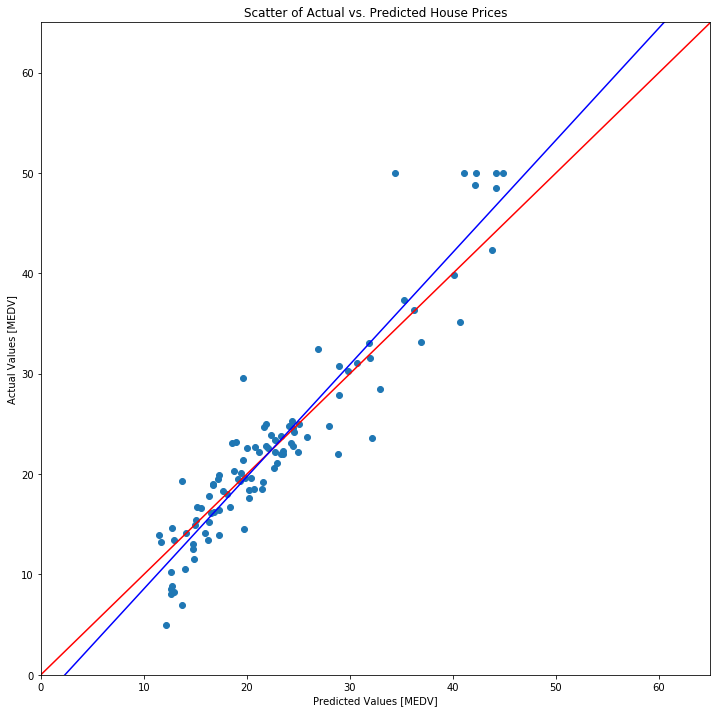

101/101 [==============================] - 0s 3ms/sample - loss: 13.0771 - mean_squared_error: 13.0771 - mean_absolute_error: 2.5812
The r-squared value for this evaluation is:  0.883
The slope of the line in this evaluation is:  1.118
The y-intercept in this evaluation is;  -2.618
Loss:  13.07707697802251
Mean squared error:  13.077077
Mean absolute error:  2.581249


In [78]:
# evalate with a scatter plot
eval_plot(normed_test_data, test_targets,model_13)

Even though we know that LSTAT and RM are well correlated with MEDV, taking this as a subset of the main dataframe has not provided a better model. Note that I have tried several activation functions, optimisers and netwrok shapes but I have found that using the entire dataset has provided better predictions that just using the highly correlated variables. If we are to explore this concept further it might be worth 'whitening' the entire dataset to remove these correlations entirely to see if that provides us with a better predictor.

First we must re-split out the dataset.

In [79]:
# select 80% of the dataset at random
train_dataset = df.sample(frac=0.8,random_state=0)
# create a test dataset by removing the training data from it
test_dataset = df.drop(train_dataset.index)

# pop the median values to new datasets
train_targets = train_dataset.pop('MEDV')
test_targets = test_dataset.pop('MEDV')

# whiten the training input dataset
pca = dec.PCA(n_components=len(train_dataset.columns), whiten=True)
pca.fit(train_dataset)
train_data_white = pd.DataFrame(pca.transform(train_dataset), columns=train_dataset.columns)

# check that the dataset is correctly whitened
train_data_white.corr().round()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0
ZN,-0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
INDUS,0.0,0.0,1.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0
CHAS,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0
NOX,-0.0,-0.0,-0.0,0.0,1.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0
RM,0.0,0.0,-0.0,0.0,0.0,1.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
AGE,0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
DIS,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,0.0
RAD,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,-0.0,0.0,0.0
TAX,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,0.0


The dataset has been correctly whitened and each feature has a full correlation with itself and no correlation with any other feature. The next step is to build a model. I'm going to use model 3 from earlier as it gave good results with the unwhitened dataset.

In [80]:
# build the model
model_3 = build_model(64,'tanh',2,train_data_white)
# compile the model define the loss function and optimiser
model_3.compile(optimizer='adam', loss='mean_squared_error',metrics=['mse', 'mae'])

# define the number of times to run the data through the model
EPOCHS = 1000
# train the model using training data and targets
model_3.fit(train_data_white, train_targets,epochs=EPOCHS)

Epoch 1/1000
405/405 [==============================] - 0s 1ms/sample - loss: 574.6888 - mean_squared_error: 574.6888 - mean_absolute_error: 22.3929
Epoch 2/1000
405/405 [==============================] - 0s 104us/sample - loss: 554.9986 - mean_squared_error: 554.9987 - mean_absolute_error: 22.1106
Epoch 3/1000
405/405 [==============================] - 0s 101us/sample - loss: 531.3916 - mean_squared_error: 531.3916 - mean_absolute_error: 21.7456
Epoch 4/1000
405/405 [==============================] - 0s 104us/sample - loss: 502.4275 - mean_squared_error: 502.4276 - mean_absolute_error: 21.2511
Epoch 5/1000
405/405 [==============================] - 0s 110us/sample - loss: 465.0154 - mean_squared_error: 465.0154 - mean_absolute_error: 20.5228
Epoch 6/1000
405/405 [==============================] - 0s 106us/sample - loss: 422.2992 - mean_squared_error: 422.2992 - mean_absolute_error: 19.5816
Epoch 7/1000
405/405 [==============================] - 0s 109us/sample - loss: 372.8624 - mean_

405/405 [==============================] - 0s 90us/sample - loss: 25.3831 - mean_squared_error: 25.3831 - mean_absolute_error: 3.2754
Epoch 57/1000
405/405 [==============================] - 0s 87us/sample - loss: 24.9574 - mean_squared_error: 24.9574 - mean_absolute_error: 3.2617
Epoch 58/1000
405/405 [==============================] - 0s 90us/sample - loss: 24.2638 - mean_squared_error: 24.2638 - mean_absolute_error: 3.1959
Epoch 59/1000
405/405 [==============================] - 0s 85us/sample - loss: 23.7555 - mean_squared_error: 23.7555 - mean_absolute_error: 3.1598
Epoch 60/1000
405/405 [==============================] - 0s 79us/sample - loss: 23.2404 - mean_squared_error: 23.2404 - mean_absolute_error: 3.1133
Epoch 61/1000
405/405 [==============================] - 0s 78us/sample - loss: 22.7101 - mean_squared_error: 22.7101 - mean_absolute_error: 3.0764
Epoch 62/1000
405/405 [==============================] - 0s 78us/sample - loss: 22.2297 - mean_squared_error: 22.2297 - mean_a

405/405 [==============================] - 0s 134us/sample - loss: 9.6223 - mean_squared_error: 9.6223 - mean_absolute_error: 2.0994
Epoch 111/1000
405/405 [==============================] - 0s 107us/sample - loss: 9.4183 - mean_squared_error: 9.4183 - mean_absolute_error: 2.0688
Epoch 112/1000
405/405 [==============================] - 0s 91us/sample - loss: 9.3670 - mean_squared_error: 9.3670 - mean_absolute_error: 2.0749
Epoch 113/1000
405/405 [==============================] - 0s 103us/sample - loss: 9.1706 - mean_squared_error: 9.1706 - mean_absolute_error: 2.0476
Epoch 114/1000
405/405 [==============================] - 0s 105us/sample - loss: 9.0328 - mean_squared_error: 9.0328 - mean_absolute_error: 2.0442
Epoch 115/1000
405/405 [==============================] - 0s 120us/sample - loss: 8.9039 - mean_squared_error: 8.9039 - mean_absolute_error: 2.0284
Epoch 116/1000
405/405 [==============================] - 0s 109us/sample - loss: 8.8240 - mean_squared_error: 8.8240 - mean_abs

Epoch 165/1000
405/405 [==============================] - 0s 106us/sample - loss: 4.9392 - mean_squared_error: 4.9392 - mean_absolute_error: 1.5532
Epoch 166/1000
405/405 [==============================] - 0s 94us/sample - loss: 4.8657 - mean_squared_error: 4.8657 - mean_absolute_error: 1.5439
Epoch 167/1000
405/405 [==============================] - 0s 89us/sample - loss: 4.8770 - mean_squared_error: 4.8770 - mean_absolute_error: 1.5562
Epoch 168/1000
405/405 [==============================] - 0s 97us/sample - loss: 4.7928 - mean_squared_error: 4.7928 - mean_absolute_error: 1.5415
Epoch 169/1000
405/405 [==============================] - 0s 94us/sample - loss: 4.6256 - mean_squared_error: 4.6256 - mean_absolute_error: 1.5098
Epoch 170/1000
405/405 [==============================] - 0s 88us/sample - loss: 4.5795 - mean_squared_error: 4.5795 - mean_absolute_error: 1.5147
Epoch 171/1000
405/405 [==============================] - 0s 88us/sample - loss: 4.4567 - mean_squared_error: 4.4567 

405/405 [==============================] - 0s 99us/sample - loss: 2.7212 - mean_squared_error: 2.7212 - mean_absolute_error: 1.1727
Epoch 221/1000
405/405 [==============================] - 0s 105us/sample - loss: 2.6570 - mean_squared_error: 2.6570 - mean_absolute_error: 1.1697
Epoch 222/1000
405/405 [==============================] - 0s 101us/sample - loss: 2.6221 - mean_squared_error: 2.6221 - mean_absolute_error: 1.1539
Epoch 223/1000
405/405 [==============================] - 0s 97us/sample - loss: 2.6013 - mean_squared_error: 2.6013 - mean_absolute_error: 1.1560
Epoch 224/1000
405/405 [==============================] - 0s 111us/sample - loss: 2.5860 - mean_squared_error: 2.5860 - mean_absolute_error: 1.1488
Epoch 225/1000
405/405 [==============================] - 0s 115us/sample - loss: 2.6930 - mean_squared_error: 2.6930 - mean_absolute_error: 1.1672
Epoch 226/1000
405/405 [==============================] - 0s 99us/sample - loss: 2.5299 - mean_squared_error: 2.5299 - mean_absol

405/405 [==============================] - 0s 116us/sample - loss: 1.7742 - mean_squared_error: 1.7742 - mean_absolute_error: 0.9637
Epoch 276/1000
405/405 [==============================] - 0s 81us/sample - loss: 1.6920 - mean_squared_error: 1.6920 - mean_absolute_error: 0.9490
Epoch 277/1000
405/405 [==============================] - 0s 84us/sample - loss: 1.7508 - mean_squared_error: 1.7508 - mean_absolute_error: 0.9500
Epoch 278/1000
405/405 [==============================] - 0s 83us/sample - loss: 1.7013 - mean_squared_error: 1.7013 - mean_absolute_error: 0.9384
Epoch 279/1000
405/405 [==============================] - 0s 88us/sample - loss: 1.7246 - mean_squared_error: 1.7246 - mean_absolute_error: 0.9502
Epoch 280/1000
405/405 [==============================] - 0s 83us/sample - loss: 1.6641 - mean_squared_error: 1.6641 - mean_absolute_error: 0.9342
Epoch 281/1000
405/405 [==============================] - 0s 84us/sample - loss: 1.6963 - mean_squared_error: 1.6963 - mean_absolute

405/405 [==============================] - 0s 98us/sample - loss: 1.2275 - mean_squared_error: 1.2275 - mean_absolute_error: 0.8046
Epoch 331/1000
405/405 [==============================] - 0s 109us/sample - loss: 1.1805 - mean_squared_error: 1.1805 - mean_absolute_error: 0.7865
Epoch 332/1000
405/405 [==============================] - 0s 84us/sample - loss: 1.1645 - mean_squared_error: 1.1645 - mean_absolute_error: 0.7861
Epoch 333/1000
405/405 [==============================] - 0s 97us/sample - loss: 1.1527 - mean_squared_error: 1.1527 - mean_absolute_error: 0.7703
Epoch 334/1000
405/405 [==============================] - 0s 83us/sample - loss: 1.1516 - mean_squared_error: 1.1516 - mean_absolute_error: 0.7832
Epoch 335/1000
405/405 [==============================] - 0s 86us/sample - loss: 1.1692 - mean_squared_error: 1.1692 - mean_absolute_error: 0.7738
Epoch 336/1000
405/405 [==============================] - 0s 83us/sample - loss: 1.1351 - mean_squared_error: 1.1351 - mean_absolute

405/405 [==============================] - 0s 88us/sample - loss: 0.8262 - mean_squared_error: 0.8262 - mean_absolute_error: 0.6549
Epoch 386/1000
405/405 [==============================] - 0s 114us/sample - loss: 0.8040 - mean_squared_error: 0.8040 - mean_absolute_error: 0.6511
Epoch 387/1000
405/405 [==============================] - 0s 86us/sample - loss: 0.8264 - mean_squared_error: 0.8264 - mean_absolute_error: 0.6680
Epoch 388/1000
405/405 [==============================] - 0s 101us/sample - loss: 0.8677 - mean_squared_error: 0.8677 - mean_absolute_error: 0.6768
Epoch 389/1000
405/405 [==============================] - 0s 184us/sample - loss: 0.8152 - mean_squared_error: 0.8152 - mean_absolute_error: 0.6555
Epoch 390/1000
405/405 [==============================] - 0s 83us/sample - loss: 0.8086 - mean_squared_error: 0.8086 - mean_absolute_error: 0.6544
Epoch 391/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.7976 - mean_squared_error: 0.7976 - mean_absolu

405/405 [==============================] - 0s 78us/sample - loss: 0.5818 - mean_squared_error: 0.5818 - mean_absolute_error: 0.5465
Epoch 441/1000
405/405 [==============================] - 0s 88us/sample - loss: 0.6071 - mean_squared_error: 0.6071 - mean_absolute_error: 0.5633
Epoch 442/1000
405/405 [==============================] - 0s 99us/sample - loss: 0.6310 - mean_squared_error: 0.6310 - mean_absolute_error: 0.5785
Epoch 443/1000
405/405 [==============================] - 0s 103us/sample - loss: 0.5988 - mean_squared_error: 0.5988 - mean_absolute_error: 0.5641
Epoch 444/1000
405/405 [==============================] - 0s 97us/sample - loss: 0.5846 - mean_squared_error: 0.5846 - mean_absolute_error: 0.5548
Epoch 445/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.5607 - mean_squared_error: 0.5607 - mean_absolute_error: 0.5406
Epoch 446/1000
405/405 [==============================] - 0s 90us/sample - loss: 0.5464 - mean_squared_error: 0.5464 - mean_absolute

405/405 [==============================] - 0s 101us/sample - loss: 0.4270 - mean_squared_error: 0.4270 - mean_absolute_error: 0.4719
Epoch 496/1000
405/405 [==============================] - 0s 108us/sample - loss: 0.4082 - mean_squared_error: 0.4082 - mean_absolute_error: 0.4585
Epoch 497/1000
405/405 [==============================] - 0s 114us/sample - loss: 0.4460 - mean_squared_error: 0.4460 - mean_absolute_error: 0.4826
Epoch 498/1000
405/405 [==============================] - 0s 116us/sample - loss: 0.4189 - mean_squared_error: 0.4189 - mean_absolute_error: 0.4676
Epoch 499/1000
405/405 [==============================] - 0s 111us/sample - loss: 0.4171 - mean_squared_error: 0.4171 - mean_absolute_error: 0.4721
Epoch 500/1000
405/405 [==============================] - 0s 98us/sample - loss: 0.3897 - mean_squared_error: 0.3897 - mean_absolute_error: 0.4523
Epoch 501/1000
405/405 [==============================] - 0s 103us/sample - loss: 0.3906 - mean_squared_error: 0.3906 - mean_abs

405/405 [==============================] - 0s 81us/sample - loss: 0.2694 - mean_squared_error: 0.2694 - mean_absolute_error: 0.3674
Epoch 551/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.2690 - mean_squared_error: 0.2690 - mean_absolute_error: 0.3770
Epoch 552/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.2767 - mean_squared_error: 0.2767 - mean_absolute_error: 0.3715
Epoch 553/1000
405/405 [==============================] - 0s 85us/sample - loss: 0.2771 - mean_squared_error: 0.2771 - mean_absolute_error: 0.3682
Epoch 554/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.2443 - mean_squared_error: 0.2443 - mean_absolute_error: 0.3439
Epoch 555/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.2523 - mean_squared_error: 0.2523 - mean_absolute_error: 0.3574
Epoch 556/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.2693 - mean_squared_error: 0.2693 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 0.1985 - mean_squared_error: 0.1985 - mean_absolute_error: 0.3155
Epoch 606/1000
405/405 [==============================] - 0s 90us/sample - loss: 0.1945 - mean_squared_error: 0.1945 - mean_absolute_error: 0.3000
Epoch 607/1000
405/405 [==============================] - 0s 78us/sample - loss: 0.2049 - mean_squared_error: 0.2049 - mean_absolute_error: 0.3149
Epoch 608/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.1946 - mean_squared_error: 0.1946 - mean_absolute_error: 0.3143
Epoch 609/1000
405/405 [==============================] - 0s 83us/sample - loss: 0.2159 - mean_squared_error: 0.2159 - mean_absolute_error: 0.3299
Epoch 610/1000
405/405 [==============================] - 0s 85us/sample - loss: 0.2035 - mean_squared_error: 0.2035 - mean_absolute_error: 0.3180
Epoch 611/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.1865 - mean_squared_error: 0.1865 - mean_absolute_

405/405 [==============================] - 0s 84us/sample - loss: 0.1363 - mean_squared_error: 0.1363 - mean_absolute_error: 0.2588
Epoch 661/1000
405/405 [==============================] - 0s 88us/sample - loss: 0.1341 - mean_squared_error: 0.1341 - mean_absolute_error: 0.2595
Epoch 662/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.1317 - mean_squared_error: 0.1317 - mean_absolute_error: 0.2535
Epoch 663/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.1133 - mean_squared_error: 0.1133 - mean_absolute_error: 0.2274
Epoch 664/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.1120 - mean_squared_error: 0.1120 - mean_absolute_error: 0.2193
Epoch 665/1000
405/405 [==============================] - 0s 78us/sample - loss: 0.1352 - mean_squared_error: 0.1352 - mean_absolute_error: 0.2575
Epoch 666/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.1275 - mean_squared_error: 0.1275 - mean_absolute_

405/405 [==============================] - 0s 81us/sample - loss: 0.1006 - mean_squared_error: 0.1006 - mean_absolute_error: 0.2226
Epoch 716/1000
405/405 [==============================] - 0s 87us/sample - loss: 0.1122 - mean_squared_error: 0.1122 - mean_absolute_error: 0.2436
Epoch 717/1000
405/405 [==============================] - 0s 78us/sample - loss: 0.1064 - mean_squared_error: 0.1064 - mean_absolute_error: 0.2381
Epoch 718/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.1169 - mean_squared_error: 0.1169 - mean_absolute_error: 0.2525
Epoch 719/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.1037 - mean_squared_error: 0.1037 - mean_absolute_error: 0.2363
Epoch 720/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.1018 - mean_squared_error: 0.1018 - mean_absolute_error: 0.2224
Epoch 721/1000
405/405 [==============================] - 0s 89us/sample - loss: 0.0968 - mean_squared_error: 0.0968 - mean_absolute_

405/405 [==============================] - 0s 79us/sample - loss: 0.0686 - mean_squared_error: 0.0686 - mean_absolute_error: 0.1839
Epoch 771/1000
405/405 [==============================] - 0s 89us/sample - loss: 0.0625 - mean_squared_error: 0.0625 - mean_absolute_error: 0.1761
Epoch 772/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.0662 - mean_squared_error: 0.0662 - mean_absolute_error: 0.1802
Epoch 773/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - mean_absolute_error: 0.1717
Epoch 774/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.0646 - mean_squared_error: 0.0646 - mean_absolute_error: 0.1780
Epoch 775/1000
405/405 [==============================] - 0s 89us/sample - loss: 0.0600 - mean_squared_error: 0.0600 - mean_absolute_error: 0.1706
Epoch 776/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 0.0449 - mean_squared_error: 0.0449 - mean_absolute_error: 0.1508
Epoch 826/1000
405/405 [==============================] - 0s 91us/sample - loss: 0.0531 - mean_squared_error: 0.0531 - mean_absolute_error: 0.1716
Epoch 827/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.0660 - mean_squared_error: 0.0660 - mean_absolute_error: 0.1911
Epoch 828/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.0757 - mean_squared_error: 0.0757 - mean_absolute_error: 0.2001
Epoch 829/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.0807 - mean_squared_error: 0.0807 - mean_absolute_error: 0.2076
Epoch 830/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.0709 - mean_squared_error: 0.0709 - mean_absolute_error: 0.1947
Epoch 831/1000
405/405 [==============================] - 0s 81us/sample - loss: 0.0773 - mean_squared_error: 0.0773 - mean_absolute_

405/405 [==============================] - 0s 84us/sample - loss: 0.0376 - mean_squared_error: 0.0376 - mean_absolute_error: 0.1443
Epoch 881/1000
405/405 [==============================] - 0s 89us/sample - loss: 0.0455 - mean_squared_error: 0.0455 - mean_absolute_error: 0.1616
Epoch 882/1000
405/405 [==============================] - 0s 80us/sample - loss: 0.0521 - mean_squared_error: 0.0521 - mean_absolute_error: 0.1656
Epoch 883/1000
405/405 [==============================] - 0s 88us/sample - loss: 0.0400 - mean_squared_error: 0.0400 - mean_absolute_error: 0.1467
Epoch 884/1000
405/405 [==============================] - 0s 76us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - mean_absolute_error: 0.1292
Epoch 885/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - mean_absolute_error: 0.1186
Epoch 886/1000
405/405 [==============================] - 0s 84us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - mean_absolute_

405/405 [==============================] - 0s 82us/sample - loss: 0.0665 - mean_squared_error: 0.0665 - mean_absolute_error: 0.1953
Epoch 936/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.0530 - mean_squared_error: 0.0530 - mean_absolute_error: 0.1779
Epoch 937/1000
405/405 [==============================] - 0s 77us/sample - loss: 0.0504 - mean_squared_error: 0.0504 - mean_absolute_error: 0.1694
Epoch 938/1000
405/405 [==============================] - 0s 84us/sample - loss: 0.0585 - mean_squared_error: 0.0585 - mean_absolute_error: 0.1841
Epoch 939/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.0564 - mean_squared_error: 0.0564 - mean_absolute_error: 0.1769
Epoch 940/1000
405/405 [==============================] - 0s 79us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - mean_absolute_error: 0.1646
Epoch 941/1000
405/405 [==============================] - 0s 82us/sample - loss: 0.0369 - mean_squared_error: 0.0369 - mean_absolute_

405/405 [==============================] - 0s 93us/sample - loss: 0.0624 - mean_squared_error: 0.0624 - mean_absolute_error: 0.1837
Epoch 991/1000
405/405 [==============================] - 0s 94us/sample - loss: 0.0543 - mean_squared_error: 0.0543 - mean_absolute_error: 0.1730
Epoch 992/1000
405/405 [==============================] - 0s 88us/sample - loss: 0.0471 - mean_squared_error: 0.0471 - mean_absolute_error: 0.1516
Epoch 993/1000
405/405 [==============================] - 0s 91us/sample - loss: 0.0434 - mean_squared_error: 0.0434 - mean_absolute_error: 0.1483
Epoch 994/1000
405/405 [==============================] - 0s 99us/sample - loss: 0.0382 - mean_squared_error: 0.0382 - mean_absolute_error: 0.1470
Epoch 995/1000
405/405 [==============================] - 0s 87us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - mean_absolute_error: 0.1106
Epoch 996/1000
405/405 [==============================] - 0s 90us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - mean_absolute_

Then evaluate as before, noting that we have to apply the PCA transform to the test inputs:

/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/patrickmoore/anaconda3/lib/python3.7/site-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


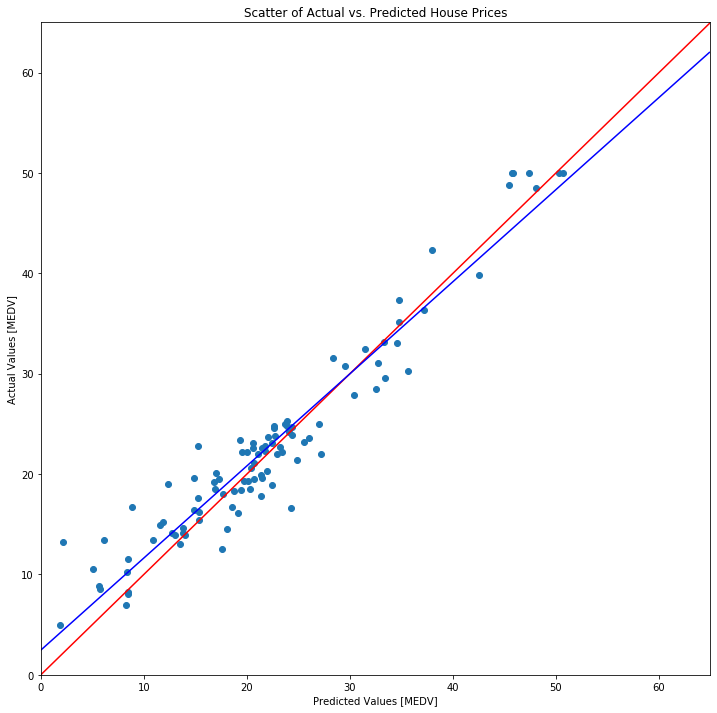

101/101 [==============================] - 0s 3ms/sample - loss: 9.2349 - mean_squared_error: 9.2349 - mean_absolute_error: 2.2916
The r-squared value for this evaluation is:  0.922
The slope of the line in this evaluation is:  0.918
The y-intercept in this evaluation is;  2.461
Loss:  9.234891853710213
Mean squared error:  9.234892
Mean absolute error:  2.291562


In [81]:
# evalate with a scatter plot
eval_plot(pca.transform(test_dataset), test_targets,model_3)

Note that in this case, whitening the dataset has not improved the the predictions of the neural network. The best predictions we got were using the full dataset, normalised but not whitened.

### 4.5 Drawing Conclusions from the Neural Network

The objective of this section of the project was to take the Boston housing dataset and use Keras and Tensorflow to train a neural network to accurately predict house prices based on the other features of the dataset. During the course of the project I carried out the following:
1. Introduced and explained the concept of neurons and neural networks.
1. Researched the subject and found a methodology for building, training, testing and optimising such networks.
1. Built a neural network.
1. Trained it with the normalised housing dataset.
1. Built a function for evaluating the performance of the network.
1. Tried to optimise the network by changing activation functions, optimisers, neural network shape, using a subset of the features and finally whitening the dataset.
1. I found that for this dataset I got the best predictions using the following parameters
    1. 2 Hidden Layers
    1. 64 Neurons per layer
    1. The tanh activation function
    1. The adam optimiser
    1. The full dataset normalised but not whitened
1. I was able to get predictions that average a mean absolute error of about 1,700 dollars. This means that the predictions from the model were out by 1,700 dollars on average, which is not too bad when talking about house prices.

Overall I believe that I have carried out this section of the project in accordance with the project brief.

## 5. Conclusions

### 5.1 Summary of the project

The objectives of the project (adapted from the project brief) were to investigate the research and investigate the Boston Housing dataset and:

* Describe: Create a git repository and make it available online. This repository should contain all of the work for this assessment. Within the repository, create a Jupyter notebook that uses descriptive statistics and plots to describe the Boston House Prices dataset.
* Infer: To the above Jupyter notebook, add a section that uses inferential statistics to analyse whether there is a significant difference in median house prices between houses that are along the Charles river and those that aren’t. The findings should be explained in the notebook.
* Predict: Again using the same notebook, use Keras to create a neural network that can predict the median house price based on the other variables in the dataset.


This Jupyter notebook has served as documentation for the project, and it can be seen that the project objectives have been met. The project started with some internet research into the dataset. I read several blog posts about the dataset as well as the original 1978 paper in which it was originally published.

I then imported the dataset into a Jupyter notebook and began to carryout some exploratory analysis to get a feel for the data in the dataset. I found that there were some interesting points regarding ambient NOX levels and well as the median house prices. I explored some of the relationships a bit further and explained these with descriptive statistics in section 1.

In section 2 I looked at the relationship between proximity to the Charels river and house prices. I researched inferential statistics and introduced the concepts in this report. Finally I carried out a t-test to determine the statistical significance of the difference in means of median house prices and determined that the higher median prices for houses close to the river were statistically significant.

Finally in section 3 I built a neural network to predict median hose prices. I optimised this using a process of trial and error and settled on a model that was to predict within about 1,700 dollars of the actual price on average.

A full list of references was maintained throughout the project and this can be found at the end of this Jupyer notebook file.

### 5.2 Learning outcomes

This project was a learning exercise to help develop programming and data analysis skills for the Machine Learning and Statistics module of a Data Analytics Post Graduate Diploma course. Therefore if would be expected that some skills would be developed in both programming and data science during the course of the project. Some of the programming skills that were developed include:

* Keras: this was my first experience of working with Keras - I found it quite easy to use by consulting the online documentation for the package
* Pandas: I started to use pandas more in this project - using the correlation function to quickly get a correlation matrix that I could plot with a heat map
* LaTex: I improved my use of LaTex while carrying this project by creating some quite complex formulae

Learnings in the field of data science include:

* Using pandas and seaborn to quickly visualise the correlation between features in a dataset
* Developed confidence in carrying out t-tests and interpreting the results
* Building, training, testing and optimisation of neural networks.

Overall I found the project to be an excellent learning exercise and I feel that I met all of the project requirements while learning some new concepts and skills during the course of it.

## References

1. [1] Project Jupyter. Project Jupyter Home. https://www.jupyter.org/
1. [2] University of Toronto. Boston Dataset. https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
1. [3] Python Software Foundation. Welcome to python.org. https://www.python.org/
1. [4] SciPy developers. The scipy python package. https://www.scipy.org/
1. [5] Keras Team. Keras: The python deep learning library. https://keras.io/
1. [6] Hedonic Housing Prices and the Demand for Clean Air. Harrison and Rubinfield. 1978
1. [7] sklearn developers. The sklearn python package. https://scikit-learn.org/stable/.
1. [8] sklearn developers. Dataset loading. https://scikit-learn.org/stable/datasets/index.html
1. [9] Wikipedia. Pearson Correlation Coefficient. https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
1. [10] Wikipedia. Ohm's Law. https://en.wikipedia.org/wiki/Ohm%27s_law
1. [11] www.towardsdatascience.com. Predicting Boston House Prices with Regression. https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d  
1. [12] www.towardsdatascience.com. Linear Regression on Boston Housing Dataset. https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155  
1. [13] Northwestern Unversity. Boston Home Values, across U.S. Census Tracts. https://www.kellogg.northwestern.edu/faculty/weber/emp/_session_3/Boston.htm  
1. [14] SciPy Developers. A simple regression analysis on the Boston housing data. https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html  
1. [15] Statistics How To. What is Inferential Statistics. https://www.statisticshowto.datasciencecentral.com/inferential-statistics/
1. [16] Deborah J. Rumsey. Statistics for Dummies. Chapter 12 - Leaving Room for a Margin of Error. 
1. [17] www.stattrek.com. Hypothesis Test: Difference Between Means. https://stattrek.com/hypothesis-test/difference-in-means.aspx
1. [18] www.real-statistics.com. When t-test assumptions are violated. http://www.real-statistics.com/students-t-distribution/problems-data-t-tests/
1. [19] www.real-statistics.com. Non-parametric tests.http://www.real-statistics.com/non-parametric-tests/
1. [20] www.real-statistics.com. Wilcoxon Rank Sum test.http://www.real-statistics.com/non-parametric-tests/wilcoxon-rank-sum-test/
1. [21] SciPy developers. scipy.stats.ranksums. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html
1. [22] Tensorflow Developers. Basic regression: Predict fuel efficiency. https://www.tensorflow.org/tutorials/keras/regression
1. [23] www.geeksforgeeks.org. Introduction to Machine Learning. https://www.geeksforgeeks.org/introduction-machine-learning/
1. [24] Anmol Behl. An introduction to Machine Learning. https://becominghuman.ai/an-introduction-to-machine-learning-33a1b5d3a560
1. [25] Lisa Tagliaferri. An introduction to Machine Learning. https://www.digitalocean.com/community/tutorials/an-introduction-to-machine-learning
1. [26] David Fumo. A Gentle Introduction to Neural Networks - Part 1.https://towardsdatascience.com/a-gentle-introduction-to-neural-networks-series-part-1-2b90b87795bc
1. [27] Role of Bias in Neural Networks. https://intellipaat.com/community/253/role-of-bias-in-neural-networks
1. [28] Anish Singh Walia. Activation functions and it’s types-Which is better? .https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f
1. [29] www.wikipedia.org. Sigmoid function. https://en.wikipedia.org/wiki/Sigmoid_function
1. [30] Keras. Optimizers - Keras. https://keras.io/optimizers/
1. [31] Wikipedia. Mean Squared Error. https://en.wikipedia.org/wiki/Mean_squared_error
1. [32] Keras. Usage of activations. https://keras.io/activations/

## End